# For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.

In [2631]:
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('seaborn')
import warnings
warnings.filterwarnings("ignore")

## Read the data from the '.csv' file as a monthly Time Series.

In [2632]:
df_spark = pd.read_csv('Sparkling.csv')
df_spark.head(3)

YearMonth  Sparkling
0   1980-01       1686
1   1980-02       1591
2   1980-03       2304

In [2633]:
df_spark.tail(3)

YearMonth  Sparkling
184   1995-05       1670
185   1995-06       1688
186   1995-07       2031

In [2634]:
df_rose = pd.read_csv('Rose.csv')
df_rose.head(3)

YearMonth   Rose
0   1980-01  112.0
1   1980-02  118.0
2   1980-03  129.0

In [2635]:
df_rose.tail(3)

YearMonth  Rose
184   1995-05  28.0
185   1995-06  40.0
186   1995-07  62.0

## Creating the Time Stamps and adding to the data frame to make it a Time Series Data

In [2636]:
date = pd.date_range(start='1/1/1980', end='8/1/1995', freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

## Creating the combined Dataframe 

In [2637]:
df = pd.DataFrame({'YearMonth':date,
                   'Sparkling':df_spark.Sparkling,
                   'Rose':df_rose.Rose})
df.set_index('YearMonth',inplace=True)

In [2638]:
df.tail(3)

Sparkling  Rose
YearMonth                  
1995-05-31       1670  28.0
1995-06-30       1688  40.0
1995-07-31       2031  62.0

## Check the basic measures of descriptive statistics

In [2639]:
df.describe()

Sparkling        Rose
count   187.000000  185.000000
mean   2402.417112   90.394595
std    1295.111540   39.175344
min    1070.000000   28.000000
25%    1605.000000   63.000000
50%    1874.000000   86.000000
75%    2549.000000  112.000000
max    7242.000000  267.000000

## Handle missing values

In [2640]:
df.isnull().sum()

Sparkling    0
Rose         2
dtype: int64

Text(0, 0.5, 'Units Sold')

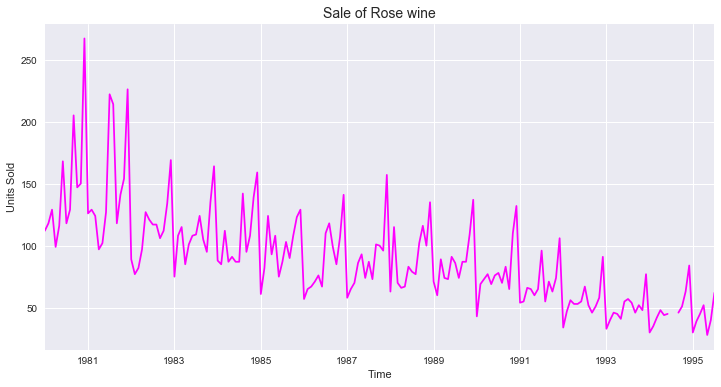

In [2641]:
plt.figure(figsize = (12, 6))
df.Rose.plot(color='magenta')
plt.title('Sale of Rose wine', fontsize=14)
plt.xlabel('Time')
plt.ylabel('Units Sold')

In [2642]:
df['1994']

Sparkling  Rose
YearMonth                  
1994-01-31       1197  30.0
1994-02-28       1968  35.0
1994-03-31       1720  42.0
1994-04-30       1725  48.0
1994-05-31       1674  44.0
1994-06-30       1693  45.0
1994-07-31       2031   NaN
1994-08-31       1495   NaN
1994-09-30       2968  46.0
1994-10-31       3385  51.0
1994-11-30       3729  63.0
1994-12-31       5999  84.0

Since the data has monthly frequency, we can resample at a shorter frequency such as day, Daily to get a better predicton.
Some of the alias for time series frequency to be used in resample():
1. B: Business Day frequency
2. D: Calendar Day frequency
3. M: Month End frequency
4. MS: Month Start frequency
5. Q: Quarter End Frequency
6. QS: Quarter Start Frequency
7. H: Hourly Frequency
8. A: Year End frequency

http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases

In [2643]:
df.converted  = df.Rose
ts = df.converted.resample('D').mean() 
df.Rose = ts.interpolate(method = 'linear')
df.Rose['1994']

YearMonth
1994-01-31    30.000000
1994-02-28    35.000000
1994-03-31    42.000000
1994-04-30    48.000000
1994-05-31    44.000000
1994-06-30    45.000000
1994-07-31    45.336957
1994-08-31    45.673913
1994-09-30    46.000000
1994-10-31    51.000000
1994-11-30    63.000000
1994-12-31    84.000000
Name: Rose, dtype: float64

In [2644]:
df.describe()

Sparkling        Rose
count   187.000000  187.000000
mean   2402.417112   89.914497
std    1295.111540   39.238259
min    1070.000000   28.000000
25%    1605.000000   62.500000
50%    1874.000000   85.000000
75%    2549.000000  111.000000
max    7242.000000  267.000000

## Plot the Time Series to understand the behaviour of the data.

In [2645]:
# The following code is to set the subsequent figure sizes

from pylab import rcParams
rcParams['figure.figsize'] =  14,7

Text(0, 0.5, 'Units Sold')

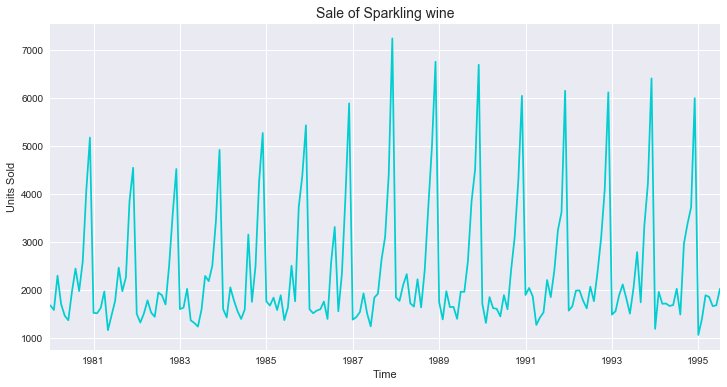

In [2646]:
plt.figure(figsize = (12, 6))
df.Sparkling.plot(color='darkturquoise')
plt.title('Sale of Sparkling wine', fontsize=14)
plt.xlabel('Time')
plt.ylabel('Units Sold')

Text(0, 0.5, 'Distribution')

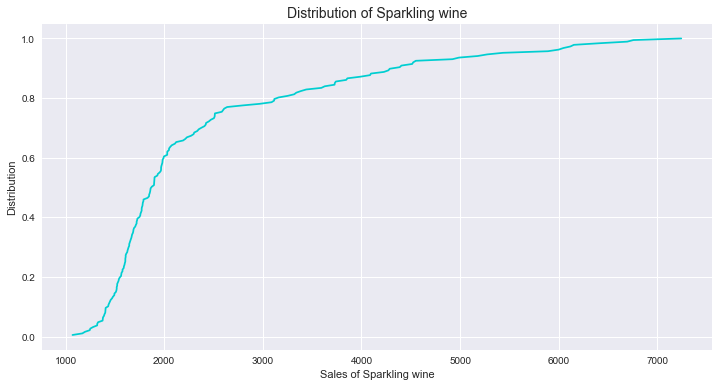

In [2647]:
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (12, 6))
cdf = ECDF(df['Sparkling'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = 'darkturquoise')
plt.title('Distribution of Sparkling wine', fontsize=14)
plt.xlabel('Sales of Sparkling wine')
plt.ylabel('Distribution')

Text(0, 0.5, 'Units Sold')

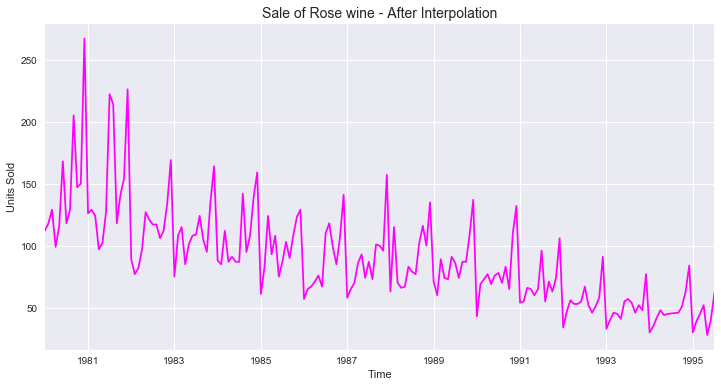

In [2648]:
plt.figure(figsize = (12, 6))
df.Rose.plot(color='magenta')
plt.title('Sale of Rose wine - After Interpolation', fontsize =14)
plt.xlabel('Time')
plt.ylabel('Units Sold')

Text(0, 0.5, 'Distribution')

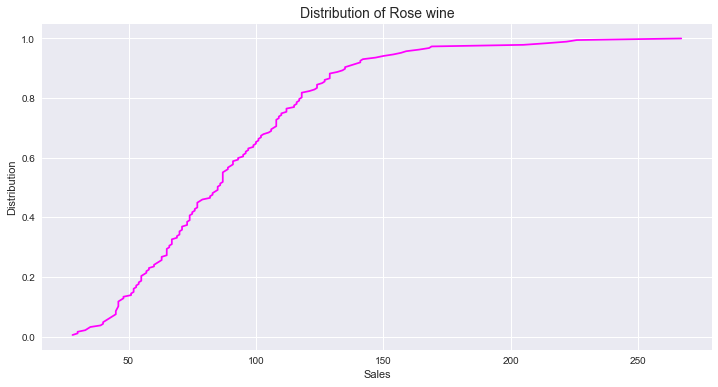

In [2649]:
plt.figure(figsize = (12, 6))
cdf = ECDF(df['Rose'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = 'magenta')
plt.title('Distribution of Rose wine', fontsize=14)
plt.xlabel('Sales')
plt.ylabel('Distribution')

## Plot a boxplot to understand the spread of wine sales across different years and within different months across years.

### Yearly Boxplot - Sparkling

Text(0.5, 1.0, 'Yearly Boxplot - Sparkling')

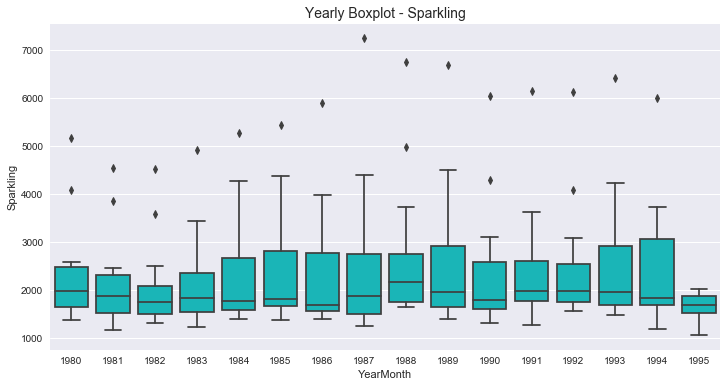

In [2650]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = df.index.year,y = df['Sparkling'], color = 'darkturquoise')
plt.title('Yearly Boxplot - Sparkling', fontsize=14)

### Monthly Plot - Sparkling

Text(0.5, 1.0, 'Monthly Boxplot - Sparkling')

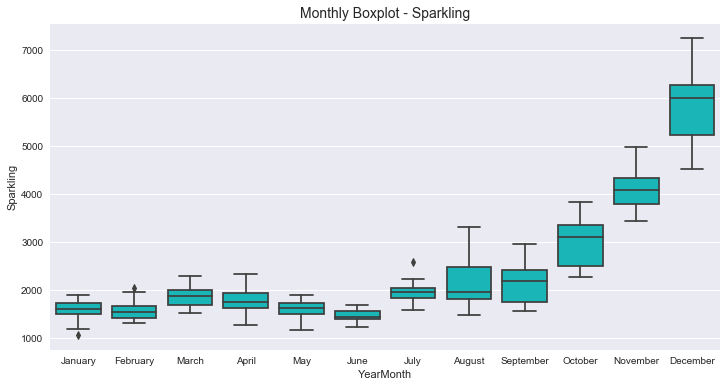

In [2651]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = df.index.month_name(),y = df['Sparkling'], color = 'darkturquoise')
plt.title('Monthly Boxplot - Sparkling', fontsize=14)

### Yearly Boxplot - Rose

Text(0.5, 1.0, 'Yearly Boxplot - Rose')

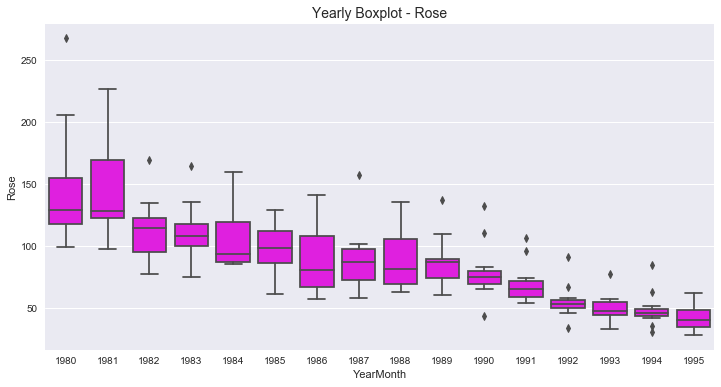

In [2652]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = df.index.year,y = df['Rose'], color='magenta')
plt.title('Yearly Boxplot - Rose', fontsize=14)

### Monthly Plot - Rose

Text(0.5, 1.0, 'Monthly Boxplot - Rose')

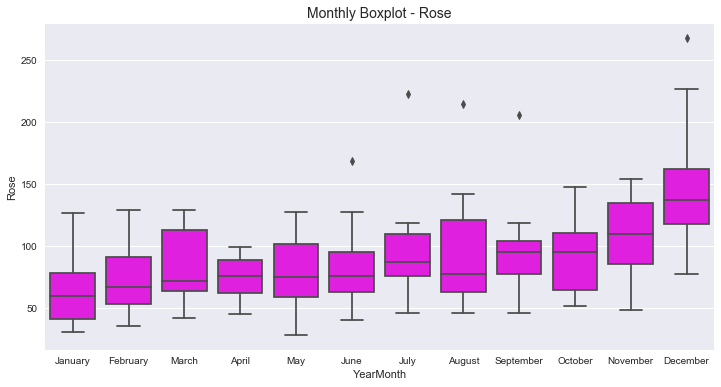

In [2653]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = df.index.month_name(),y = df['Rose'], color='magenta')
plt.title('Monthly Boxplot - Rose', fontsize=14)

## Plot a time series monthplot to understand the spread of sales across different years and within different months across years.

Text(0.5, 1.0, 'Sparkling - Monthly plot')

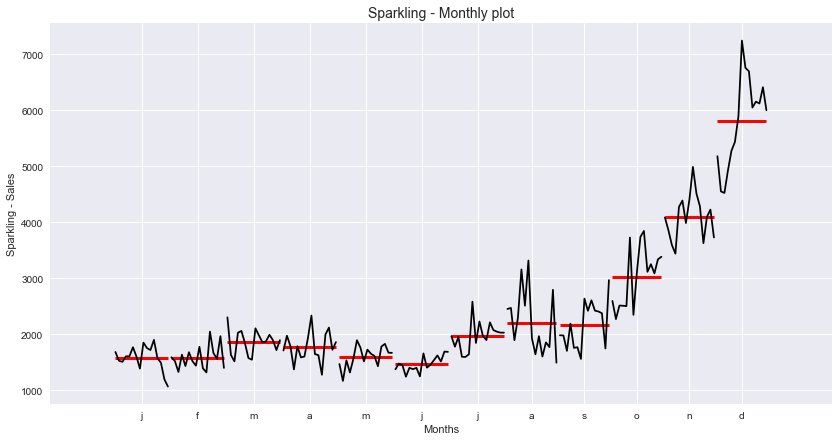

In [2654]:
from statsmodels.graphics.tsaplots import month_plot
month_plot(df['Sparkling'],ylabel='Sparkling - Sales')
plt.xlabel('Months')
plt.title('Sparkling - Monthly plot', fontsize = 14)

Text(0.5, 1.0, 'Rose - Monthly plot')

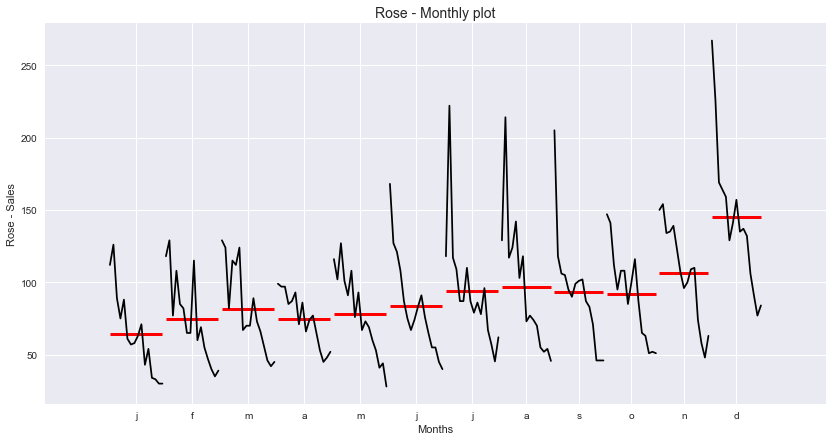

In [2655]:
month_plot(df['Rose'],ylabel='Rose - Sales')
plt.xlabel('Months')
plt.title('Rose - Monthly plot', fontsize=14)

This plot shows us the behaviour of the Time Series  across various months. The red line is the median value.

## Plot a graph of monthly sales across years.

### Sparkling

In [2656]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Sparkling', columns = df.index.month, index = df.index.year)
monthly_sales_across_years

YearMonth      1       2       3       4       5       6       7       8   \
YearMonth                                                                   
1980       1686.0  1591.0  2304.0  1712.0  1471.0  1377.0  1966.0  2453.0   
1981       1530.0  1523.0  1633.0  1976.0  1170.0  1480.0  1781.0  2472.0   
1982       1510.0  1329.0  1518.0  1790.0  1537.0  1449.0  1954.0  1897.0   
1983       1609.0  1638.0  2030.0  1375.0  1320.0  1245.0  1600.0  2298.0   
1984       1609.0  1435.0  2061.0  1789.0  1567.0  1404.0  1597.0  3159.0   
1985       1771.0  1682.0  1846.0  1589.0  1896.0  1379.0  1645.0  2512.0   
1986       1606.0  1523.0  1577.0  1605.0  1765.0  1403.0  2584.0  3318.0   
1987       1389.0  1442.0  1548.0  1935.0  1518.0  1250.0  1847.0  1930.0   
1988       1853.0  1779.0  2108.0  2336.0  1728.0  1661.0  2230.0  1645.0   
1989       1757.0  1394.0  1982.0  1650.0  1654.0  1406.0  1971.0  1968.0   
1990       1720.0  1321.0  1859.0  1628.0  1615.0  1457.0  1899.0  1605.0   
1991       1902.0  2049.0  1874.0  1279.0  1432.0  1540.0  2214.0  1857.0   
1992       1577.0  1667.0  1993.0  1997.0  1783.0  1625.0  2076.0  1773.0   
1993       1494.0  1564.0  1898.0  2121.0  1831.0  1515.0  2048.0  2795.0   
1994       1197.0  1968.0  1720.0  1725.0  1674.0  1693.0  2031.0  1495.0   
1995       1070.0  1402.0  1897.0  1862.0  1670.0  1688.0  2031.0     NaN   

YearMonth      9       10      11      12  
YearMonth                                  
1980       1984.0  2596.0  4087.0  5179.0  
1981       1981.0  2273.0  3857.0  4551.0  
1982       1706.0  2514.0  3593.0  4524.0  
1983       2191.0  2511.0  3440.0  4923.0  
1984       1759.0  2504.0  4273.0  5274.0  
1985       1771.0  3727.0  4388.0  5434.0  
1986       1562.0  2349.0  3987.0  5891.0  
1987       2638.0  3114.0  4405.0  7242.0  
1988       2421.0  3740.0  4988.0  6757.0  
1989       2608.0  3845.0  4514.0  6694.0  
1990       2424.0  3116.0  4286.0  6047.0  
1991       2408.0  3252.0  3627.0  6153.0  
1992       2377.0  3088.0  4096.0  6119.0  
1993       1749.0  3339.0  4227.0  6410.0  
1994       2968.0  3385.0  3729.0  5999.0  
1995          NaN     NaN     NaN     NaN

Text(0.5, 1.0, 'Sparkling - Monthly sales over years')

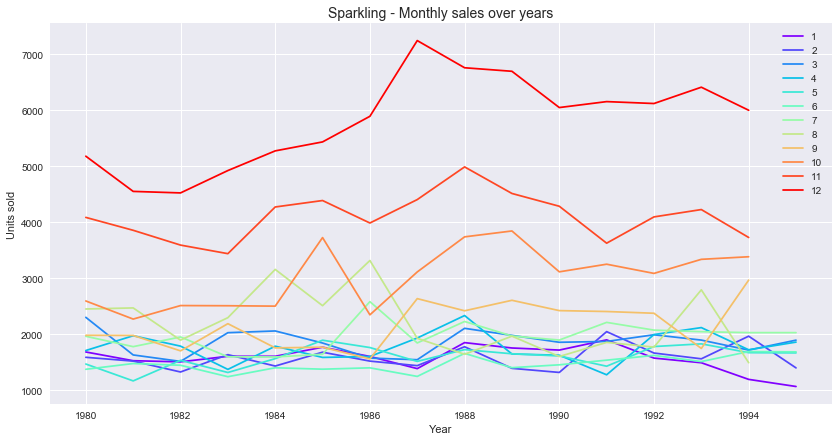

In [2657]:
monthly_sales_across_years.plot(colormap='rainbow')
plt.legend(loc='best')
plt.ylabel('Units sold')
plt.xlabel('Year')
plt.title('Sparkling - Monthly sales over years', fontsize=14)

### Rose

In [2658]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Rose', columns = df.index.month, index = df.index.year)
monthly_sales_across_years

YearMonth     1      2      3     4      5      6           7           8   \
YearMonth                                                                    
1980       112.0  118.0  129.0  99.0  116.0  168.0  118.000000  129.000000   
1981       126.0  129.0  124.0  97.0  102.0  127.0  222.000000  214.000000   
1982        89.0   77.0   82.0  97.0  127.0  121.0  117.000000  117.000000   
1983        75.0  108.0  115.0  85.0  101.0  108.0  109.000000  124.000000   
1984        88.0   85.0  112.0  87.0   91.0   87.0   87.000000  142.000000   
1985        61.0   82.0  124.0  93.0  108.0   75.0   87.000000  103.000000   
1986        57.0   65.0   67.0  71.0   76.0   67.0  110.000000  118.000000   
1987        58.0   65.0   70.0  86.0   93.0   74.0   87.000000   73.000000   
1988        63.0  115.0   70.0  66.0   67.0   83.0   79.000000   77.000000   
1989        71.0   60.0   89.0  74.0   73.0   91.0   86.000000   74.000000   
1990        43.0   69.0   73.0  77.0   69.0   76.0   78.000000   70.000000   
1991        54.0   55.0   66.0  65.0   60.0   65.0   96.000000   55.000000   
1992        34.0   47.0   56.0  53.0   53.0   55.0   67.000000   52.000000   
1993        33.0   40.0   46.0  45.0   41.0   55.0   57.000000   54.000000   
1994        30.0   35.0   42.0  48.0   44.0   45.0   45.336957   45.673913   
1995        30.0   39.0   45.0  52.0   28.0   40.0   62.000000         NaN   

YearMonth     9      10     11     12  
YearMonth                              
1980       205.0  147.0  150.0  267.0  
1981       118.0  141.0  154.0  226.0  
1982       106.0  112.0  134.0  169.0  
1983       105.0   95.0  135.0  164.0  
1984        95.0  108.0  139.0  159.0  
1985        90.0  108.0  123.0  129.0  
1986        99.0   85.0  107.0  141.0  
1987       101.0  100.0   96.0  157.0  
1988       102.0  116.0  100.0  135.0  
1989        87.0   87.0  109.0  137.0  
1990        83.0   65.0  110.0  132.0  
1991        71.0   63.0   74.0  106.0  
1992        46.0   51.0   58.0   91.0  
1993        46.0   52.0   48.0   77.0  
1994        46.0   51.0   63.0   84.0  
1995         NaN    NaN    NaN    NaN

Text(0.5, 1.0, 'Rose - Monthly sales over years')

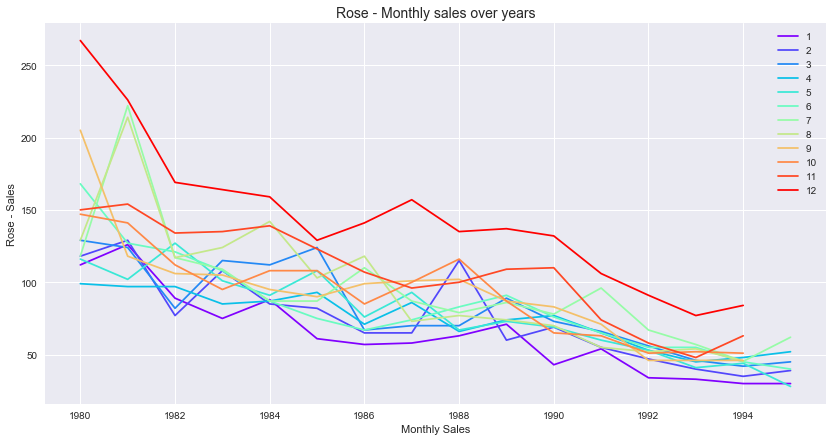

In [2659]:
monthly_sales_across_years.plot(colormap='rainbow')
plt.legend(loc='best')
plt.ylabel('Rose - Sales')
plt.xlabel('Monthly Sales')
plt.title('Rose - Monthly sales over years', fontsize=14)

## Plot the average sales per month and the month on month percentage change of sales.

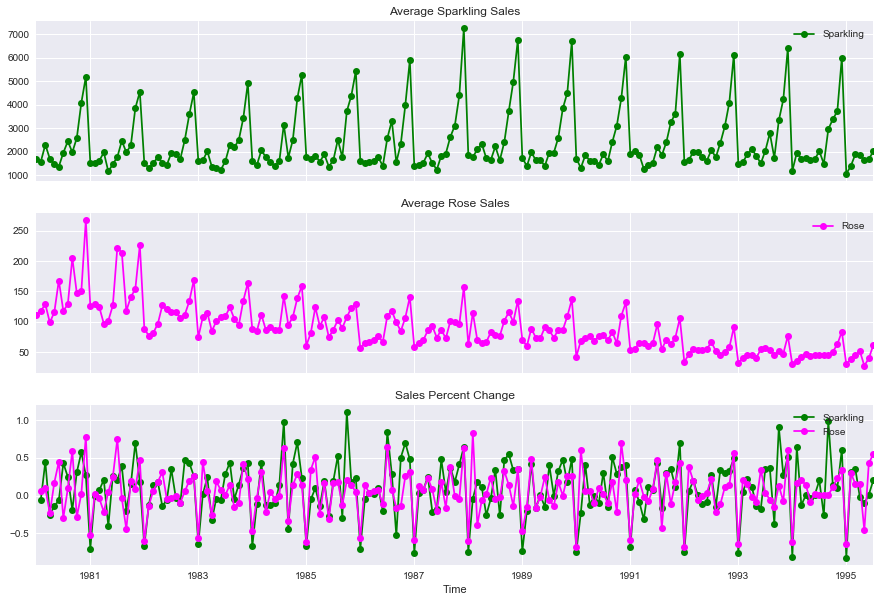

In [2660]:
# group by date and get average Sparkling & Rose sales, and precent change
average_s    = df.groupby(df.index)['Sparkling'].mean()
average_r    = df.groupby(df.index)['Rose'].mean()
pct_change_s = df.groupby(df.index)['Sparkling'].sum().pct_change()
pct_change_r = df.groupby(df.index)['Rose'].sum().pct_change()

fig, (axis1,axis2,axis3) = plt.subplots(3,1,sharex=True,figsize=(15,10))

# plot average Sparkling sales over time(year-month)
ax1 = average_s.plot(legend=True,ax=axis1,marker='o',title="Average Sparkling Sales", color = 'green')
#ax1.set_xticks(range(len(average)))
#ax1.set_xticklabels(average.index.tolist())
# plot average Rose sales over time(year-month)
ax2 = average_r.plot(legend=True,ax=axis2,marker='o',title="Average Rose Sales", color = 'magenta')
#ax2.set_xticks(range(len(average)))
#ax2.set_xticklabels(average.index.tolist())
# plot precent change for Sales over time(year-month)
ax3 = pct_change_s.plot(legend=True,ax=axis3,marker='o',color='green',title="Sales Percent Change")
ax3 = pct_change_r.plot(legend=True,ax=axis3,marker='o',color='magenta',title="Sales Percent Change")
plt.xlabel('Time')
plt.legend(loc='best');

## Decompose the Time Series and plot the different components.

 If the seasonality and residual components are independent of the trend, then you have an additive series. If the seasonality and residual components are in fact dependent, meaning they fluctuate on trend, then you have a multiplicative series.

In [2661]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

## Sparkling

### Additive Decomposition

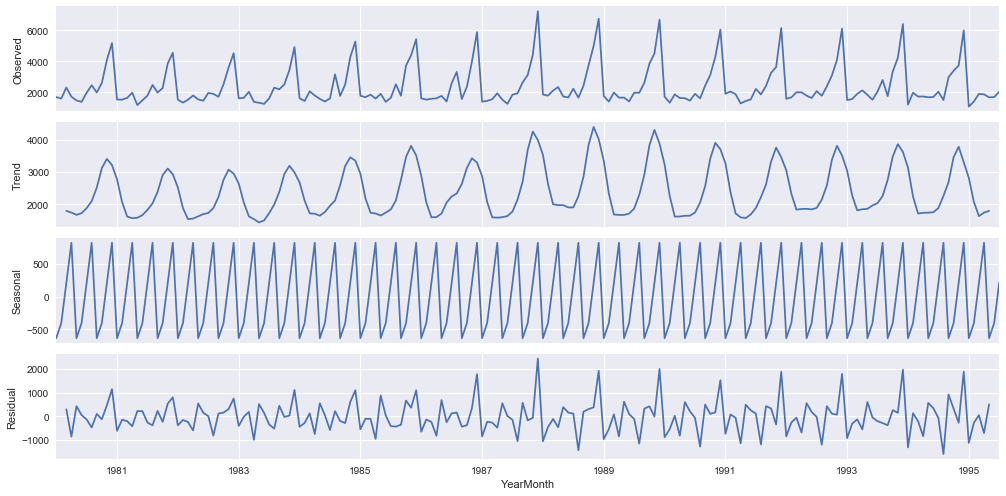

In [2662]:
decomposition = seasonal_decompose(df['Sparkling'],model='additive', freq=4)
decomposition.plot();

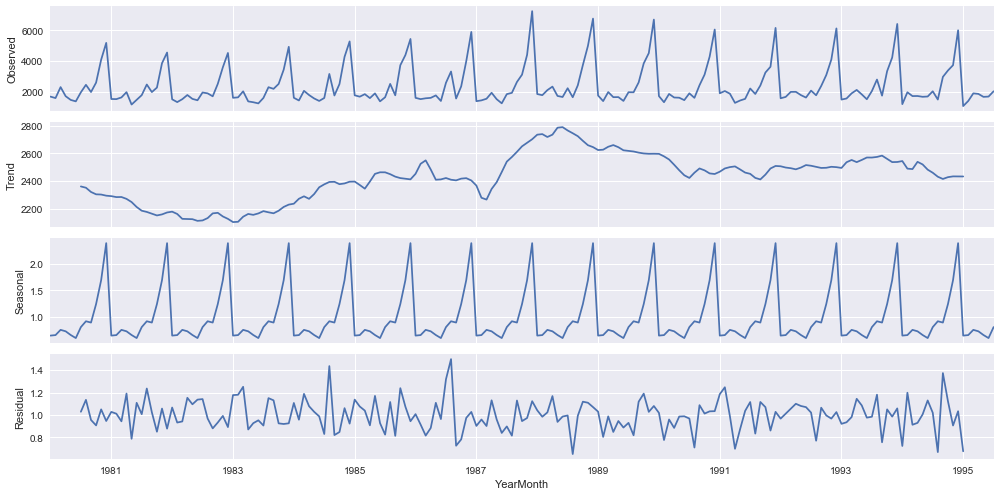

In [2663]:
decomposition = seasonal_decompose(df['Sparkling'],model='multiplicative')
decomposition.plot();


In [2664]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: Sparkling, dtype: float64 

Seasonality 
 YearMonth
1980-01-31    0.649843
1980-02-29    0.659214
1980-03-31    0.757440
1980-04-30    0.730351
1980-05-31    0.660609
1980-06-30    0.603468
1980-07-31    0.809164
1980-08-31    0.918822
1980-09-30    0.894367
1980-10-31    1.241789
1980-11-30    1.690158
1980-12-31    2.384776
Name: Sparkling, dtype: float64 

Residual 
 YearMonth
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    1.029230
1980-08-31    1.135407
1980-09-30    0.955954
1980-10-31    0.907513
1980-11-30    1.050423
1980-12-31    0.946770
Name:

In [2665]:
detrend_ts = seasonality + residual
#deaseasonalized_ts.head(12)

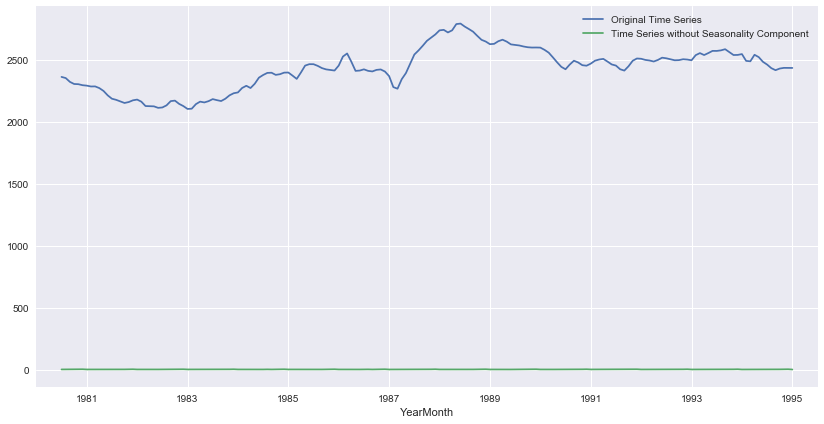

In [2666]:
#df.Sparkling.plot()
trend.plot()
detrend_ts.plot()
plt.legend(["Original Time Series", "Time Series without Seasonality Component"]);

### Multiplicative

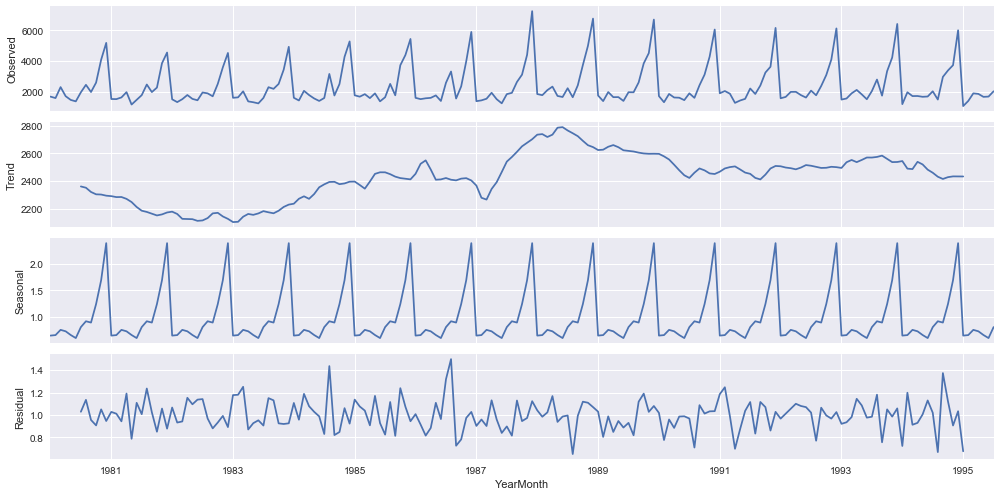

In [2667]:
decomposition = seasonal_decompose(df['Sparkling'],model='multiplicative')
decomposition.plot();

For the multiplicative series, we see that a lot of residuals are located around 1.

In [2668]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: Sparkling, dtype: float64 

Seasonality 
 YearMonth
1980-01-31    0.649843
1980-02-29    0.659214
1980-03-31    0.757440
1980-04-30    0.730351
1980-05-31    0.660609
1980-06-30    0.603468
1980-07-31    0.809164
1980-08-31    0.918822
1980-09-30    0.894367
1980-10-31    1.241789
1980-11-30    1.690158
1980-12-31    2.384776
Name: Sparkling, dtype: float64 

Residual 
 YearMonth
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    1.029230
1980-08-31    1.135407
1980-09-30    0.955954
1980-10-31    0.907513
1980-11-30    1.050423
1980-12-31    0.946770
Name:

## Rose

### Additive Decomposition

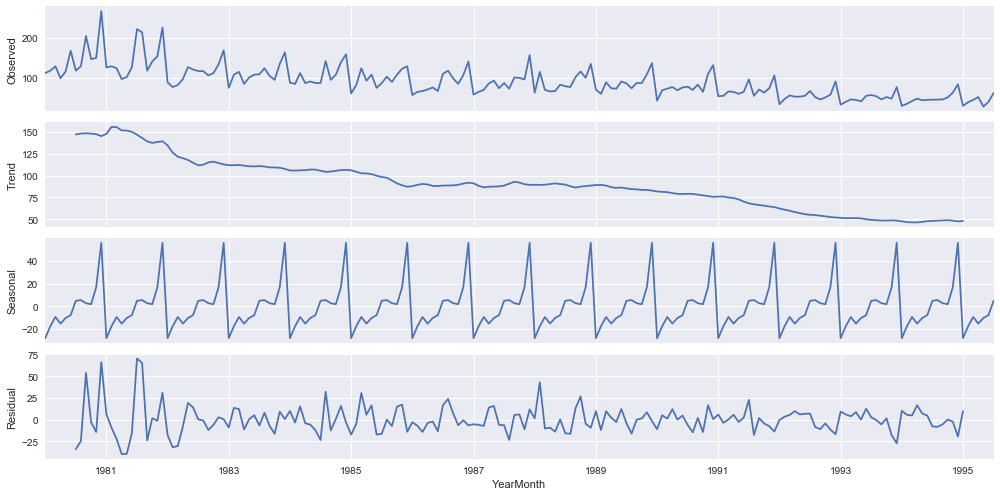

In [2669]:
decomposition = seasonal_decompose(df['Rose'],model='additive')
decomposition.plot();

In [2670]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n');

Trend 
 YearMonth
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Name: Rose, dtype: float64 

Seasonality 
 YearMonth
1980-01-31   -27.908708
1980-02-29   -17.435675
1980-03-31    -9.285895
1980-04-30   -15.098395
1980-05-31   -10.196609
1980-06-30    -7.678752
1980-07-31     4.897089
1980-08-31     5.500109
1980-09-30     2.774625
1980-10-31     1.871848
1980-11-30    16.846848
1980-12-31    55.713514
Name: Rose, dtype: float64 

Residual 
 YearMonth
1980-01-31          NaN
1980-02-29          NaN
1980-03-31          NaN
1980-04-30          NaN
1980-05-31          NaN
1980-06-30          NaN
1980-07-31   -33.980423
1980-08-31   -24.625109
1980-09-30    53.850375
1980-10-31    -2.955181
1980-11-30   -14.263514
1980-12-31    66.161486
Nam

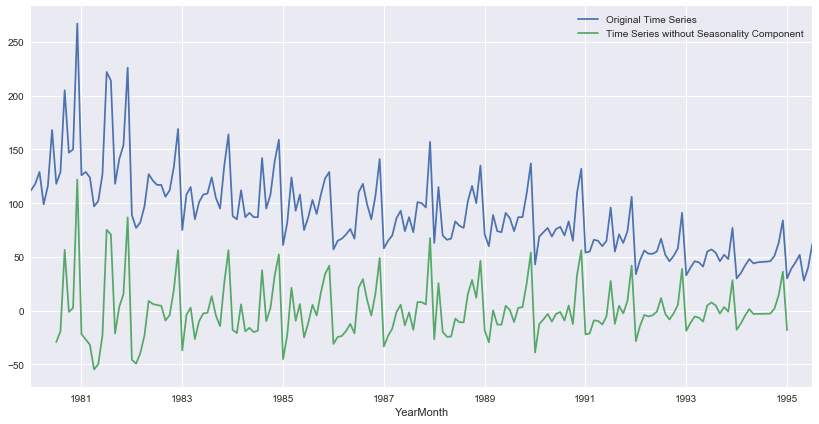

In [2671]:
detrend_ts = seasonality + residual
df.Rose.plot()
detrend_ts.plot()
plt.legend(["Original Time Series", "Time Series without Seasonality Component"]);

### Multiplicative Decomposition

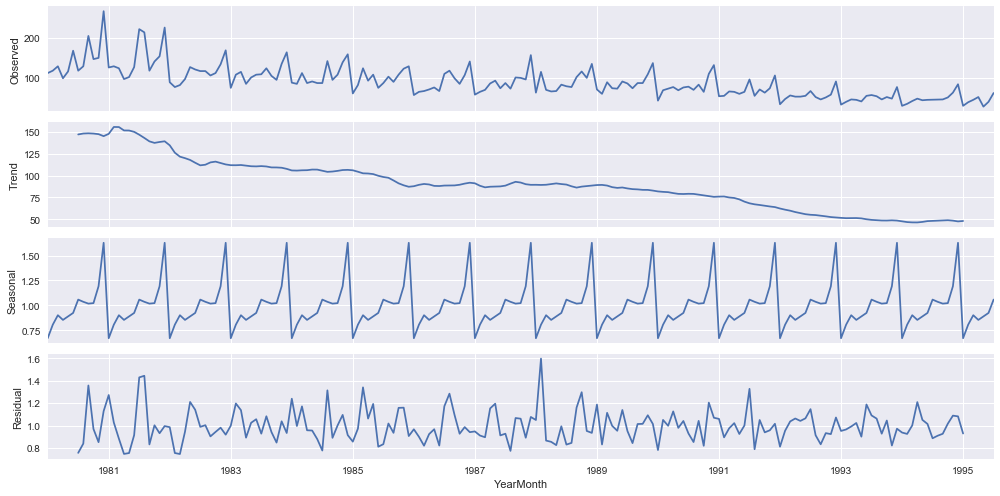

In [2672]:
decomposition = seasonal_decompose(df['Rose'],model='multiplicative')
decomposition.plot();

In [2673]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n');

Trend 
 YearMonth
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Name: Rose, dtype: float64 

Seasonality 
 YearMonth
1980-01-31    0.670111
1980-02-29    0.806163
1980-03-31    0.901163
1980-04-30    0.854023
1980-05-31    0.889414
1980-06-30    0.923984
1980-07-31    1.058042
1980-08-31    1.035890
1980-09-30    1.017647
1980-10-31    1.022572
1980-11-30    1.192347
1980-12-31    1.628644
Name: Rose, dtype: float64 

Residual 
 YearMonth
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    0.758256
1980-08-31    0.840713
1980-09-30    1.357675
1980-10-31    0.970772
1980-11-30    0.853379
1980-12-31    1.129647
Name: Rose, dtype: float64 

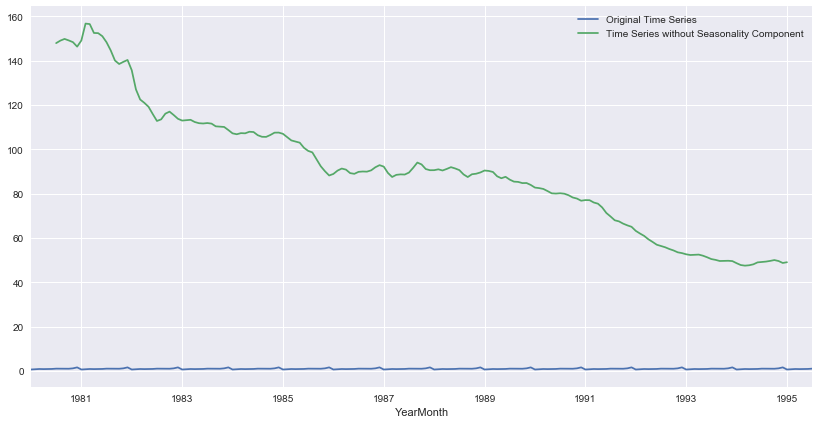

In [2674]:
detrend_ts = trend + residual
#df.Rose.plot()
seasonality.plot()
detrend_ts.plot()
plt.legend(["Original Time Series", "Time Series without Seasonality Component"]);

# Split the time series

In [2675]:
train=df[df.index.year < 1991]
test=df[df.index.year >= 1991]

In [2676]:
from IPython.display import display

In [2677]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


Sparkling   Rose
YearMonth                   
1980-01-31       1686  112.0
1980-02-29       1591  118.0
1980-03-31       2304  129.0
1980-04-30       1712   99.0
1980-05-31       1471  116.0

Last few rows of Training Data


Sparkling   Rose
YearMonth                   
1990-08-31       1605   70.0
1990-09-30       2424   83.0
1990-10-31       3116   65.0
1990-11-30       4286  110.0
1990-12-31       6047  132.0

First few rows of Test Data


Sparkling  Rose
YearMonth                  
1991-01-31       1902  54.0
1991-02-28       2049  55.0
1991-03-31       1874  66.0
1991-04-30       1279  65.0
1991-05-31       1432  60.0

Last few rows of Test Data


Sparkling  Rose
YearMonth                  
1995-03-31       1897  45.0
1995-04-30       1862  52.0
1995-05-31       1670  28.0
1995-06-30       1688  40.0
1995-07-31       2031  62.0

In [2678]:
print(train.shape)
print(test.shape)

(132, 2)
(55, 2)


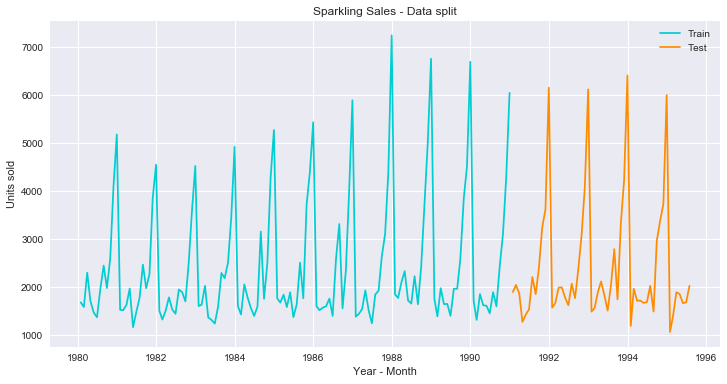

In [2679]:
plt.figure(figsize = (12, 6))
plt.plot(train['Sparkling'], label = 'Train', color='darkturquoise')
plt.plot(test['Sparkling'], label = 'Test', color='darkorange')
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Sparkling Sales - Data split', fontsize = 12)
plt.show;

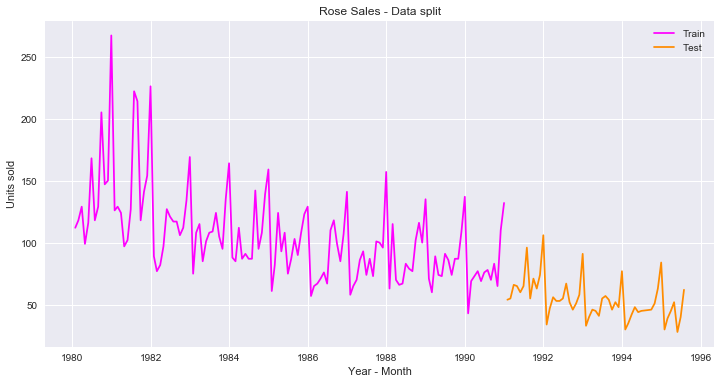

In [2680]:
plt.figure(figsize = (12, 6))
plt.plot(train['Rose'], label = 'Train', color='magenta')
plt.plot(test['Rose'], label = 'Test', color='darkorange')
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Rose Sales - Data split', fontsize = 12)
plt.show;

# Model 1: Linear Regression

In [2681]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [2682]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [2683]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sparkling   Rose  time
YearMonth                         
1980-01-31       1686  112.0     1
1980-02-29       1591  118.0     2
1980-03-31       2304  129.0     3
1980-04-30       1712   99.0     4
1980-05-31       1471  116.0     5 

Last few rows of Training Data 
             Sparkling   Rose  time
YearMonth                         
1990-08-31       1605   70.0   128
1990-09-30       2424   83.0   129
1990-10-31       3116   65.0   130
1990-11-30       4286  110.0   131
1990-12-31       6047  132.0   132 

First few rows of Test Data 
             Sparkling  Rose  time
YearMonth                        
1991-01-31       1902  54.0   133
1991-02-28       2049  55.0   134
1991-03-31       1874  66.0   135
1991-04-30       1279  65.0   136
1991-05-31       1432  60.0   137 

Last few rows of Test Data 
             Sparkling  Rose  time
YearMonth                        
1995-03-31       1897  45.0   183
1995-04-30       1862  52.0   184
1995

In [2684]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'].values)

LinearRegression()

### Sparkling

In [2685]:
LinearRegression_train['RegOnTime_spark'] = lr.predict(LinearRegression_train[['time']])
LinearRegression_test['RegOnTime_spark'] = lr.predict(LinearRegression_test[['time']])

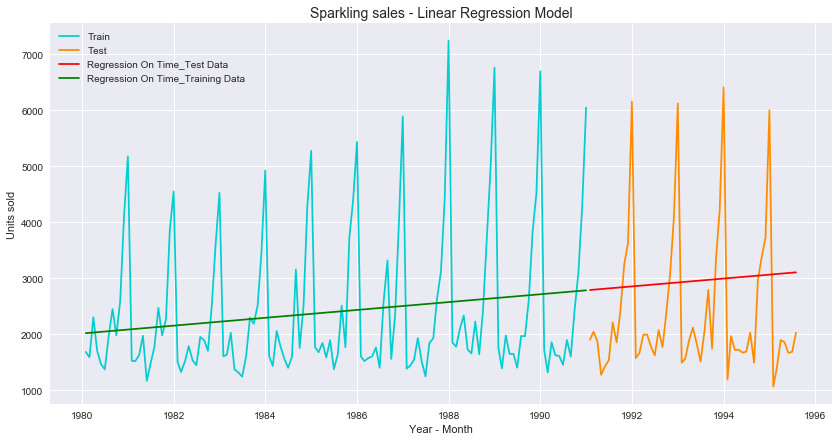

In [2686]:

plt.plot( train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(test['Sparkling'], label='Test', color = 'darkorange')
plt.plot(LinearRegression_test['RegOnTime_spark'], label='Regression On Time_Test Data', color = 'red')
plt.plot(LinearRegression_train['RegOnTime_spark'], label='Regression On Time_Training Data', color = 'green')
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Sparkling sales - Linear Regression Model', fontsize = 14);

### Rose

In [2687]:
lr2 = LinearRegression().fit(LinearRegression_train[['time']],LinearRegression_train['Rose'].values)

In [2688]:
LinearRegression_train['RegOnTime_rose']        = lr2.predict(LinearRegression_train[['time']])
LinearRegression_test['RegOnTime_rose']         = lr2.predict(LinearRegression_test[['time']])

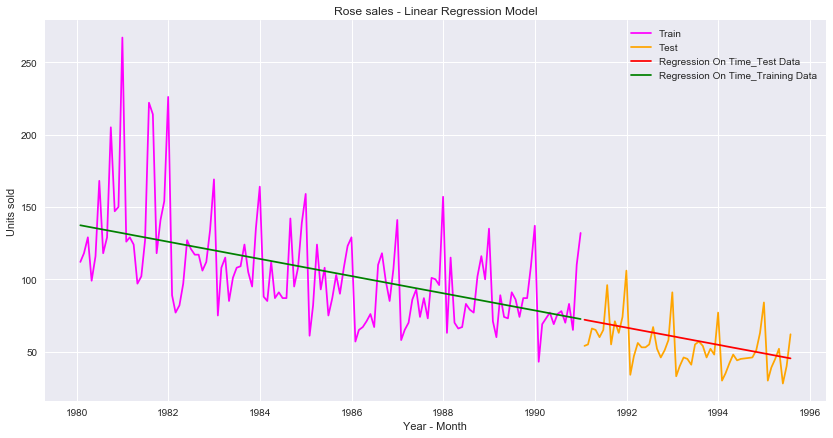

In [2689]:
#plt.figure(figsize=(13,6))
plt.plot( train['Rose'], label='Train', color = 'magenta')
plt.plot(test['Rose'], label='Test', color = 'orange')
plt.plot(LinearRegression_test['RegOnTime_rose'], label='Regression On Time_Test Data', color = 'red')
plt.plot(LinearRegression_train['RegOnTime_rose'], label='Regression On Time_Training Data', color = 'green')
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Rose sales - Linear Regression Model');

### Model Evaluation

In [2690]:
from sklearn import metrics
def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

In [2691]:
## Sparkling Training Data - RMSE and MAPE

rmse_spark_model1_train = metrics.mean_squared_error(train['Sparkling'],LinearRegression_train['RegOnTime_spark'],squared=False)
mape_spark_model1_train = MAPE(train['Sparkling'],LinearRegression_train['RegOnTime_spark'])
print("For RegressionOnTime forecast on the Sparkling Training Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model1_train, mape_spark_model1_train))

For RegressionOnTime forecast on the Sparkling Training Data:  RMSE is 1279.322 and MAPE is 40.05


In [2692]:
## Sparkling Testing Data - RMSE and MAPE

rmse_spark_model1_test = metrics.mean_squared_error(test['Sparkling'],LinearRegression_test['RegOnTime_spark'],squared=False)
mape_spark_model1_test = MAPE(test['Sparkling'],LinearRegression_test['RegOnTime_spark'])
print("For RegressionOnTime forecast on the Sparkling Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model1_test, mape_spark_model1_test))

For RegressionOnTime forecast on the Sparkling Testing Data:  RMSE is 1389.135 and MAPE is 50.15


In [2693]:
## Rose Training Data - RMSE and MAPE

rmse_rose_model1_train = metrics.mean_squared_error(train['Rose'],LinearRegression_train['RegOnTime_rose'],squared=False)
mape_rose_model1_train = MAPE(train['Rose'],LinearRegression_train['RegOnTime_rose'])
print("For RegressionOnTime forecast on the Rose Training Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model1_train, mape_rose_model1_train))

For RegressionOnTime forecast on the Rose Training Data:  RMSE is 30.718 and MAPE is 21.22


In [2694]:
## Rose testing Data - RMSE and MAPE

rmse_rose_model1_test = metrics.mean_squared_error(test['Rose'],LinearRegression_test['RegOnTime_rose'],squared=False)
mape_rose_model1_test = MAPE(test['Rose'],LinearRegression_test['RegOnTime_rose'])
print("For RegressionOnTime forecast on the Rose testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model1_test, mape_rose_model1_test))

For RegressionOnTime forecast on the Rose testing Data:  RMSE is 15.269 and MAPE is 22.82


In [2695]:
spark_resultsDf = pd.DataFrame({'Test RMSE': [rmse_spark_model1_test],'Test MAPE': [mape_spark_model1_test]},index=['RegressionOnTime'])
spark_resultsDf

Test RMSE  Test MAPE
RegressionOnTime  1389.135175      50.15

In [2696]:
rose_resultsDf = pd.DataFrame({'Test RMSE': [rmse_rose_model1_test],'Test MAPE': [mape_rose_model1_test]},index=['RegressionOnTime'])
rose_resultsDf

Test RMSE  Test MAPE
RegressionOnTime  15.268885      22.82

# Model 2: Naive forecast

In [2697]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

### Sparkling

In [2698]:
NaiveModel_train['spark_naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_train['spark_naive'].head()

YearMonth
1980-01-31    6047
1980-02-29    6047
1980-03-31    6047
1980-04-30    6047
1980-05-31    6047
Name: spark_naive, dtype: int64

In [2699]:
NaiveModel_test['spark_naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['spark_naive'].head()

YearMonth
1991-01-31    6047
1991-02-28    6047
1991-03-31    6047
1991-04-30    6047
1991-05-31    6047
Name: spark_naive, dtype: int64

Text(0.5, 1.0, 'Sparkling - Naive Forecast')

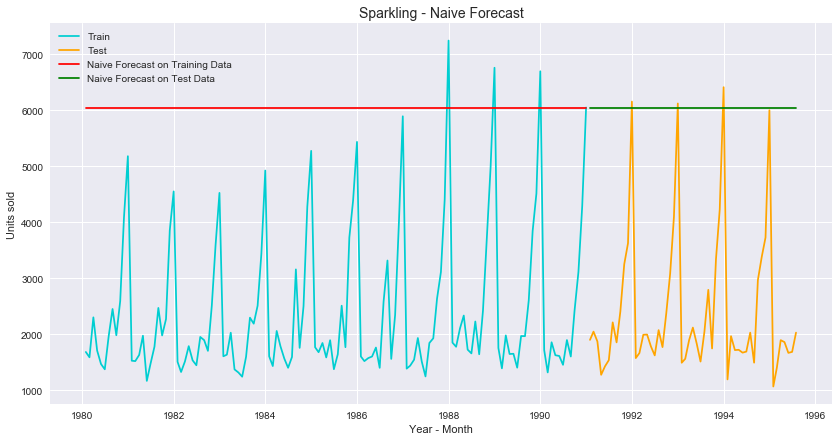

In [2700]:
#plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(test['Sparkling'], label='Test', color = 'orange')
plt.plot(NaiveModel_train['spark_naive'], label='Naive Forecast on Training Data', color = 'red')
plt.plot(NaiveModel_test['spark_naive'], label='Naive Forecast on Test Data', color = 'green')
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title("Sparkling - Naive Forecast", fontsize = 14)

### Rose

In [2701]:
NaiveModel_train['rose_naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_train['rose_naive'].head()

YearMonth
1980-01-31    132.0
1980-02-29    132.0
1980-03-31    132.0
1980-04-30    132.0
1980-05-31    132.0
Name: rose_naive, dtype: float64

In [2702]:
NaiveModel_test['rose_naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_test['rose_naive'].head()

YearMonth
1991-01-31    132.0
1991-02-28    132.0
1991-03-31    132.0
1991-04-30    132.0
1991-05-31    132.0
Name: rose_naive, dtype: float64

Text(0.5, 1.0, 'Rose - Naive Forecast')

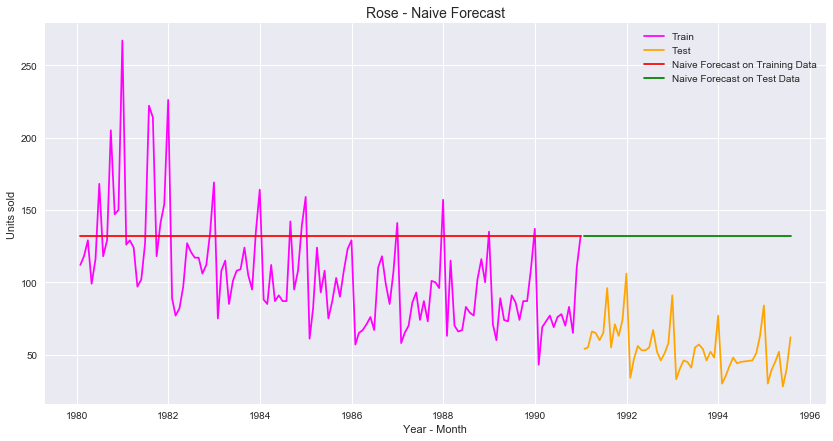

In [2703]:
plt.plot(NaiveModel_train['Rose'], label='Train', color = 'magenta')
plt.plot(test['Rose'], label='Test', color = 'orange')
plt.plot(NaiveModel_train['rose_naive'], label='Naive Forecast on Training Data', color = 'red')
plt.plot(NaiveModel_test['rose_naive'], label='Naive Forecast on Test Data', color = 'green')
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title("Rose - Naive Forecast", fontsize = 14)

### Model Evauation

In [2704]:
## Sparkling Training Data - RMSE and MAPE

rmse_spark_model2_train = metrics.mean_squared_error(train['Sparkling'],NaiveModel_train['spark_naive'],squared=False)
mape_spark_model2_train = MAPE(train['Sparkling'],NaiveModel_train['spark_naive'])
print("For Naive forecast on the Sparkling Training Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model2_train, mape_spark_model2_train))

For Naive forecast on the Sparkling Training Data:  RMSE is 3867.701 and MAPE is 153.17


In [2705]:
## Sparkling Testing Data - RMSE and MAPE

rmse_spark_model2_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['spark_naive'],squared=False)
mape_spark_model2_test = MAPE(test['Sparkling'],NaiveModel_test['spark_naive'])
print("For Naive forecast on the Sparkling Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model2_test, mape_spark_model2_test))

For Naive forecast on the Sparkling Testing Data:  RMSE is 3864.279 and MAPE is 152.87


In [2706]:
## Rose Training Data - RMSE and MAPE

rmse_rose_model2_train = metrics.mean_squared_error(train['Rose'],NaiveModel_train['rose_naive'],squared=False)
mape_rose_model2_train = MAPE(train['Rose'],NaiveModel_train['rose_naive'])
print("For Naive forecast on the Rose Training Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model2_train, mape_rose_model2_train))

For Naive forecast on the Rose Training Data:  RMSE is 45.064 and MAPE is 36.38


In [2707]:
## Rose Testing Data - RMSE and MAPE

rmse_rose_model2_test = metrics.mean_squared_error(test['Rose'],NaiveModel_test['rose_naive'],squared=False)
mape_rose_model2_test = MAPE(test['Rose'],NaiveModel_test['rose_naive'])
print("For Naive forecast on the Rose Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model2_test, mape_rose_model2_test))

For Naive forecast on the Rose Testing Data:  RMSE is 79.719 and MAPE is 145.10


In [2708]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_spark_model2_test],'Test MAPE': [mape_spark_model2_test]},index=['NaiveModel'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_2])
spark_resultsDf

Test RMSE  Test MAPE
RegressionOnTime  1389.135175      50.15
NaiveModel        3864.279352     152.87

In [2709]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_rose_model2_test],'Test MAPE': [mape_rose_model2_test]},index=['NaiveModel'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_2])
rose_resultsDf

Test RMSE  Test MAPE
RegressionOnTime  15.268885      22.82
NaiveModel        79.718559     145.10

## Model 3: Simple Average

In [2710]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

### Sparkling

In [2711]:
SimpleAverage_train['spark_mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_train['spark_mean_forecast'].head()

YearMonth
1980-01-31    2403.780303
1980-02-29    2403.780303
1980-03-31    2403.780303
1980-04-30    2403.780303
1980-05-31    2403.780303
Name: spark_mean_forecast, dtype: float64

In [2712]:
SimpleAverage_test['spark_mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test['spark_mean_forecast'].head()

YearMonth
1991-01-31    2403.780303
1991-02-28    2403.780303
1991-03-31    2403.780303
1991-04-30    2403.780303
1991-05-31    2403.780303
Name: spark_mean_forecast, dtype: float64

Text(0.5, 1.0, 'Sparkling - SimpleAverage Forecast')

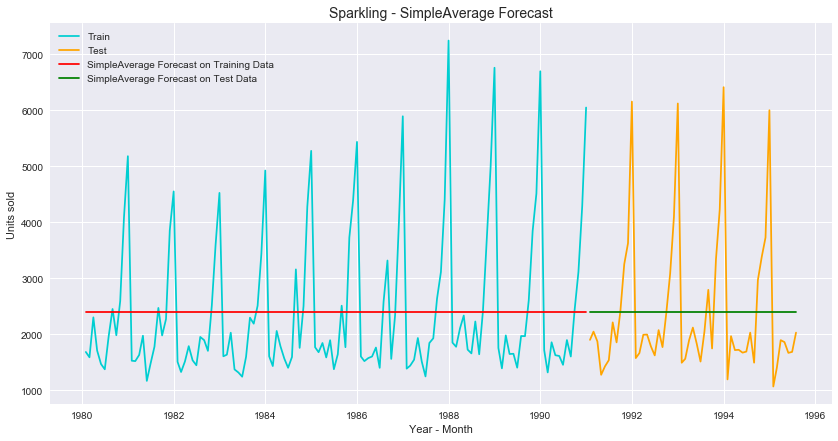

In [2713]:
#plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(test['Sparkling'], label='Test', color = 'orange')
plt.plot(SimpleAverage_train['spark_mean_forecast'], label='SimpleAverage Forecast on Training Data', color = 'red')
plt.plot(SimpleAverage_test['spark_mean_forecast'], label='SimpleAverage Forecast on Test Data', color = 'green')
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title("Sparkling - SimpleAverage Forecast", fontsize=14)

### Rose

In [2714]:
SimpleAverage_train['rose_mean_forecast'] = train['Rose'].mean()
SimpleAverage_train['rose_mean_forecast'].head()

YearMonth
1980-01-31    104.939394
1980-02-29    104.939394
1980-03-31    104.939394
1980-04-30    104.939394
1980-05-31    104.939394
Name: rose_mean_forecast, dtype: float64

In [2715]:
SimpleAverage_test['rose_mean_forecast'] = train['Rose'].mean()
SimpleAverage_test['rose_mean_forecast'].head()

YearMonth
1991-01-31    104.939394
1991-02-28    104.939394
1991-03-31    104.939394
1991-04-30    104.939394
1991-05-31    104.939394
Name: rose_mean_forecast, dtype: float64

Text(0.5, 1.0, 'Rose - SimpleAverage Forecast')

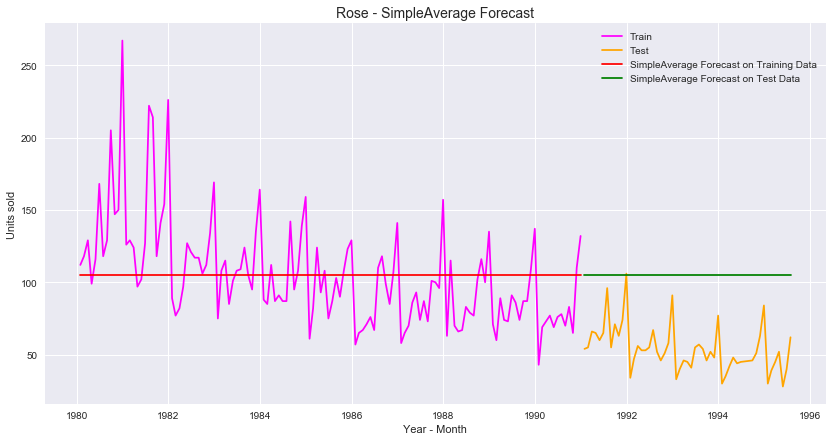

In [2716]:
#plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Rose'], label='Train', color = 'magenta')
plt.plot(test['Rose'], label='Test', color = 'orange')
plt.plot(SimpleAverage_train['rose_mean_forecast'], label='SimpleAverage Forecast on Training Data', color = 'red')
plt.plot(SimpleAverage_test['rose_mean_forecast'], label='SimpleAverage Forecast on Test Data', color = 'green')
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title("Rose - SimpleAverage Forecast", fontsize=14)

### Model Evaluation

In [2717]:
## Sparkling Training Data - RMSE and MAPE

rmse_spark_model3_train = metrics.mean_squared_error(train['Sparkling'],SimpleAverage_train['spark_mean_forecast'],squared=False)
mape_spark_model3_train = MAPE(train['Sparkling'],SimpleAverage_train['spark_mean_forecast'])
print("For Simple Average forecast on the Sparkling Training Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model3_train, mape_spark_model3_train))

For Simple Average forecast on the Sparkling Training Data:  RMSE is 1298.484 and MAPE is 40.36


In [2718]:
## Sparkling Testing Data - RMSE and MAPE

rmse_spark_model3_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['spark_mean_forecast'],squared=False)
mape_spark_model3_test = MAPE(test['Sparkling'],SimpleAverage_test['spark_mean_forecast'])
print("For Simple Average forecast on the Sparkling Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model3_test, mape_spark_model3_test))

For Simple Average forecast on the Sparkling Testing Data:  RMSE is 1275.082 and MAPE is 38.90


In [2719]:
## Rose Training Data - RMSE and MAPE

rmse_rose_model3_train = metrics.mean_squared_error(train['Rose'],SimpleAverage_train['rose_mean_forecast'],squared=False)
mape_rose_model3_train = MAPE(train['Rose'],SimpleAverage_train['rose_mean_forecast'])
print("For Simple Average forecast on the Rose Training Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model3_train, mape_rose_model3_train))

For Simple Average forecast on the Rose Training Data:  RMSE is 36.034 and MAPE is 25.39


In [2720]:
## Rose Testing Data - RMSE and MAPE

rmse_rose_model3_test = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['rose_mean_forecast'],squared=False)
mape_rose_model3_test = MAPE(test['Rose'],SimpleAverage_test['rose_mean_forecast'])
print("For Simple Average forecast on the Rose Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model3_test, mape_rose_model3_test))

For Simple Average forecast on the Rose Testing Data:  RMSE is 53.460 and MAPE is 94.93


In [2721]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_spark_model3_test],'Test MAPE': [mape_spark_model3_test]},index=['SimpleAverage'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_2])
spark_resultsDf

Test RMSE  Test MAPE
RegressionOnTime  1389.135175      50.15
NaiveModel        3864.279352     152.87
SimpleAverage     1275.081804      38.90

In [2722]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_rose_model3_test],'Test MAPE': [mape_rose_model3_test]},index=['SimpleAverage'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_2])
rose_resultsDf

Test RMSE  Test MAPE
RegressionOnTime  15.268885      22.82
NaiveModel        79.718559     145.10
SimpleAverage     53.460350      94.93

## Model 4: Moving Average

In [2723]:
MovingAverage = df.copy()
MovingAverage.head()

Sparkling   Rose
YearMonth                   
1980-01-31       1686  112.0
1980-02-29       1591  118.0
1980-03-31       2304  129.0
1980-04-30       1712   99.0
1980-05-31       1471  116.0

In [2724]:
MovingAverage['Spark_Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Spark_Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Spark_Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Spark_Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()
MovingAverage['Rose_Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Rose_Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Rose_Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Rose_Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head()

Sparkling   Rose  Spark_Trailing_2  Spark_Trailing_4  \
YearMonth                                                          
1980-01-31       1686  112.0               NaN               NaN   
1980-02-29       1591  118.0            1638.5               NaN   
1980-03-31       2304  129.0            1947.5               NaN   
1980-04-30       1712   99.0            2008.0           1823.25   
1980-05-31       1471  116.0            1591.5           1769.50   

            Spark_Trailing_6  Spark_Trailing_9  Rose_Trailing_2  \
YearMonth                                                         
1980-01-31               NaN               NaN              NaN   
1980-02-29               NaN               NaN            115.0   
1980-03-31               NaN               NaN            123.5   
1980-04-30               NaN               NaN            114.0   
1980-05-31               NaN               NaN            107.5   

            Rose_Trailing_4  Rose_Trailing_6  Rose_Trailing_9  
YearMonth                                                      
1980-01-31              NaN              NaN              NaN  
1980-02-29              NaN              NaN              NaN  
1980-03-31              NaN              NaN              NaN  
1980-04-30            114.5              NaN              NaN  
1980-05-31            115.5              NaN              NaN

### Sparkling

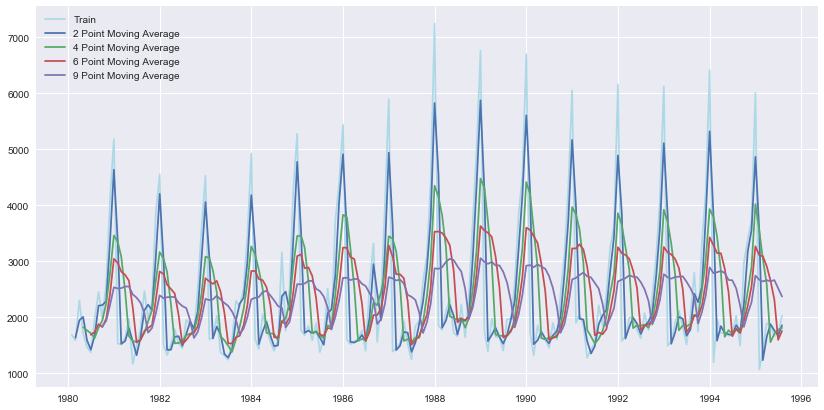

In [2725]:
plt.plot(MovingAverage['Sparkling'], label='Train', color='lightblue')
plt.plot(MovingAverage['Spark_Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Spark_Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Spark_Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Spark_Trailing_9'],label = '9 Point Moving Average')
plt.legend(loc = 'best')

In [2726]:
#Creating train and test set 
trailing_MovingAverage_train = MovingAverage[MovingAverage.index.year < 1991]
trailing_MovingAverage_test = MovingAverage[MovingAverage.index.year >= 1991]

Text(0.5, 1.0, 'Sparkling - Trailing Moving Average Forecast')

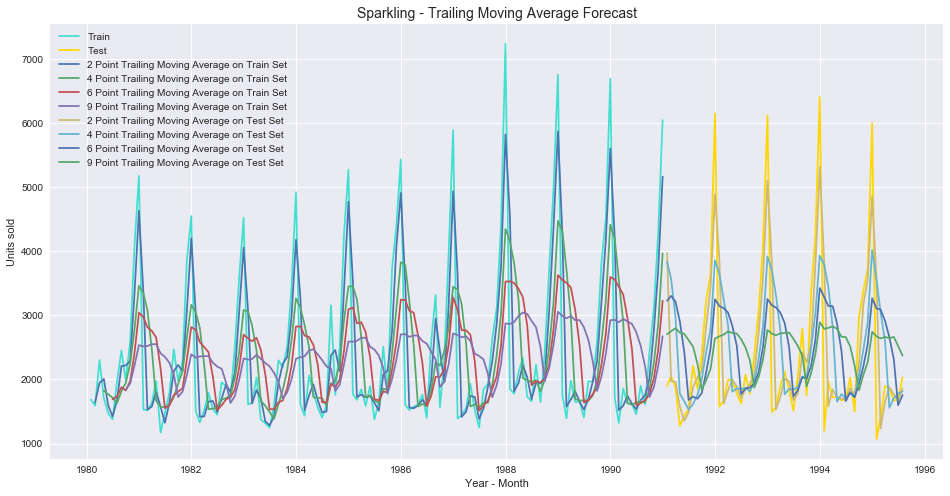

In [2727]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train', color = 'turquoise')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test', color = 'gold')

plt.plot(trailing_MovingAverage_train['Spark_Trailing_2'], label='2 Point Trailing Moving Average on Train Set')
plt.plot(trailing_MovingAverage_train['Spark_Trailing_4'], label='4 Point Trailing Moving Average on Train Set')
plt.plot(trailing_MovingAverage_train['Spark_Trailing_6'],label = '6 Point Trailing Moving Average on Train Set')
plt.plot(trailing_MovingAverage_train['Spark_Trailing_9'],label = '9 Point Trailing Moving Average on Train Set')

plt.plot(trailing_MovingAverage_test['Spark_Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Spark_Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Spark_Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Spark_Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')

plt.xlabel('Year - Month')
plt.ylabel('Units sold')

plt.title("Sparkling - Trailing Moving Average Forecast", fontsize=14)

### Rose

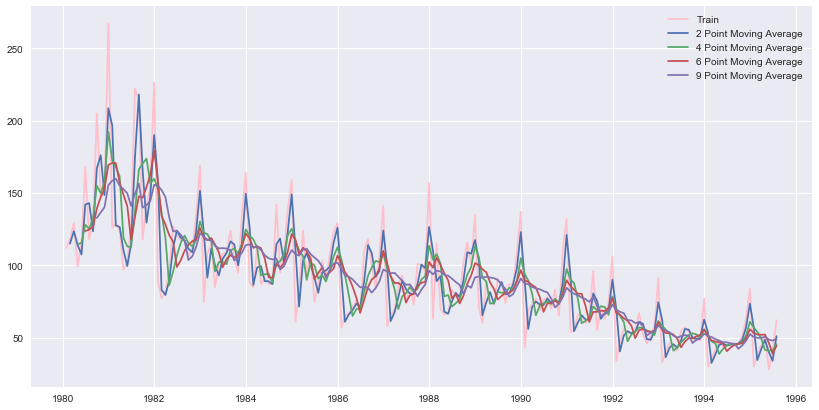

In [2728]:
plt.plot(MovingAverage['Rose'], label='Train', color='pink')
plt.plot(MovingAverage['Rose_Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Rose_Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Rose_Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Rose_Trailing_9'],label = '9 Point Moving Average')
plt.legend(loc = 'best')

Text(0.5, 1.0, 'Rose - Trailing Moving Average Forecast')

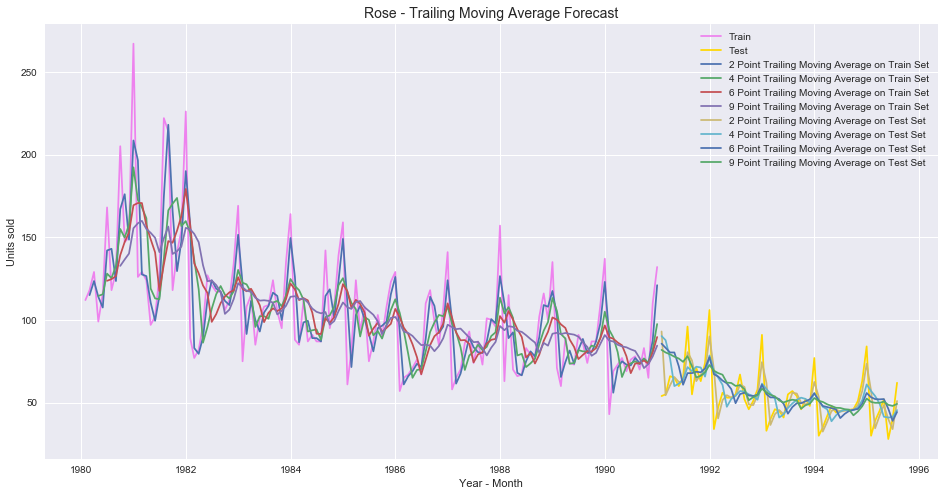

In [2729]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train', color = 'violet')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test', color = 'gold')

plt.plot(trailing_MovingAverage_train['Rose_Trailing_2'], label='2 Point Trailing Moving Average on Train Set')
plt.plot(trailing_MovingAverage_train['Rose_Trailing_4'], label='4 Point Trailing Moving Average on Train Set')
plt.plot(trailing_MovingAverage_train['Rose_Trailing_6'],label = '6 Point Trailing Moving Average on Train Set')
plt.plot(trailing_MovingAverage_train['Rose_Trailing_9'],label = '9 Point Trailing Moving Average on Train Set')

plt.plot(trailing_MovingAverage_test['Rose_Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Rose_Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Rose_Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Rose_Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')

plt.title("Rose - Trailing Moving Average Forecast", fontsize=14)

### Model Evaluation

In [2730]:
## Test Data - rmse_spark and mape_spark --> 2 point Spark_Trailing MA

rmse_spark_model4_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Spark_Trailing_2'],squared=False)
mape_spark_model4_test_2 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Spark_Trailing_2'])
print("For 2 point Moving Average Model forecast on the Training Data,  rmse_spark is %3.3f mape_spark is %3.2f" %(rmse_spark_model4_test_2, mape_spark_model4_test_2))

## Test Data - rmse_spark and mape_spark --> 4 point Spark_Trailing MA

rmse_spark_model4_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Spark_Trailing_4'],squared=False)
mape_spark_model4_test_4 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Spark_Trailing_4'])
print("For 4 point Moving Average Model forecast on the Training Data,  rmse_spark is %3.3f mape_spark is %3.2f" %(rmse_spark_model4_test_4, mape_spark_model4_test_4))

## Test Data - rmse_spark and mape_spark --> 6 point Spark_Trailing MA

rmse_spark_model4_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Spark_Trailing_6'],squared=False)
mape_spark_model4_test_6 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Spark_Trailing_6'])
print("For 6 point Moving Average Model forecast on the Training Data,  rmse_spark is %3.3f mape_spark is %3.2f" %(rmse_spark_model4_test_6, mape_spark_model4_test_6))

## Test Data - rmse_spark and mape_spark --> 9 point Spark_Trailing MA

rmse_spark_model4_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Spark_Trailing_9'],squared=False)
mape_spark_model4_test_9 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Spark_Trailing_9'])
print("For 9 point Moving Average Model forecast on the Training Data,  rmse_spark is %3.3f mape_spark is %3.2f" %(rmse_spark_model4_test_9, mape_spark_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  rmse_spark is 813.401 mape_spark is 19.70
For 4 point Moving Average Model forecast on the Training Data,  rmse_spark is 1156.590 mape_spark is 35.96
For 6 point Moving Average Model forecast on the Training Data,  rmse_spark is 1283.927 mape_spark is 43.86
For 9 point Moving Average Model forecast on the Training Data,  rmse_spark is 1346.278 mape_spark is 46.86


In [2731]:
## Test Data - rmse_rose and mape_rose --> 2 point rose_Trailing MA

rmse_rose_model4_test_2 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Rose_Trailing_2'],squared=False)
mape_rose_model4_test_2 = MAPE(test['Rose'],trailing_MovingAverage_test['Rose_Trailing_2'])
print("For 2 point Moving Average Model forecast on the Training Data,  rmse_rose is %3.3f mape_rose is %3.2f" %(rmse_rose_model4_test_2, mape_rose_model4_test_2))

## Test Data - rmse_rose and mape_rose --> 4 point rose_Trailing MA

rmse_rose_model4_test_4 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Rose_Trailing_4'],squared=False)
mape_rose_model4_test_4 = MAPE(test['Rose'],trailing_MovingAverage_test['Rose_Trailing_4'])
print("For 4 point Moving Average Model forecast on the Training Data,  rmse_rose is %3.3f mape_rose is %3.2f" %(rmse_rose_model4_test_4, mape_rose_model4_test_4))

## Test Data - rmse_rose and mape_rose --> 6 point rose_Trailing MA

rmse_rose_model4_test_6 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Rose_Trailing_6'],squared=False)
mape_rose_model4_test_6 = MAPE(test['Rose'],trailing_MovingAverage_test['Rose_Trailing_6'])
print("For 6 point Moving Average Model forecast on the Training Data,  rmse_rose is %3.3f mape_rose is %3.2f" %(rmse_rose_model4_test_6, mape_rose_model4_test_6))

## Test Data - rmse_rose and mape_rose --> 9 point rose_Trailing MA

rmse_rose_model4_test_9 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Rose_Trailing_9'],squared=False)
mape_rose_model4_test_9 = MAPE(test['Rose'],trailing_MovingAverage_test['Rose_Trailing_9'])
print("For 9 point Moving Average Model forecast on the Training Data,  rmse_rose is %3.3f mape_rose is %3.2f" %(rmse_rose_model4_test_9, mape_rose_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  rmse_rose is 11.529 mape_rose is 13.54
For 4 point Moving Average Model forecast on the Training Data,  rmse_rose is 14.451 mape_rose is 19.49
For 6 point Moving Average Model forecast on the Training Data,  rmse_rose is 14.566 mape_rose is 20.82
For 9 point Moving Average Model forecast on the Training Data,  rmse_rose is 14.728 mape_rose is 21.01


In [2732]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_spark_model4_test_2,rmse_spark_model4_test_4
                                          ,rmse_spark_model4_test_6,rmse_spark_model4_test_9]
                            ,'Test MAPE': [mape_spark_model4_test_2,mape_spark_model4_test_4,
                                           mape_spark_model4_test_6,mape_spark_model4_test_9]}
                           ,index=['2 point TMA','4 point TMA'
                                   ,'6 point TMA','9 point TMA'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_4])
spark_resultsDf

Test RMSE  Test MAPE
RegressionOnTime  1389.135175      50.15
NaiveModel        3864.279352     152.87
SimpleAverage     1275.081804      38.90
2 point TMA        813.400684      19.70
4 point TMA       1156.589694      35.96
6 point TMA       1283.927428      43.86
9 point TMA       1346.278315      46.86

In [2733]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_rose_model4_test_2,rmse_rose_model4_test_4
                                          ,rmse_rose_model4_test_6,rmse_rose_model4_test_9]
                            ,'Test MAPE': [mape_rose_model4_test_2,mape_rose_model4_test_4,
                                           mape_rose_model4_test_6,mape_rose_model4_test_9]}
                           ,index=['2 point TMA','4 point TMA'
                                   ,'6 point TMA','9 point TMA'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_4])
rose_resultsDf

Test RMSE  Test MAPE
RegressionOnTime  15.268885      22.82
NaiveModel        79.718559     145.10
SimpleAverage     53.460350      94.93
2 point TMA       11.529278      13.54
4 point TMA       14.451364      19.49
6 point TMA       14.566269      20.82
9 point TMA       14.727594      21.01

## Model 5: Simple Exponential Smoothing

In [2734]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [2735]:
SES_train = train.copy()
SES_test = test.copy()

In [2736]:
SES_train['Sparkling'].head()

YearMonth
1980-01-31    1686
1980-02-29    1591
1980-03-31    2304
1980-04-30    1712
1980-05-31    1471
Name: Sparkling, dtype: int64

In [2737]:
SES_train['Rose'].head()

YearMonth
1980-01-31    112.0
1980-02-29    118.0
1980-03-31    129.0
1980-04-30     99.0
1980-05-31    116.0
Name: Rose, dtype: float64

### Sparkling

In [2738]:
model = SimpleExpSmoothing(np.asarray(SES_train['Sparkling']))

Test: For alpha = 0.05,  RMSE is 1316.4117 MAPE is 45.50
For smoothing level = 0.05,  Initial level 1686.00


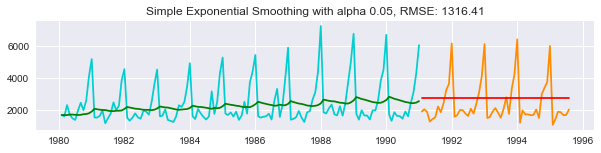

Test: For alpha = 0.10,  RMSE is 1375.3934 MAPE is 49.53
For smoothing level = 0.10,  Initial level 1686.00


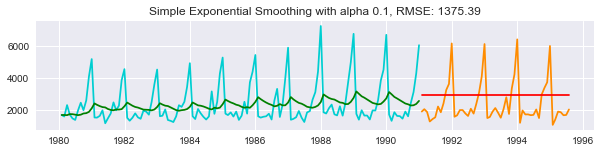

Test: For alpha = 0.20,  RMSE is 1595.2068 MAPE is 60.46
For smoothing level = 0.20,  Initial level 1686.00


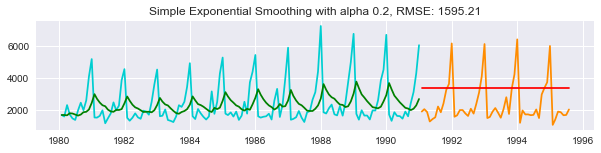

Test: For alpha = 0.30,  RMSE is 1935.5071 MAPE is 75.66
For smoothing level = 0.30,  Initial level 1686.00


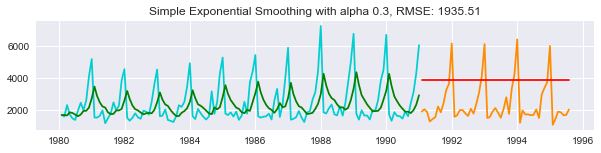

Test: For alpha = 0.50,  RMSE is 2666.3514 MAPE is 106.27
For smoothing level = 0.50,  Initial level 1686.00


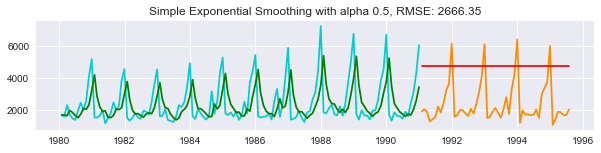

Test: For alpha = 0.99,  RMSE is 3847.5490 MAPE is 152.21
For smoothing level = 0.99,  Initial level 1686.00


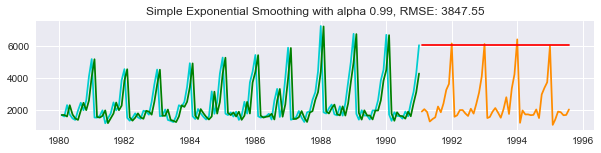

In [2739]:
alpha_list = [0.05, 0.1, 0.2, 0.3, 0.5, 0.99]
pred_train_SES  = train.copy()
pred_test_SES  = test.copy() # Have a copy of the test dataset

#starting a loop
for alpha_value in alpha_list:

    alpha_str            =  "SES " + str(alpha_value)
    mode_fit_i           =  model.fit(smoothing_level = alpha_value, optimized=False)#fitting the model
    pred_train_SES[alpha_str]  =  mode_fit_i.fittedvalues #calculating the forecasts for the train set 
    pred_test_SES[alpha_str]  =  mode_fit_i.forecast(len(test['Sparkling']))#calculating the forecasts for the test set 
    rmse                 =  np.sqrt(metrics.mean_squared_error(test['Sparkling'], pred_test_SES[alpha_str]))#calculate the RMSE for the test set
    mape                 =  MAPE(test['Sparkling'],pred_test_SES[alpha_str])#calculate the MAPE for the test set
    
###

    print("Test: For alpha = %1.2f,  RMSE is %3.4f MAPE is %3.2f" %(alpha_value, rmse, mape))
    print("For smoothing level = %1.2f,  Initial level %1.2f" %(mode_fit_i.params['smoothing_level'],mode_fit_i.params['initial_level']))
    plt.figure(figsize=(10,2))
    #Plotting the training, test and the predicted time series plots
    plt.plot(train['Sparkling'], color = 'darkturquoise')
    plt.plot(test['Sparkling'], color = 'darkorange')
   # plt.plot(pred_train_SES[alpha_str], label  = "Train "+alpha_str, color = 'green')
   # plt.plot(pred_test_SES[alpha_str], label  = "Test "+alpha_str, color = 'red')
    plt.plot(pred_train_SES[alpha_str], color = 'green')
    plt.plot(pred_test_SES[alpha_str], color = 'red')
    plt.title('Simple Exponential Smoothing with alpha ' + str(alpha_value)+', RMSE: '+str(np.round(rmse,2)))
    #plt.legend(loc='best') 
    plt.show();

Will let the model choose the right alpha

In [2740]:
model_SES_autofit = model.fit(optimized=True,use_brute=True)

In [2741]:
model_SES_autofit.params

{'smoothing_level': 0.0,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 2403.785621547663,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [2742]:
SES_train['predict_spark'] = model_SES_autofit.fittedvalues
SES_train.head()

Sparkling   Rose  predict_spark
YearMonth                                  
1980-01-31       1686  112.0    2403.785622
1980-02-29       1591  118.0    2403.785622
1980-03-31       2304  129.0    2403.785622
1980-04-30       1712   99.0    2403.785622
1980-05-31       1471  116.0    2403.785622

In [2743]:
SES_test['predict_spark'] = model_SES_autofit.forecast(steps=len(SES_test))
SES_test.head()

Sparkling  Rose  predict_spark
YearMonth                                 
1991-01-31       1902  54.0    2403.785622
1991-02-28       2049  55.0    2403.785622
1991-03-31       1874  66.0    2403.785622
1991-04-30       1279  65.0    2403.785622
1991-05-31       1432  60.0    2403.785622

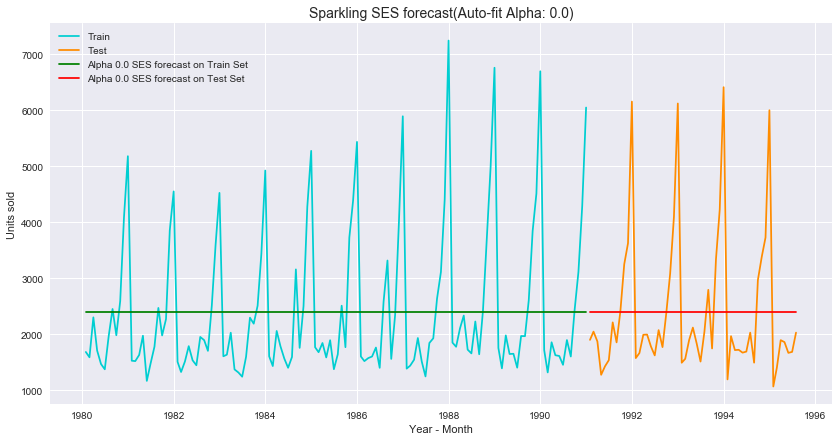

In [2744]:
## Plotting on both the Training and Test data

#plt.figure(figsize=(16,8))
plt.plot(SES_train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(SES_test['Sparkling'], label='Test', color = 'darkorange')

plt.plot(SES_train['predict_spark'],color = 'green', label='Alpha 0.0 SES forecast on Train Set')
plt.plot(SES_test['predict_spark'],color = 'red', label='Alpha 0.0 SES forecast on Test Set')

plt.legend(loc='best')

plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Sparkling SES forecast(Auto-fit Alpha: 0.0)', fontsize = 14);

#print("For smoothing level = %1.2f,  Initial level %1.2f" %(mode_fit_i.params['smoothing_level'],mode_fit_i.params['initial_level']))

### Rose

In [2745]:
model_rose = SimpleExpSmoothing(SES_train['Rose'])
#model_SES_autofit2 = model_rose.fit(optimized=True,use_brute=True)

Test: For alpha = 0.10,  RMSE is 36.8278 MAPE is 63.94
For smoothing level = 0.10,  Initial level 112.00


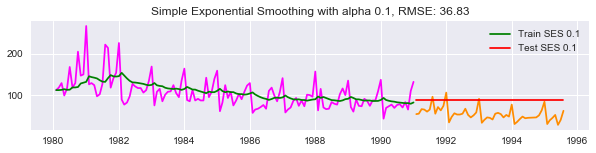

Test: For alpha = 0.20,  RMSE is 41.3617 MAPE is 72.21
For smoothing level = 0.20,  Initial level 112.00


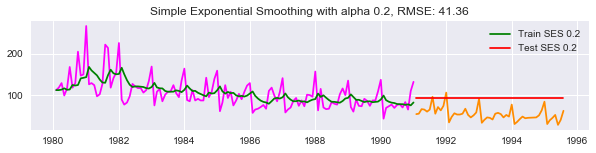

Test: For alpha = 0.30,  RMSE is 47.5046 MAPE is 83.71
For smoothing level = 0.30,  Initial level 112.00


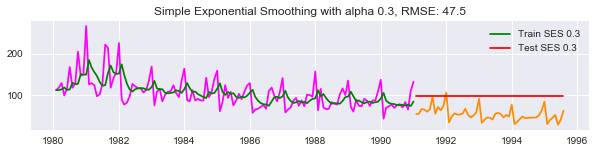

Test: For alpha = 0.50,  RMSE is 59.6416 MAPE is 106.81
For smoothing level = 0.50,  Initial level 112.00


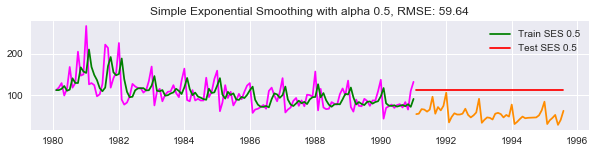

Test: For alpha = 0.99,  RMSE is 79.4985 MAPE is 144.69
For smoothing level = 0.99,  Initial level 112.00


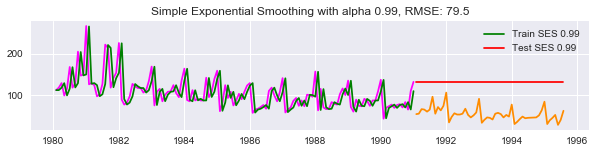

In [2746]:
alpha_list = [0.1, 0.2, 0.3, 0.5, 0.99]
pred_train_SES  = train.copy()
pred_test_SES  = test.copy() # Have a copy of the test dataset

#starting a loop
for alpha_value in alpha_list:

    alpha_str            =  "SES " + str(alpha_value)
    mode_fit_i           =  model_rose.fit(smoothing_level = alpha_value, optimized=False)#fitting the model
    pred_train_SES[alpha_str]  =  mode_fit_i.fittedvalues #calculating the forecasts for the train set 
    pred_test_SES[alpha_str]  =  mode_fit_i.forecast(len(test['Rose']))#calculating the forecasts for the test set 
    rmse                 =  np.sqrt(metrics.mean_squared_error(test['Rose'], pred_test_SES[alpha_str]))#calculate the RMSE for the test set
    mape                 =  MAPE(test['Rose'],pred_test_SES[alpha_str])#calculate the MAPE for the test set
    
###

    print("Test: For alpha = %1.2f,  RMSE is %3.4f MAPE is %3.2f" %(alpha_value, rmse, mape))
    print("For smoothing level = %1.2f,  Initial level %1.2f" %(mode_fit_i.params['smoothing_level'],mode_fit_i.params['initial_level']))
    plt.figure(figsize=(10,2))
    #Plotting the training, test and the predicted time series plots
    plt.plot(train['Rose'], color = 'magenta')
    plt.plot(test['Rose'], color = 'darkorange')
    plt.plot(pred_train_SES[alpha_str], label  = "Train "+alpha_str, color = 'green')
    plt.plot(pred_test_SES[alpha_str], label  = "Test "+alpha_str, color = 'red')
    plt.title('Simple Exponential Smoothing with alpha ' + str(alpha_value)+', RMSE: '+str(np.round(rmse,2)))
    plt.legend(loc='best') 
    plt.show()

In [2747]:
model_SES_autofit2 = model_rose.fit(optimized=True,use_brute=True)
model_SES_autofit2.params

{'smoothing_level': 0.09874989805931945,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 134.38695595667537,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [2748]:
SES_train['predict_rose'] = model_SES_autofit2.fittedvalues
SES_train.head()

Sparkling   Rose  predict_spark  predict_rose
YearMonth                                                
1980-01-31       1686  112.0    2403.785622    134.386956
1980-02-29       1591  118.0    2403.785622    132.176246
1980-03-31       2304  129.0    2403.785622    130.776343
1980-04-30       1712   99.0    2403.785622    130.600930
1980-05-31       1471  116.0    2403.785622    127.480341

In [2749]:
SES_test['predict_rose'] = model_SES_autofit2.forecast(steps=len(SES_test))
SES_test.head()

Sparkling  Rose  predict_spark  predict_rose
YearMonth                                               
1991-01-31       1902  54.0    2403.785622     87.104999
1991-02-28       2049  55.0    2403.785622     87.104999
1991-03-31       1874  66.0    2403.785622     87.104999
1991-04-30       1279  65.0    2403.785622     87.104999
1991-05-31       1432  60.0    2403.785622     87.104999

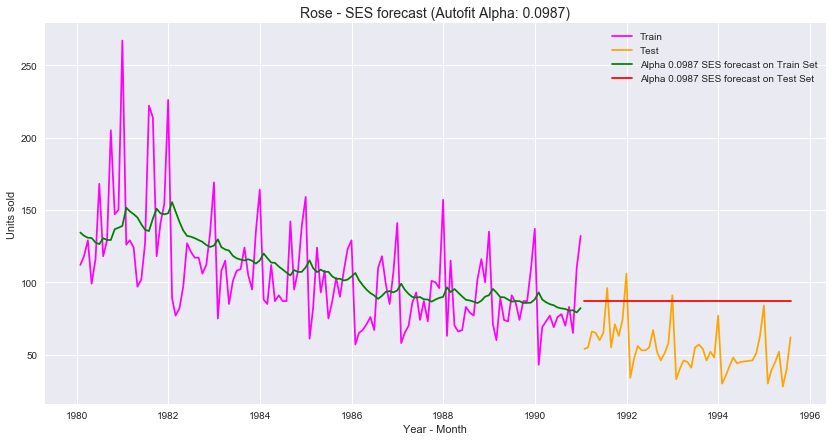

In [2750]:
#plt.figure(figsize=(16,8))
plt.plot(SES_train['Rose'], label='Train', color = 'magenta')
plt.plot(SES_test['Rose'], label='Test', color = 'orange')

plt.plot(SES_train['predict_rose'],color = 'green', label='Alpha 0.0987 SES forecast on Train Set')
plt.plot(SES_test['predict_rose'],color = 'red', label='Alpha 0.0987 SES forecast on Test Set')

plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Rose - SES forecast (Autofit Alpha: 0.0987)', fontsize = 14);

### Model Evaluation

In [2751]:
## Sparkling Training Data - RMSE and MAPE

rmse_spark_model5_train = metrics.mean_squared_error(train['Sparkling'],SES_train['predict_spark'],squared=False)
mape_spark_model5_train = MAPE(train['Sparkling'],SES_train['predict_spark'])
print("For SES forecast on the Sparkling Training Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model5_train, mape_spark_model5_train))

For SES forecast on the Sparkling Training Data:  RMSE is 1298.484 and MAPE is 40.36


In [2752]:
## Sparkling Testing Data - RMSE and MAPE

rmse_spark_model5_test = metrics.mean_squared_error(test['Sparkling'],SES_test['predict_spark'],squared=False)
mape_spark_model5_test = MAPE(test['Sparkling'],SES_test['predict_spark'])
print("For SES forecast on the Sparkling Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model5_test, mape_spark_model5_test))

For SES forecast on the Sparkling Testing Data:  RMSE is 1275.082 and MAPE is 38.90


In [2753]:
## Rose Training Data - RMSE and MAPE

rmse_rose_model5_train = metrics.mean_squared_error(train['Rose'],SES_train['predict_rose'],squared=False)
mape_rose_model5_train = MAPE(train['Rose'],SES_train['predict_rose'])
print("For SES forecast on the Rose Training Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model5_train, mape_rose_model5_train))

For SES forecast on the Rose Training Data:  RMSE is 31.501 and MAPE is 22.73


In [2754]:
## Rose Testing Data - RMSE and MAPE

rmse_rose_model5_test = metrics.mean_squared_error(test['Rose'],SES_test['predict_rose'],squared=False)
mape_rose_model5_test = MAPE(test['Rose'],SES_test['predict_rose'])
print("For SES forecast on the Rose Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model5_test, mape_rose_model5_test))

For SES forecast on the Rose Testing Data:  RMSE is 36.796 and MAPE is 63.88


In [2755]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_spark_model5_test],'Test MAPE': [mape_spark_model5_test]},index=['SES Alpha 0.00'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_5])
spark_resultsDf

Test RMSE  Test MAPE
RegressionOnTime  1389.135175      50.15
NaiveModel        3864.279352     152.87
SimpleAverage     1275.081804      38.90
2 point TMA        813.400684      19.70
4 point TMA       1156.589694      35.96
6 point TMA       1283.927428      43.86
9 point TMA       1346.278315      46.86
SES Alpha 0.00    1275.081823      38.90

In [2756]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_rose_model5_test],'Test MAPE': [mape_rose_model5_test]},index=['SES Alpha 0.01'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_5])
rose_resultsDf

Test RMSE  Test MAPE
RegressionOnTime  15.268885      22.82
NaiveModel        79.718559     145.10
SimpleAverage     53.460350      94.93
2 point TMA       11.529278      13.54
4 point TMA       14.451364      19.49
6 point TMA       14.566269      20.82
9 point TMA       14.727594      21.01
SES Alpha 0.01    36.796019      63.88

## Model 6: Double Exponential Smoothing (Holt's Model)

In [2757]:
DES_train = train.copy()
DES_test = test.copy()

### Sparkling

In [2758]:
model_DES = Holt(DES_train['Sparkling'])

In [2759]:
resultsDf_6 = pd.DataFrame({'Alpha':[],'Beta':[],'Train RMSE':[],'Train MAPE':[],
                            'Test RMSE': [],'Test MAPE': []})
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=True,use_brute=True)
        DES_train['predict_spark',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict_spark',i,j] = model_DES_alpha_i_j.forecast(len(test['Sparkling']))
        
        rmse_spark_model6_train = np.round(metrics.mean_squared_error(DES_train['Sparkling'],DES_train['predict_spark',i,j],squared=False),2)
        mape_spark_model6_train = MAPE(DES_train['Sparkling'],DES_train['predict_spark',i,j])
        
        rmse_spark_model6_test = np.round(metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict_spark',i,j],squared=False),2)
        mape_spark_model6_test = MAPE(DES_test['Sparkling'],DES_test['predict_spark',i,j])
        
        resultsDf_6 = resultsDf_6.append({'Alpha':i,'Beta':j,
                                          'Train RMSE':rmse_spark_model6_train ,'Train MAPE': mape_spark_model6_train,
                                          'Test RMSE':rmse_spark_model6_test ,'Test MAPE':mape_spark_model6_test}, 
                                         ignore_index=True)

In [2760]:
resultsDf_6.sort_values(by=['Test RMSE']).head(3)

Alpha  Beta  Train RMSE  Train MAPE  Test RMSE  Test MAPE
0     0.1   0.1     1363.47       44.26    1779.43      67.23
1     0.1   0.2     1401.76       45.65    2599.79      95.44
10    0.2   0.1     1412.03       46.62    3611.77     135.41

In [2761]:
resultsDf_6.sort_values(by=['Test MAPE']).head()

Alpha  Beta  Train RMSE  Train MAPE  Test RMSE  Test MAPE
0     0.1   0.1     1363.47       44.26    1779.43      67.23
1     0.1   0.2     1401.76       45.65    2599.79      95.44
10    0.2   0.1     1412.03       46.62    3611.77     135.41
2     0.1   0.3     1435.33       46.85    4290.13     155.32
3     0.1   0.4     1471.35       48.26    6041.56     219.06

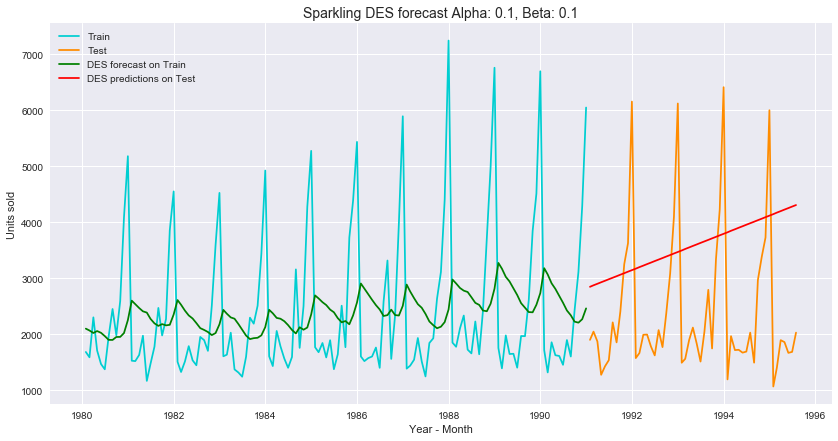

In [2762]:
#plt.figure(figsize=(10,5))
plt.plot(DES_train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(DES_test['Sparkling'], label='Test', color = 'darkorange')

plt.plot(DES_train['predict_spark', 0.1, 0.1], color = 'green', label='DES forecast on Train')
plt.plot(DES_test['predict_spark', 0.1, 0.1], color = 'red', label='DES predictions on Test')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Sparkling DES forecast Alpha: 0.1, Beta: 0.1', fontsize=14)
plt.legend(loc='best')

Trying auto fit by the model

In [2763]:
model_DES_autofit = model_DES.fit(optimized=True,use_brute=True)

In [2764]:
model_DES_autofit.params

{'smoothing_level': 0.6478112025162996,
 'smoothing_slope': 0.0,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 1686.0826224342366,
 'initial_slope': 27.064245197810123,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [2765]:
alpha = model_DES_autofit.params['smoothing_level']
beta = model_DES_autofit.params['smoothing_slope']
alpha_6_1 = alpha
beta_6_1 = beta

In [2766]:
DES_train['predict_spark',alpha,beta] = model_DES_autofit.fittedvalues
#DES_train.head()

In [2767]:
DES_test['predict_spark',alpha,beta] = model_DES_autofit.forecast(len(test['Sparkling']))
#DES_test.head()

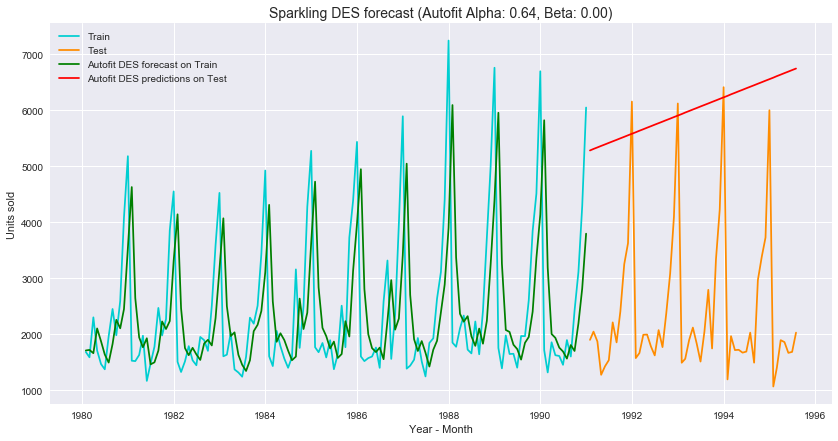

In [2768]:
#plt.figure(figsize=(10,5))
plt.plot(DES_train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(DES_test['Sparkling'], label='Test', color = 'darkorange')

plt.plot(DES_train['predict_spark',alpha,beta], color = 'green', label='Autofit DES forecast on Train')
plt.plot(DES_test['predict_spark',alpha,beta], color = 'red', label='Autofit DES predictions on Test')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Sparkling DES forecast (Autofit Alpha: 0.64, Beta: 0.00)', fontsize=14);
plt.legend(loc='best')

In [2769]:
rmse_spark_model6_train = metrics.mean_squared_error(DES_train['Sparkling'],DES_train['predict_spark',alpha,beta],squared=False)
mape_spark_model6_train = MAPE(DES_train['Sparkling'],DES_train['predict_spark',alpha,beta])
        
rmse_spark_model6_test = metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict_spark',alpha,beta],squared=False)
mape_spark_model6_test = MAPE(DES_test['Sparkling'],DES_test['predict_spark',alpha,beta])

resultsDf_6 = resultsDf_6.append({'Alpha':alpha,'Beta':beta,'Train RMSE':rmse_spark_model6_train
                                      ,'Train MAPE': mape_spark_model6_train,'Test RMSE':rmse_spark_model6_test
                                      ,'Test MAPE':mape_spark_model6_test}, ignore_index=True)

In [2770]:
resultsDf_6.sort_values(by=['Test RMSE']).head()

Alpha  Beta  Train RMSE  Train MAPE  Test RMSE  Test MAPE
0    0.100000   0.1  1363.47000       44.26  1779.4300      67.23
1    0.100000   0.2  1401.76000       45.65  2599.7900      95.44
10   0.200000   0.1  1412.03000       46.62  3611.7700     135.41
100  0.647811   0.0  1337.48427       39.11  3851.1715     152.07
2    0.100000   0.3  1435.33000       46.85  4290.1300     155.32

In [2771]:
resultsDf_6.sort_values(by=['Test MAPE']).head()

Alpha  Beta  Train RMSE  Train MAPE  Test RMSE  Test MAPE
0    0.100000   0.1  1363.47000       44.26  1779.4300      67.23
1    0.100000   0.2  1401.76000       45.65  2599.7900      95.44
10   0.200000   0.1  1412.03000       46.62  3611.7700     135.41
100  0.647811   0.0  1337.48427       39.11  3851.1715     152.07
2    0.100000   0.3  1435.33000       46.85  4290.1300     155.32

Auto fitted model shows better RMSE and MAPE in train, but not the best fit in test set

### Rose

In [2772]:
model_DES_rose = Holt(DES_train['Rose'])

In [2773]:
resultsDf_6_rose = pd.DataFrame({'Alpha':[],'Beta':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_rose_alpha_i_j = model_DES_rose.fit(smoothing_level=i,smoothing_slope=j,optimized=True,use_brute=True)
        DES_train['predict_rose',i,j] = model_DES_rose_alpha_i_j.fittedvalues
        DES_test['predict_rose',i,j] = model_DES_rose_alpha_i_j.forecast(len(test['Rose']))
        
        rmse_rose_model6_train = metrics.mean_squared_error(DES_train['Rose'],DES_train['predict_rose',i,j],squared=False)
        mape_rose_model6_train = MAPE(DES_train['Rose'],DES_train['predict_rose',i,j])
        
        rmse_rose_model6_test = metrics.mean_squared_error(DES_test['Rose'],DES_test['predict_rose',i,j],squared=False)
        mape_rose_model6_test = MAPE(DES_test['Rose'],DES_test['predict_rose',i,j])
        
        resultsDf_6_rose = resultsDf_6_rose.append({'Alpha':i,'Beta':j,'Train RMSE':rmse_rose_model6_train
                                      ,'Train MAPE': mape_rose_model6_train,'Test RMSE':rmse_rose_model6_test
                                      ,'Test MAPE':mape_rose_model6_test}, ignore_index=True)

In [2774]:
resultsDf_6_rose.sort_values(by=['Test RMSE']).head()

Alpha  Beta  Train RMSE  Train MAPE  Test RMSE  Test MAPE
0     0.1   0.1   32.026565       22.78  37.056912      64.02
1     0.1   0.2   33.450729       24.45  48.688399      83.09
10    0.2   0.1   32.796403       23.06  65.731352     113.20
2     0.1   0.3   33.145789       24.46  78.156381     131.24
20    0.3   0.1   33.528397       23.47  98.653063     170.12

In [2775]:
resultsDf_6_rose.sort_values(by=['Test MAPE']).head()

Alpha  Beta  Train RMSE  Train MAPE  Test RMSE  Test MAPE
0     0.1   0.1   32.026565       22.78  37.056912      64.02
1     0.1   0.2   33.450729       24.45  48.688399      83.09
10    0.2   0.1   32.796403       23.06  65.731352     113.20
2     0.1   0.3   33.145789       24.46  78.156381     131.24
3     0.1   0.4   33.262191       24.68  99.583210     165.53

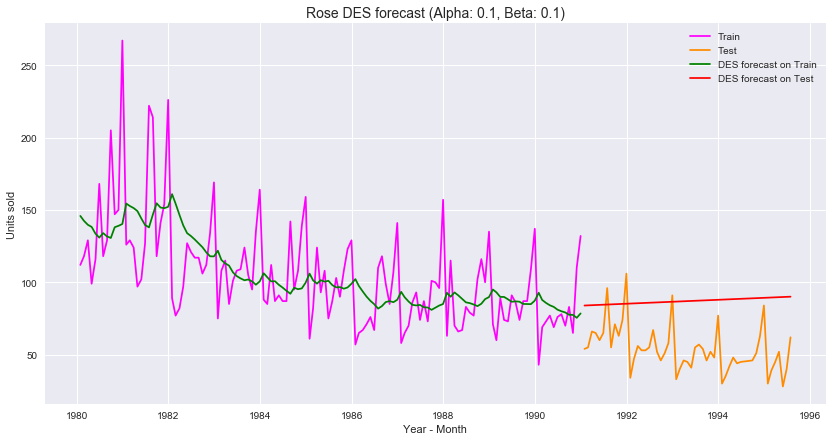

In [2776]:
#plt.figure(figsize=(10,5))
plt.plot(DES_train['Rose'], label='Train', color = 'magenta')
plt.plot(DES_test['Rose'], label='Test', color = 'darkorange')

plt.plot(DES_train['predict_rose', 0.1, 0.1], color = 'green', label='DES forecast on Train')
plt.plot(DES_test['predict_rose', 0.1, 0.1], color = 'red', label='DES forecast on Test')

plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Rose DES forecast (Alpha: 0.1, Beta: 0.1)', fontsize=14);
plt.legend(loc='best');

Attempting autofit

In [2777]:
model_DES_rose_autofit = model_DES_rose.fit(optimized=True,use_brute=True)

In [2778]:
model_DES_rose_autofit.params

{'smoothing_level': 0.15789473684210525,
 'smoothing_slope': 0.15789473684210525,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 112.0,
 'initial_slope': 6.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [2779]:
alpha = model_DES_rose_autofit.params['smoothing_level']
beta = model_DES_rose_autofit.params['smoothing_slope']
alpha_6_2 = alpha
beta_6_2 = beta

In [2780]:
DES_train['predict_rose',alpha,beta] = model_DES_rose_autofit.fittedvalues

In [2781]:
DES_test['predict_rose',alpha,beta] = model_DES_rose_autofit.forecast(len(test['Rose']))

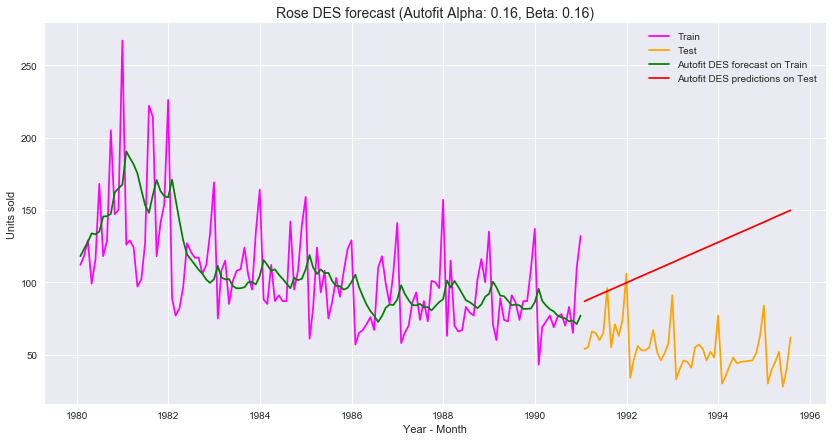

In [2782]:
#plt.figure(figsize=(10,5))
plt.plot(DES_train['Rose'], label='Train', color = 'magenta')
plt.plot(DES_test['Rose'], label='Test', color = 'orange')

plt.plot(DES_train['predict_rose',alpha,beta], color = 'green', label='Autofit DES forecast on Train')
plt.plot(DES_test['predict_rose',alpha,beta], color = 'red', label='Autofit DES predictions on Test')

plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Rose DES forecast (Autofit Alpha: 0.16, Beta: 0.16)', fontsize=14)

plt.legend(loc='best')

In [2783]:
rmse_rose_model6_train = metrics.mean_squared_error(DES_train['Rose'],DES_train['predict_rose',alpha,beta],squared=False)
mape_rose_model6_train = MAPE(DES_train['Rose'],DES_train['predict_rose',alpha,beta])
        
rmse_rose_model6_test = metrics.mean_squared_error(DES_test['Rose'],DES_test['predict_rose',alpha,beta],squared=False)
mape_rose_model6_test = MAPE(DES_test['Rose'],DES_test['predict_rose',alpha,beta])
        
resultsDf_6_rose = resultsDf_6_rose.append({'Alpha':alpha,'Beta':beta,'Train RMSE':rmse_rose_model6_train
                                      ,'Train MAPE': mape_rose_model6_train,'Test RMSE':rmse_rose_model6_test
                                      ,'Test MAPE':mape_rose_model6_test}, ignore_index=True)

In [2784]:
resultsDf_6_rose.sort_values(by=['Test RMSE']).head()

Alpha      Beta  Train RMSE  Train MAPE  Test RMSE  Test MAPE
0    0.100000  0.100000   32.026565       22.78  37.056912      64.02
1    0.100000  0.200000   33.450729       24.45  48.688399      83.09
10   0.200000  0.100000   32.796403       23.06  65.731352     113.20
100  0.157895  0.157895   33.074575       23.99  70.572197     120.25
2    0.100000  0.300000   33.145789       24.46  78.156381     131.24

In [2785]:
resultsDf_6_rose.sort_values(by=['Test MAPE']).head()

Alpha      Beta  Train RMSE  Train MAPE  Test RMSE  Test MAPE
0    0.100000  0.100000   32.026565       22.78  37.056912      64.02
1    0.100000  0.200000   33.450729       24.45  48.688399      83.09
10   0.200000  0.100000   32.796403       23.06  65.731352     113.20
100  0.157895  0.157895   33.074575       23.99  70.572197     120.25
2    0.100000  0.300000   33.145789       24.46  78.156381     131.24

### Model Evaluation

In [2786]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6['Test RMSE'][0],resultsDf_6['Test RMSE'][100]],
                              'Test MAPE': [resultsDf_6['Test MAPE'][0],resultsDf_6['Test MAPE'][100]]}
                           ,index=['DES Alpha 0.1,Beta 0.1','DES Alpha 0.6,Beta 0.0'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_6_1])
spark_resultsDf


Test RMSE  Test MAPE
RegressionOnTime        1389.135175      50.15
NaiveModel              3864.279352     152.87
SimpleAverage           1275.081804      38.90
2 point TMA              813.400684      19.70
4 point TMA             1156.589694      35.96
6 point TMA             1283.927428      43.86
9 point TMA             1346.278315      46.86
SES Alpha 0.00          1275.081823      38.90
DES Alpha 0.1,Beta 0.1  1779.430000      67.23
DES Alpha 0.6,Beta 0.0  3851.171500     152.07

In [2787]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE':[resultsDf_6_rose['Test RMSE'][100],resultsDf_6_rose['Test RMSE'][0]],
                              'Test MAPE':[resultsDf_6_rose['Test MAPE'][100],resultsDf_6_rose['Test MAPE'][0]]}
                           ,index=['DES Alpha 0.16, Beta 0.16','DES Alpha 0.10, Beta 0.10'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_6_1])
rose_resultsDf

Test RMSE  Test MAPE
RegressionOnTime           15.268885      22.82
NaiveModel                 79.718559     145.10
SimpleAverage              53.460350      94.93
2 point TMA                11.529278      13.54
4 point TMA                14.451364      19.49
6 point TMA                14.566269      20.82
9 point TMA                14.727594      21.01
SES Alpha 0.01             36.796019      63.88
DES Alpha 0.16, Beta 0.16  70.572197     120.25
DES Alpha 0.10, Beta 0.10  37.056912      64.02

## Model 7: Triple Exponential Smoothing (Holt - Winter's Model)

In [2788]:
TES_train = train.copy()
TES_test = test.copy()

### Sparkling

In [2789]:
model_TES = ExponentialSmoothing(TES_train['Sparkling'],trend='additive',seasonal='multiplicative',freq='M')
#model_TES = ExponentialSmoothing(TES_train['Sparkling'],trend='additive',seasonal='additive',freq='M')

In [2790]:
resultsDf_7_1 = pd.DataFrame({'Alpha':[],'Beta':[],'Gamma':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=True,use_brute=True)
            TES_train['predict_spark',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_spark',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test['Sparkling']))
        
            rmse_spark_model7_train = metrics.mean_squared_error(TES_train['Sparkling'],TES_train['predict_spark',i,j,k],squared=False)
            mape_spark_model7_train = MAPE(TES_train['Sparkling'],TES_train['predict_spark',i,j,k])
        
            rmse_spark_model7_test = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['predict_spark',i,j,k],squared=False)
            mape_spark_model7_test = MAPE(TES_test['Sparkling'],TES_test['predict_spark',i,j,k])
        
            resultsDf_7_1 = resultsDf_7_1.append({'Alpha':i,'Beta':j,'Gamma':k,'Train RMSE':rmse_spark_model7_train
                                      ,'Train MAPE': mape_spark_model7_train,'Test RMSE':rmse_spark_model7_test
                                      ,'Test MAPE': mape_spark_model7_test}, ignore_index=True)

In [2791]:
resultsDf_7_1.sort_values(by=['Test RMSE']).head()

Alpha  Beta  Gamma  Train RMSE  Train MAPE   Test RMSE  Test MAPE
301    0.4   0.1    0.2  373.281410       11.05  312.211095      10.20
211    0.3   0.2    0.2  377.346884       11.23  315.195004      10.07
300    0.4   0.1    0.1  370.807398       11.06  318.281180      10.00
402    0.5   0.1    0.3  390.181794       11.54  325.690492       9.99
403    0.5   0.1    0.4  401.059753       11.55  343.321993      11.07

In [2792]:
resultsDf_7_1.sort_values(by=['Test MAPE']).head()

Alpha  Beta  Gamma  Train RMSE  Train MAPE   Test RMSE  Test MAPE
402    0.5   0.1    0.3  390.181794       11.54  325.690492       9.99
300    0.4   0.1    0.1  370.807398       11.06  318.281180      10.00
211    0.3   0.2    0.2  377.346884       11.23  315.195004      10.07
301    0.4   0.1    0.2  373.281410       11.05  312.211095      10.20
401    0.5   0.1    0.2  384.608362       11.44  344.182438      10.67

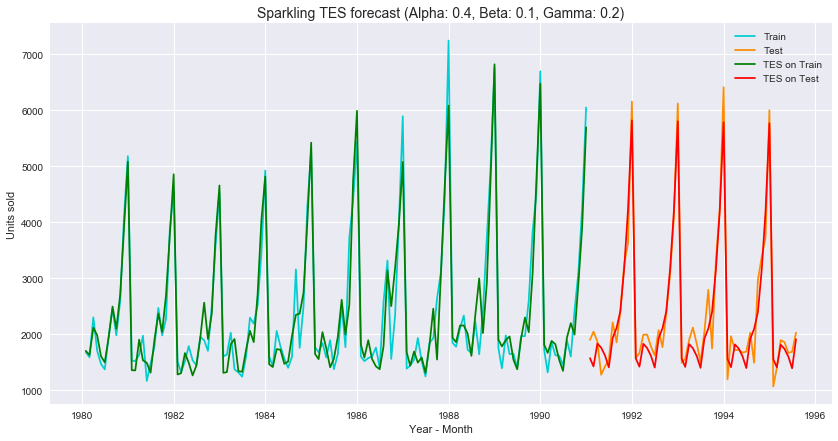

In [2793]:
#plt.figure(figsize=(15,5))
plt.plot(TES_train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(TES_test['Sparkling'], label='Test', color = 'darkorange')

plt.plot(TES_train['predict_spark', 0.4, 0.1, 0.2], color = 'green', label='TES on Train')
plt.plot(TES_test['predict_spark', 0.4, 0.1, 0.2], color='red', label='TES on Test')

#plt.plot(TES_train['predict_spark', 0.5, 0.1, 0.3], color = 'green', label='Alpha=0.5,Beta=0.1,Gamma=0.3,TES on Train')
#plt.plot(TES_test['predict_spark', 0.5, 0.1, 0.3], color='red', label='Alpha=0.5,Beta=0.1,Gamma=0.3,TES on Test')

plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Sparkling TES forecast (Alpha: 0.4, Beta: 0.1, Gamma: 0.2)', fontsize=14)

plt.legend(loc='best')

Attempt Autofit of TES

In [2794]:
model_TES_autofit = model_TES.fit(optimized=True,use_brute=True)

In [2795]:
model_TES_autofit.params

{'smoothing_level': 0.15443133706629503,
 'smoothing_slope': 6.108874921042356e-28,
 'smoothing_seasonal': 0.371166173081257,
 'damping_slope': nan,
 'initial_level': 1639.9993396930959,
 'initial_slope': 4.884798825583997,
 'initial_seasons': array([1.00840895, 0.9689857 , 1.24171518, 1.13204491, 0.93985543,
        0.93813662, 1.22454056, 1.54418856, 1.27332316, 1.63188742,
        2.48260217, 3.11818407]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [2796]:
alpha = model_TES_autofit.params['smoothing_level']
beta = model_TES_autofit.params['smoothing_slope']
gamma = model_TES_autofit.params['smoothing_seasonal']
alpha_7_1 = alpha
beta_7_1 = beta
gamma_7_1 = gamma

In [2797]:
TES_train['predict_spark',alpha,beta,gamma] = model_TES_autofit.fittedvalues

In [2798]:
TES_test['predict_spark',alpha,beta,gamma] = model_TES_autofit.forecast(steps=len(test['Sparkling']))

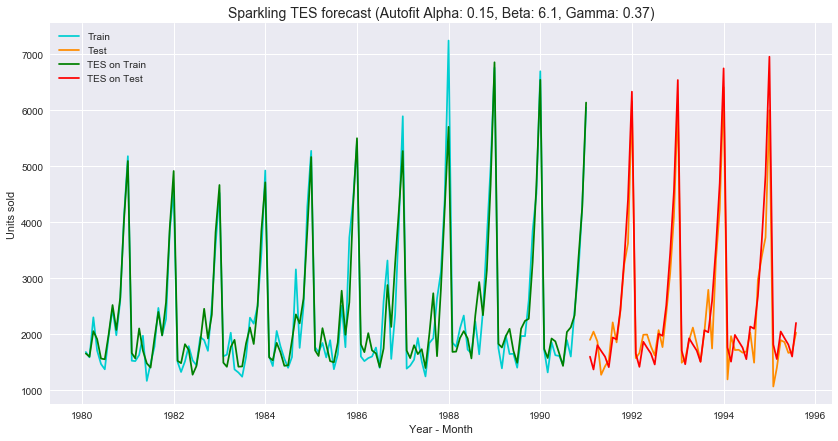

In [2799]:
plt.plot(TES_train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(TES_test['Sparkling'], label='Test', color = 'darkorange')

plt.plot(TES_train['predict_spark',alpha,beta,gamma], color = 'green', label='TES on Train')
plt.plot(TES_test['predict_spark',alpha,beta,gamma], color='red', label='TES on Test')

plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Sparkling TES forecast (Autofit Alpha: 0.15, Beta: 6.1, Gamma: 0.37)', fontsize=14)

plt.legend(loc='best')

In [2800]:
rmse_spark_model7_train = metrics.mean_squared_error(TES_train['Sparkling'],TES_train['predict_spark',alpha,beta,gamma],squared=False)
mape_spark_model7_train = MAPE(TES_train['Sparkling'],TES_train['predict_spark',alpha,beta,gamma])
        
rmse_spark_model7_test = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['predict_spark',alpha,beta,gamma],squared=False)
mape_spark_model7_test = MAPE(TES_test['Sparkling'],TES_test['predict_spark',alpha,beta,gamma])
        
resultsDf_7_1 = resultsDf_7_1.append({'Alpha':np.round(alpha,2),'Beta':np.round(beta,2),'Gamma':np.round(gamma,2),'Train RMSE':rmse_spark_model7_train
                                      ,'Train MAPE': mape_spark_model7_train,'Test RMSE':rmse_spark_model7_test
                                      ,'Test MAPE': mape_spark_model7_test}, ignore_index=True)

In [2801]:
resultsDf_7_1.tail()

Alpha  Beta  Gamma     Train RMSE  Train MAPE     Test RMSE  Test MAPE
996    1.00   1.0   0.70   93702.603162     1031.58  1.383388e+06   25559.44
997    1.00   1.0   0.80  104677.046328     1039.17  3.959727e+06   55484.79
998    1.00   1.0   0.90  161779.762665     1427.45  5.643065e+05    8672.79
999    1.00   1.0   1.00  239920.545915     1304.98  1.211460e+05    3173.80
1000   0.15   0.0   0.37     353.379117       10.18  3.842030e+02      11.94

In [2802]:
resultsDf_7_1.sort_values(by=['Test RMSE']).head()

Alpha  Beta  Gamma  Train RMSE  Train MAPE   Test RMSE  Test MAPE
301    0.4   0.1    0.2  373.281410       11.05  312.211095      10.20
211    0.3   0.2    0.2  377.346884       11.23  315.195004      10.07
300    0.4   0.1    0.1  370.807398       11.06  318.281180      10.00
402    0.5   0.1    0.3  390.181794       11.54  325.690492       9.99
403    0.5   0.1    0.4  401.059753       11.55  343.321993      11.07

In [2803]:
resultsDf_7_1.sort_values(by=['Test MAPE']).head()

Alpha  Beta  Gamma  Train RMSE  Train MAPE   Test RMSE  Test MAPE
402    0.5   0.1    0.3  390.181794       11.54  325.690492       9.99
300    0.4   0.1    0.1  370.807398       11.06  318.281180      10.00
211    0.3   0.2    0.2  377.346884       11.23  315.195004      10.07
301    0.4   0.1    0.2  373.281410       11.05  312.211095      10.20
401    0.5   0.1    0.2  384.608362       11.44  344.182438      10.67

### Rose

In [2804]:
model_TES_2 = ExponentialSmoothing(TES_train['Rose'],trend='additive',seasonal='multiplicative',freq='M')

In [2805]:
resultsDf_7_2 = pd.DataFrame({'Alpha':[],'Beta':[],'Gamma':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})

In [2806]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES_2.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=True,use_brute=True)
            TES_train['predict_rose',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_rose',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test['Rose']))
        
            rmse_rose_model7_train = metrics.mean_squared_error(TES_train['Rose'],TES_train['predict_rose',i,j,k],squared=False)
            mape_rose_model7_train = MAPE(TES_train['Rose'],TES_train['predict_rose',i,j,k])
        
            rmse_rose_model7_test = metrics.mean_squared_error(TES_test['Rose'],TES_test['predict_rose',i,j,k],squared=False)
            mape_rose_model7_test = MAPE(TES_test['Rose'],TES_test['predict_rose',i,j,k])
        
            resultsDf_7_2 = resultsDf_7_2.append({'Alpha':i,'Beta':j,'Gamma':k,'Train RMSE':rmse_rose_model7_train
                                      ,'Train MAPE': mape_rose_model7_train,'Test RMSE':rmse_rose_model7_test
                                      ,'Test MAPE': mape_rose_model7_test}, ignore_index=True)

In [2807]:
resultsDf_7_2.sort_values(by=['Test RMSE']).head()

Alpha  Beta  Gamma  Train RMSE  Train MAPE  Test RMSE  Test MAPE
11     0.1   0.2    0.2   24.365597       15.36   9.640616      13.96
12     0.1   0.2    0.3   23.969166       15.13   9.935672      14.21
10     0.1   0.2    0.1   25.529854       16.06   9.943512      14.39
142    0.2   0.5    0.3   27.631767       17.87  10.026322      14.34
151    0.2   0.6    0.2   28.289836       18.09  10.031754      13.62

In [2808]:
resultsDf_7_2.sort_values(by=['Test MAPE']).head()

Alpha  Beta  Gamma  Train RMSE  Train MAPE  Test RMSE  Test MAPE
151    0.2   0.6    0.2   28.289836       18.09  10.031754      13.62
223    0.3   0.3    0.4   24.209084       16.78  10.169735      13.67
11     0.1   0.2    0.2   24.365597       15.36   9.640616      13.96
214    0.3   0.2    0.5   24.580627       16.87  10.413323      14.00
12     0.1   0.2    0.3   23.969166       15.13   9.935672      14.21

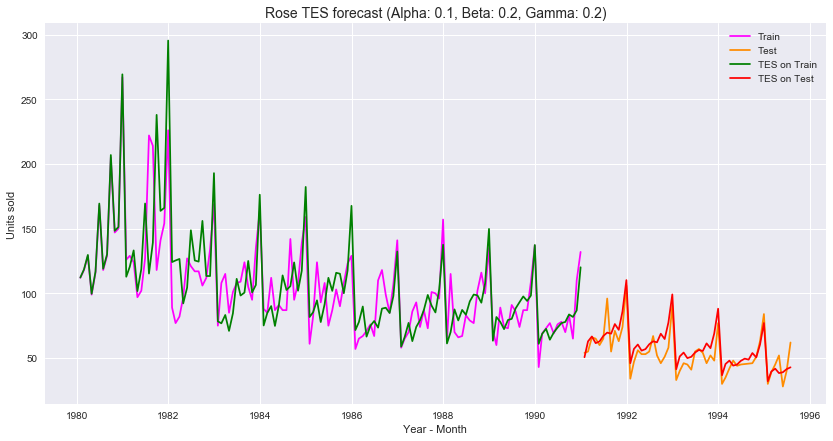

In [2809]:
plt.plot(TES_train['Rose'], label='Train', color = 'magenta')
plt.plot(TES_test['Rose'], label='Test', color = 'darkorange')

#plt.plot(TES_train['predict_rose', 0.2, 0.6, 0.2], color = 'green', label='Alpha=0.2,Beta=0.6,Gamma=0.2,TES on Train')
#plt.plot(TES_test['predict_rose', 0.2, 0.6, 0.2], color='red', label='Alpha=0.2,Beta=0.6,Gamma=0.2,TES on Test')

plt.plot(TES_train['predict_rose', 0.1, 0.2, 0.2], color = 'green', label='TES on Train')
plt.plot(TES_test['predict_rose', 0.1, 0.2, 0.2], color='red', label='TES on Test')

plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Rose TES forecast (Alpha: 0.1, Beta: 0.2, Gamma: 0.2)', fontsize=14)

plt.legend(loc='best')

Attempt autofit

In [2810]:
model_TES_autofit = model_TES_2.fit(optimized=True,use_brute=True)

In [2811]:
model_TES_autofit.params

{'smoothing_level': 0.10609628211044227,
 'smoothing_slope': 0.04843853483296353,
 'smoothing_seasonal': 0.0,
 'damping_slope': nan,
 'initial_level': 76.65565233828687,
 'initial_slope': 0.0,
 'initial_seasons': array([1.47550285, 1.65927166, 1.80572675, 1.58888842, 1.77822733,
        1.92604398, 2.11649492, 2.25135237, 2.11690636, 2.08112883,
        2.40927327, 3.30448211]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [2812]:
alpha = model_TES_autofit.params['smoothing_level']
beta = model_TES_autofit.params['smoothing_slope']
gamma = model_TES_autofit.params['smoothing_seasonal']
alpha_7_2 = alpha
beta_7_2 = beta
gamma_7_2 = gamma

In [2813]:
TES_train['predict_rose',alpha,beta,gamma] = model_TES_autofit.fittedvalues

TES_test['predict_rose',alpha,beta,gamma] = model_TES_autofit.forecast(steps=len(test['Rose']))

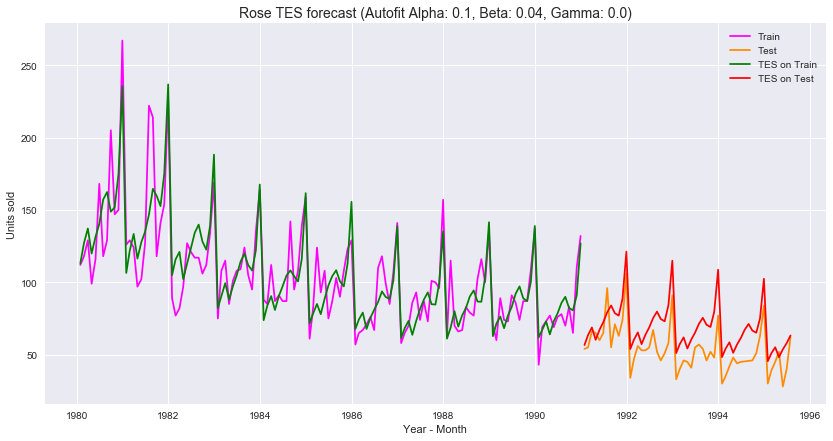

In [2814]:
plt.plot(TES_train['Rose'], label='Train', color = 'magenta')
plt.plot(TES_test['Rose'], label='Test', color = 'darkorange')

plt.plot(TES_train['predict_rose',alpha,beta,gamma], color = 'green', label='TES on Train')
plt.plot(TES_test['predict_rose',alpha,beta,gamma], color='red', label='TES on Test')

plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Rose TES forecast (Autofit Alpha: 0.1, Beta: 0.04, Gamma: 0.0)', fontsize=14)

plt.legend(loc='best')

In [2815]:
rmse_rose_model7_train = metrics.mean_squared_error(TES_train['Rose'],TES_train['predict_rose',alpha,beta,gamma],squared=False)
mape_rose_model7_train = MAPE(TES_train['Rose'],TES_train['predict_rose',alpha,beta,gamma])
        
rmse_rose_model7_test = metrics.mean_squared_error(TES_test['Rose'],TES_test['predict_rose',alpha,beta,gamma],squared=False)
mape_rose_model7_test = MAPE(TES_test['Rose'],TES_test['predict_rose',alpha,beta,gamma])
        
resultsDf_7_2 = resultsDf_7_2.append({'Alpha':alpha,'Beta':beta,'Gamma':gamma,'Train RMSE':rmse_rose_model7_train
                                      ,'Train MAPE': mape_rose_model7_train,'Test RMSE':rmse_rose_model7_test
                                      ,'Test MAPE': mape_rose_model7_test}, ignore_index=True)

In [2816]:
resultsDf_7_2.tail()

Alpha      Beta  Gamma    Train RMSE  Train MAPE     Test RMSE  \
996   1.000000  1.000000    0.7  30724.126331     4617.55  23029.955358   
997   1.000000  1.000000    0.8   1218.755446      493.75   9626.710890   
998   1.000000  1.000000    0.9  14150.253251     2303.41   9691.905408   
999   1.000000  1.000000    1.0   1768.254189      614.79   8138.618610   
1000  0.106096  0.048439    0.0     18.578860       13.21     17.369210   

      Test MAPE  
996    11836.01  
997     8580.97  
998     7916.16  
999     6811.03  
1000      28.88

In [2817]:
resultsDf_7_2.sort_values(by=['Test RMSE']).head()

Alpha  Beta  Gamma  Train RMSE  Train MAPE  Test RMSE  Test MAPE
11     0.1   0.2    0.2   24.365597       15.36   9.640616      13.96
12     0.1   0.2    0.3   23.969166       15.13   9.935672      14.21
10     0.1   0.2    0.1   25.529854       16.06   9.943512      14.39
142    0.2   0.5    0.3   27.631767       17.87  10.026322      14.34
151    0.2   0.6    0.2   28.289836       18.09  10.031754      13.62

In [2818]:
resultsDf_7_2.sort_values(by=['Test MAPE']).head()

Alpha  Beta  Gamma  Train RMSE  Train MAPE  Test RMSE  Test MAPE
151    0.2   0.6    0.2   28.289836       18.09  10.031754      13.62
223    0.3   0.3    0.4   24.209084       16.78  10.169735      13.67
11     0.1   0.2    0.2   24.365597       15.36   9.640616      13.96
214    0.3   0.2    0.5   24.580627       16.87  10.413323      14.00
12     0.1   0.2    0.3   23.969166       15.13   9.935672      14.21

### Model Evaluation

In [2819]:
resultsDf_7_sp = pd.DataFrame({'Test RMSE': [resultsDf_7_1['Test RMSE'][301],resultsDf_7_1['Test RMSE'][1000]],
                              'Test MAPE': [resultsDf_7_1['Test MAPE'][301],resultsDf_7_1['Test MAPE'][1000]]}
                           ,index=['TES Alpha 0.4, Beta 0.1, Gamma 0.2','TES Alpha 0.15, Beta 0.00, Gamma 0.37'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_7_sp])
spark_resultsDf

Test RMSE  Test MAPE
RegressionOnTime                       1389.135175      50.15
NaiveModel                             3864.279352     152.87
SimpleAverage                          1275.081804      38.90
2 point TMA                             813.400684      19.70
4 point TMA                            1156.589694      35.96
6 point TMA                            1283.927428      43.86
9 point TMA                            1346.278315      46.86
SES Alpha 0.00                         1275.081823      38.90
DES Alpha 0.1,Beta 0.1                 1779.430000      67.23
DES Alpha 0.6,Beta 0.0                 3851.171500     152.07
TES Alpha 0.4, Beta 0.1, Gamma 0.2      312.211095      10.20
TES Alpha 0.15, Beta 0.00, Gamma 0.37   384.203001      11.94

In [2820]:
spark_resultsDf.sort_values(by=['Test RMSE'])

Test RMSE  Test MAPE
TES Alpha 0.4, Beta 0.1, Gamma 0.2      312.211095      10.20
TES Alpha 0.15, Beta 0.00, Gamma 0.37   384.203001      11.94
2 point TMA                             813.400684      19.70
4 point TMA                            1156.589694      35.96
SimpleAverage                          1275.081804      38.90
SES Alpha 0.00                         1275.081823      38.90
6 point TMA                            1283.927428      43.86
9 point TMA                            1346.278315      46.86
RegressionOnTime                       1389.135175      50.15
DES Alpha 0.1,Beta 0.1                 1779.430000      67.23
DES Alpha 0.6,Beta 0.0                 3851.171500     152.07
NaiveModel                             3864.279352     152.87

In [2821]:
resultsDf_7_ro = pd.DataFrame({'Test RMSE': [resultsDf_7_2['Test RMSE'][11],resultsDf_7_2['Test RMSE'][1000]],
                              'Test MAPE': [resultsDf_7_2['Test MAPE'][11],resultsDf_7_2['Test MAPE'][1000]]}
                           ,index=['TES Alpha 0.1, Beta 0.2, Gamma 0.2','TES Alpha 0.11, Beta 0.05, Gamma 0.00'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_7_ro])
rose_resultsDf

Test RMSE  Test MAPE
RegressionOnTime                       15.268885      22.82
NaiveModel                             79.718559     145.10
SimpleAverage                          53.460350      94.93
2 point TMA                            11.529278      13.54
4 point TMA                            14.451364      19.49
6 point TMA                            14.566269      20.82
9 point TMA                            14.727594      21.01
SES Alpha 0.01                         36.796019      63.88
DES Alpha 0.16, Beta 0.16              70.572197     120.25
DES Alpha 0.10, Beta 0.10              37.056912      64.02
TES Alpha 0.1, Beta 0.2, Gamma 0.2      9.640616      13.96
TES Alpha 0.11, Beta 0.05, Gamma 0.00  17.369210      28.88

In [2822]:
rose_resultsDf.sort_values(by=['Test RMSE'])

Test RMSE  Test MAPE
TES Alpha 0.1, Beta 0.2, Gamma 0.2      9.640616      13.96
2 point TMA                            11.529278      13.54
4 point TMA                            14.451364      19.49
6 point TMA                            14.566269      20.82
9 point TMA                            14.727594      21.01
RegressionOnTime                       15.268885      22.82
TES Alpha 0.11, Beta 0.05, Gamma 0.00  17.369210      28.88
SES Alpha 0.01                         36.796019      63.88
DES Alpha 0.10, Beta 0.10              37.056912      64.02
SimpleAverage                          53.460350      94.93
DES Alpha 0.16, Beta 0.16              70.572197     120.25
NaiveModel                             79.718559     145.10

# Plot all above models

Text(0.5, 1.0, 'SPARKLING : Forecast Vs Actual Test set')

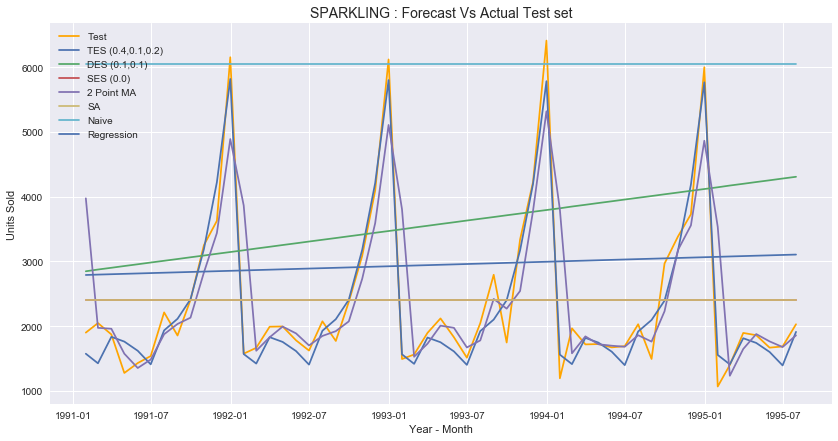

In [2823]:
#plt.figure(figsize=(20,12))

#plt.plot(TES_train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(TES_test['Sparkling'], label='Test', color = 'orange')
#TES
#plt.plot(TES_train['predict_spark',0.4,0.1,0.2], label='TES on Train')
#DES
#plt.plot(DES_train['predict_spark',0.1,0.1], label='DES on Train')
#SES
#plt.plot(SES_train['predict_spark'], label='SES on Train')
#MA
#plt.plot(trailing_MovingAverage_train['Spark_Trailing_2'], label='2 Point MA on Train')
#SA
#plt.plot(SimpleAverage_train['spark_mean_forecast'], label='SA on Train')
#Naive
#plt.plot(NaiveModel_train['spark_naive'], label='Naive on Train')
#Regression
#plt.plot(LinearRegression_train['RegOnTime_spark'], label='Regression on Train')

#TES
plt.plot(TES_test['predict_spark',0.4,0.1,0.2],  label='TES (0.4,0.1,0.2)')
#DES
plt.plot(DES_test['predict_spark',0.1,0.1],  label='DES (0.1,0.1)')
#SES
plt.plot(SES_test['predict_spark'],  label='SES (0.0)')
#MA
plt.plot(trailing_MovingAverage_test['Spark_Trailing_2'],  label='2 Point MA')
#SA
plt.plot(SimpleAverage_test['spark_mean_forecast'], label='SA')
#Naive
plt.plot(NaiveModel_test['spark_naive'], label='Naive')
#Regression
plt.plot(LinearRegression_test['RegOnTime_spark'], label='Regression')

plt.legend(loc='upper left')
plt.xlabel('Year - Month')
plt.ylabel('Units Sold')
plt.title('SPARKLING : Forecast Vs Actual Test set', fontsize=14)


Text(0.5, 1.0, 'ROSE : Forecast Vs Actual Test Data')

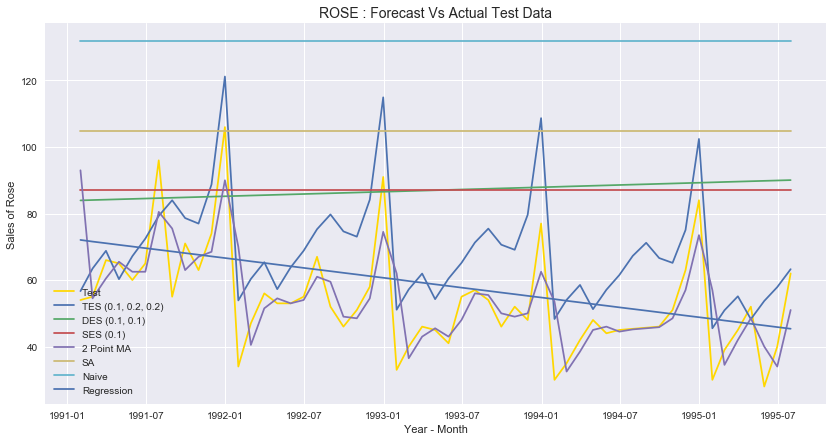

In [2824]:
#plt.figure(figsize=(20,12))

#plt.plot(TES_train['Rose'], label='Train', color = 'magenta')
plt.plot(TES_test['Rose'], label='Test', color = 'gold')
#TES
#plt.plot(TES_train['predict_rose',alpha_7_2,beta_7_2,gamma_7_2], label='TES on Train')
#DES
#plt.plot(DES_train['predict_rose',0.1,0.1], label='DES on Train')
#SES
#plt.plot(SES_train['predict_rose'], label='SES on Train')
#MA
#plt.plot(trailing_MovingAverage_train['Rose_Trailing_2'], label='2 Point MA on Train')
#SA
#plt.plot(SimpleAverage_train['rose_mean_forecast'], label='SA on Train')
#Naive
#plt.plot(NaiveModel_train['rose_naive'], label='Naive on Train')
#Regression
#plt.plot(LinearRegression_train['RegOnTime_rose'], label='Regression on Train')

#TES
plt.plot(TES_test['predict_rose',alpha_7_2,beta_7_2,gamma_7_2],  label='TES (0.1, 0.2, 0.2)')
#DES
plt.plot(DES_test['predict_rose',0.1,0.1],  label='DES (0.1, 0.1)')
#SES
plt.plot(SES_test['predict_rose'],  label='SES (0.1)')
#MA
plt.plot(trailing_MovingAverage_test['Rose_Trailing_2'],  label='2 Point MA')
#SA
plt.plot(SimpleAverage_test['rose_mean_forecast'], label='SA')
#Naive
plt.plot(NaiveModel_test['rose_naive'], label='Naive')
#Regression
plt.plot(LinearRegression_test['RegOnTime_rose'], label='Regression')

plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Sales of Rose')
plt.title('ROSE : Forecast Vs Actual Test Data', fontsize=14)


# ARIMA Models

## Check for stationarity of the whole Time Series data.

In [2825]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, color):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color=color,label='Observed')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

### Sparkling

Original series

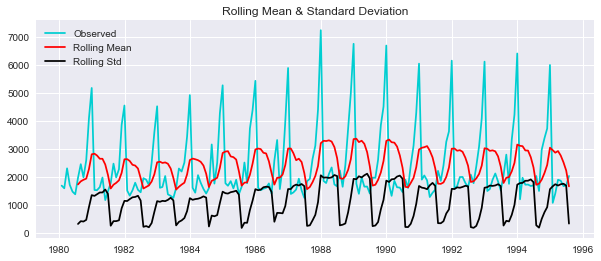

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [2826]:
plt.figure(figsize=(10,4))
test_stationarity(df['Sparkling'],'darkturquoise')

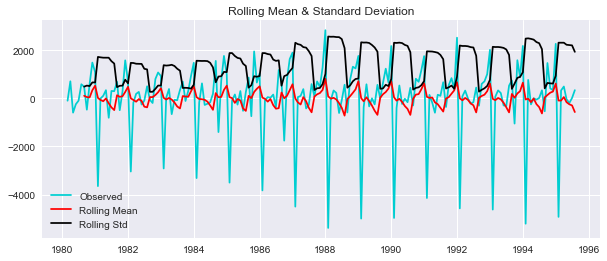

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [2827]:
plt.figure(figsize=(10,4))
test_stationarity(df['Sparkling'].diff().dropna(),'darkturquoise')

We see that at 5% significant level the Time Series is non-stationary. But the seasonality is multiplicative as the Std deviation and mean varies according to the change in trend

Let us take a difference of order 1 and check whether the Time Series is stationary or not.

Difference of original series

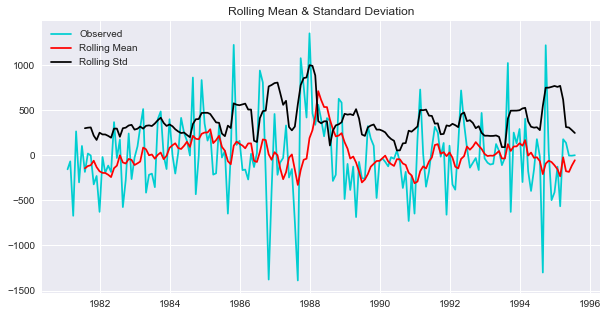

Results of Dickey-Fuller Test:
Test Statistic                  -4.460165
p-value                          0.000232
#Lags Used                      11.000000
Number of Observations Used    163.000000
Critical Value (1%)             -3.471119
Critical Value (5%)             -2.879441
Critical Value (10%)            -2.576314
dtype: float64 



In [2828]:
plt.figure(figsize=(10,5))
test_stationarity(df['Sparkling'].diff(12).dropna(), 'darkturquoise')

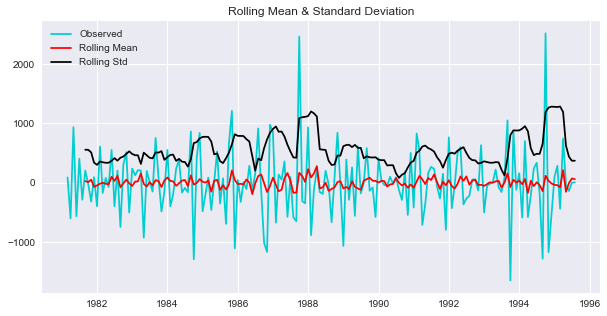

Results of Dickey-Fuller Test:
Test Statistic                  -5.113533
p-value                          0.000013
#Lags Used                      11.000000
Number of Observations Used    162.000000
Critical Value (1%)             -3.471374
Critical Value (5%)             -2.879552
Critical Value (10%)            -2.576373
dtype: float64 



In [2829]:
plt.figure(figsize=(10,5))
test_stationarity((df['Sparkling'].diff(12).dropna()).diff().dropna(), 'darkturquoise')

We see that at $\alpha$ = 0.05 the Time Series is indeed stationary. But seasonality is multiplicative

Log of series

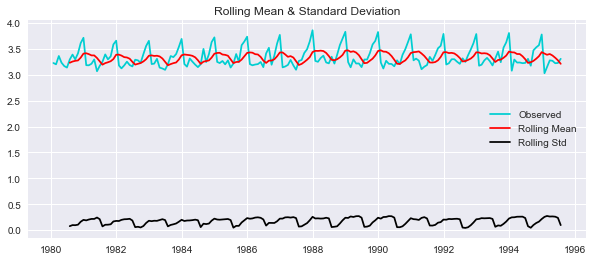

Results of Dickey-Fuller Test:
Test Statistic                  -1.749630
p-value                          0.405740
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [2830]:
plt.figure(figsize=(10,4))
test_stationarity(np.log10(df['Sparkling']), 'darkturquoise')

Seasonality is now additive but non stationary

Difference of log of series

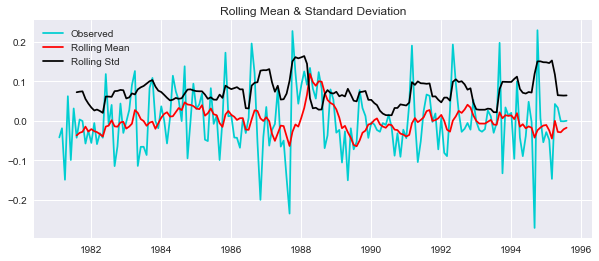

Results of Dickey-Fuller Test:
Test Statistic                  -5.183811
p-value                          0.000009
#Lags Used                      11.000000
Number of Observations Used    163.000000
Critical Value (1%)             -3.471119
Critical Value (5%)             -2.879441
Critical Value (10%)            -2.576314
dtype: float64 



In [2831]:
plt.figure(figsize=(10,4))
test_stationarity(np.log10(df['Sparkling']).diff(12).dropna(),  'darkturquoise')

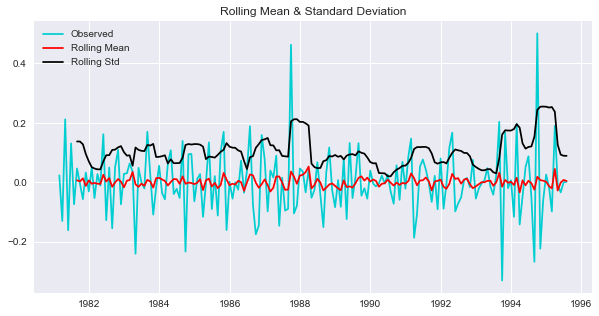

Results of Dickey-Fuller Test:
Test Statistic                  -5.254601
p-value                          0.000007
#Lags Used                      12.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64 



In [2832]:
plt.figure(figsize=(10,5))
test_stationarity((np.log10(df['Sparkling']).diff(12).dropna()).diff().dropna(),  'darkturquoise')

### Rose

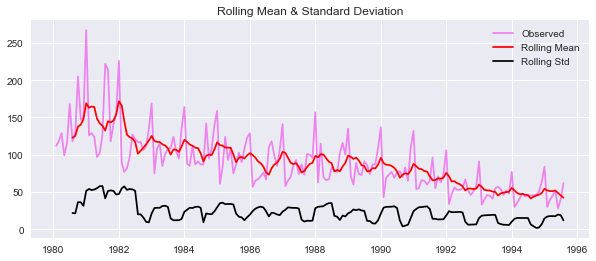

Results of Dickey-Fuller Test:
Test Statistic                  -1.876719
p-value                          0.343091
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [2833]:
plt.figure(figsize=(10,4))
test_stationarity(df['Rose'], 'violet')

We see that at 5% significant level the Time Series is non-stationary.

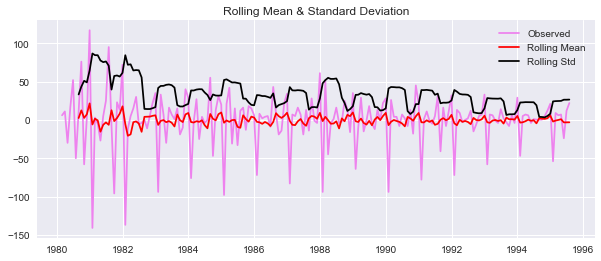

Results of Dickey-Fuller Test:
Test Statistic                -8.044395e+00
p-value                        1.810868e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [2834]:
plt.figure(figsize=(10,4))
test_stationarity(df['Rose'].diff().dropna(), 'violet')

At difference of order 1, Rose Time Series is stationary with no trend. Got visible seasoality (additive or mutiplicative?)

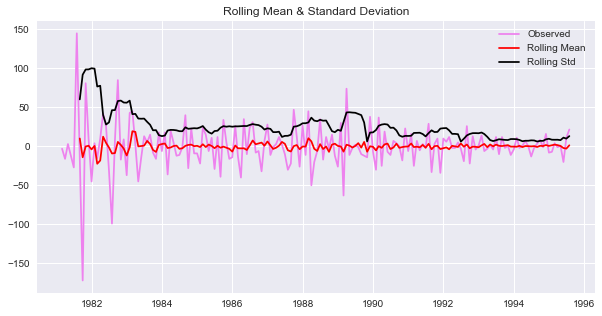

Results of Dickey-Fuller Test:
Test Statistic                  -4.605732
p-value                          0.000126
#Lags Used                      11.000000
Number of Observations Used    162.000000
Critical Value (1%)             -3.471374
Critical Value (5%)             -2.879552
Critical Value (10%)            -2.576373
dtype: float64 



In [2835]:
plt.figure(figsize=(10,5))
test_stationarity((df['Rose'].diff(12).dropna()).diff().dropna(), 'violet')

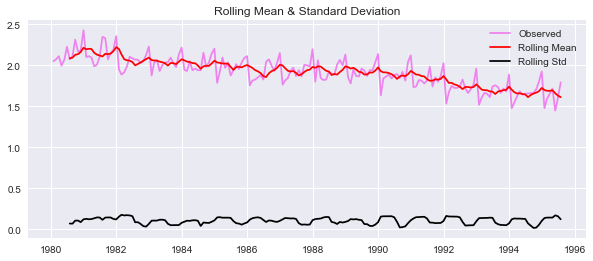

Results of Dickey-Fuller Test:
Test Statistic                  -0.422555
p-value                          0.906264
#Lags Used                      12.000000
Number of Observations Used    174.000000
Critical Value (1%)             -3.468502
Critical Value (5%)             -2.878298
Critical Value (10%)            -2.575704
dtype: float64 



In [2836]:
plt.figure(figsize=(10,4))
test_stationarity(np.log10(df['Rose']), 'violet')

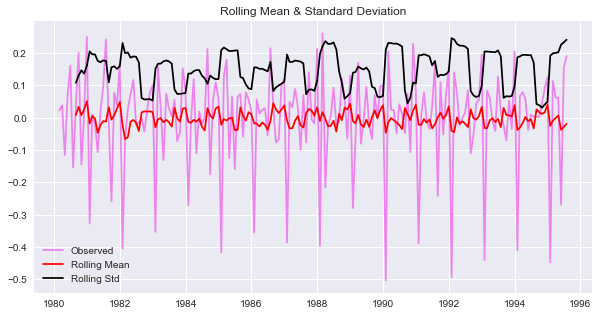

Results of Dickey-Fuller Test:
Test Statistic                -8.669696e+00
p-value                        4.581847e-14
#Lags Used                     1.100000e+01
Number of Observations Used    1.740000e+02
Critical Value (1%)           -3.468502e+00
Critical Value (5%)           -2.878298e+00
Critical Value (10%)          -2.575704e+00
dtype: float64 



In [2837]:
plt.figure(figsize=(10,5))
test_stationarity(np.log10(df['Rose']).diff().dropna(), 'violet')

## Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

In [2838]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

### Sparkling

ACF Plots

<Figure size 720x360 with 0 Axes>

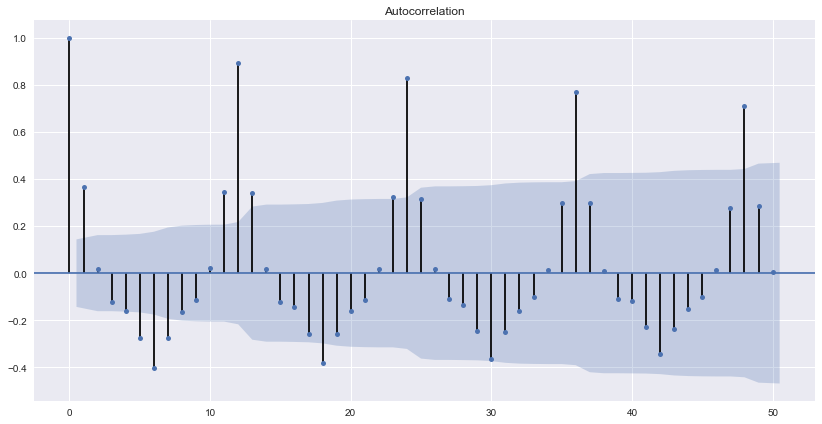

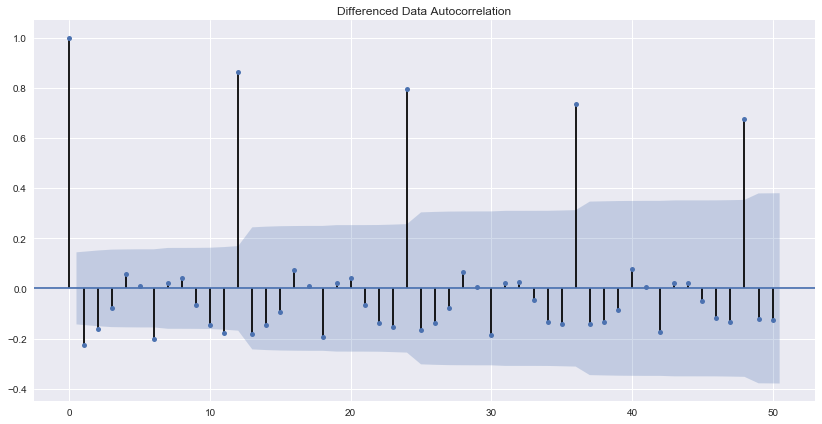

In [2839]:
plt.figure(figsize=(10,5))
plot_acf(df['Sparkling'],lags=50)
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show();

PACF Plots

<Figure size 720x360 with 0 Axes>

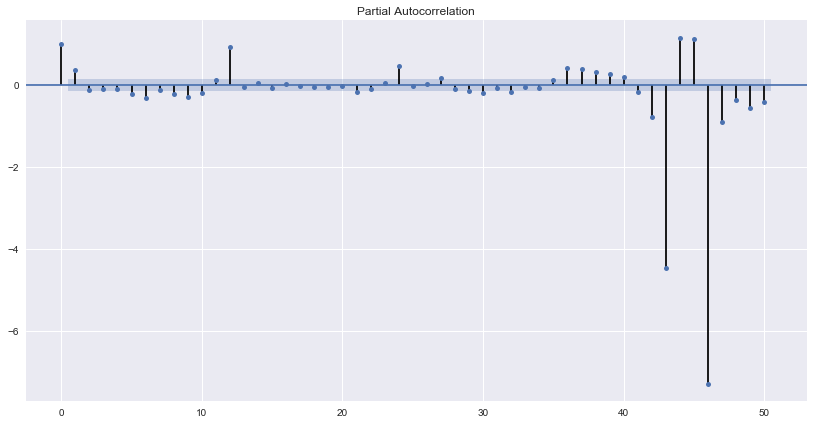

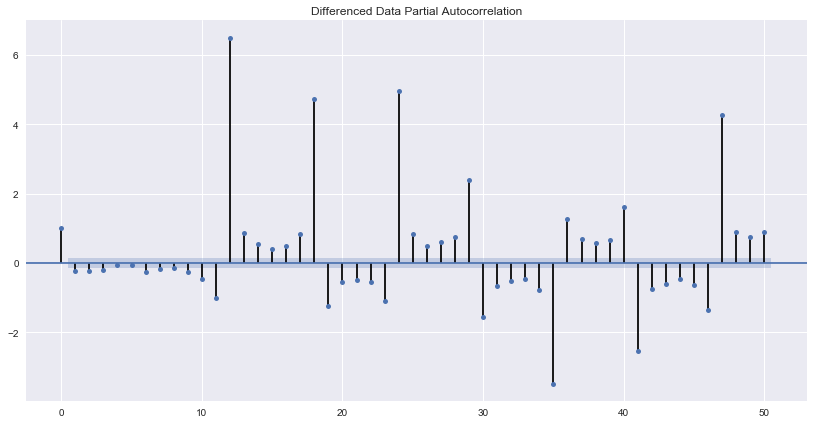

In [2840]:
plt.figure(figsize=(10,5))
plot_pacf(df['Sparkling'],lags=50)
plot_pacf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

From the above plots, we can say that there seems to be a seasonality in the data. 

### Rose

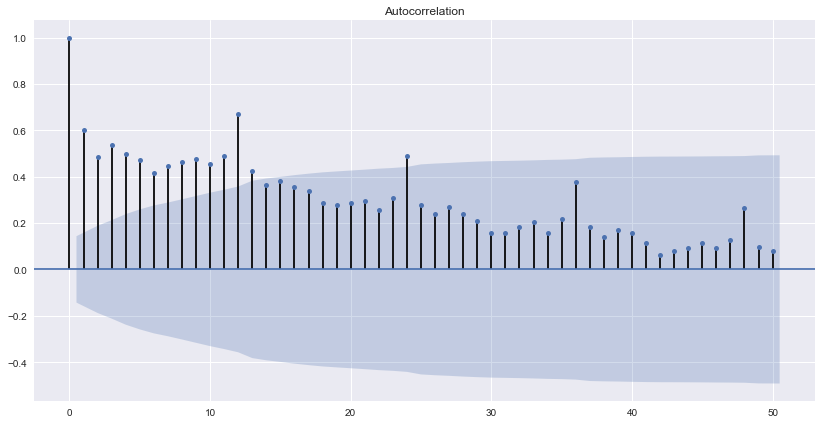

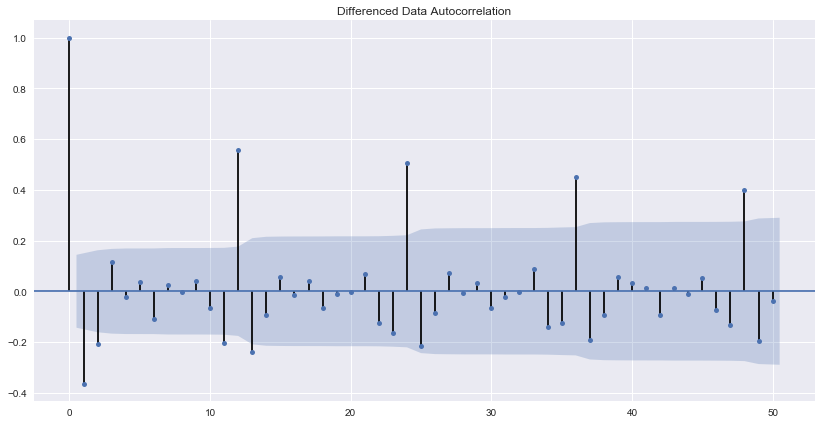

In [2841]:
plot_acf(df['Rose'],lags=50)
plot_acf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show();

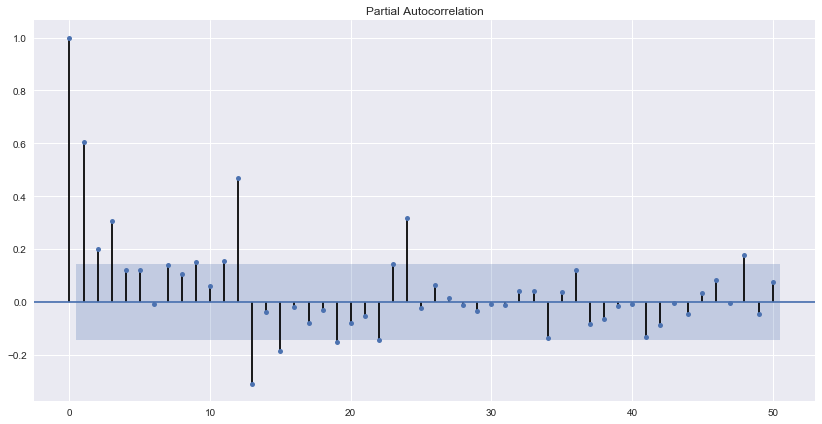

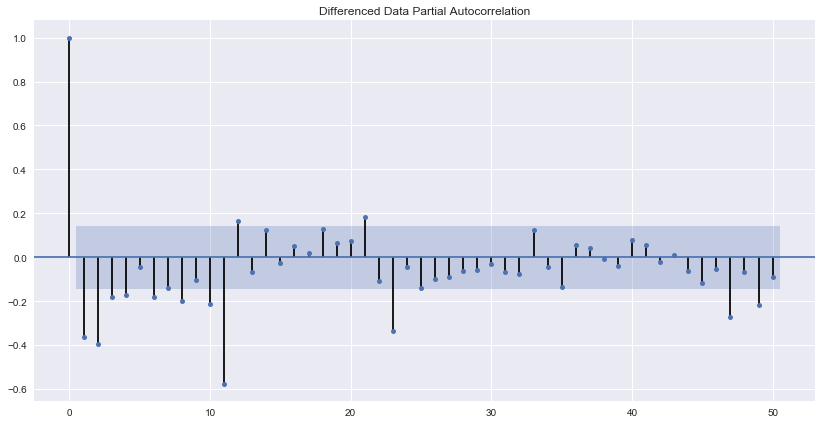

In [2842]:
plot_pacf(df['Rose'],lags=50)
plot_pacf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

## Model 8: SARIMA - SPARKLING

In [2843]:
SARIMA_train = train.copy()
SARIMA_test = test.copy()

### Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

### AUTO SARIMA on original data

In [2844]:
import itertools
p = q = range(0,4)
d= range(1,2)
D = range(1,2)
#p = q = range(0,1)
#d= range(0,1)
#D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 1, 1, 12)
Model: (0, 1, 2)(0, 1, 2, 12)
Model: (0, 1, 3)(0, 1, 3, 12)
Model: (1, 1, 0)(1, 1, 0, 12)
Model: (1, 1, 1)(1, 1, 1, 12)
Model: (1, 1, 2)(1, 1, 2, 12)
Model: (1, 1, 3)(1, 1, 3, 12)
Model: (2, 1, 0)(2, 1, 0, 12)
Model: (2, 1, 1)(2, 1, 1, 12)
Model: (2, 1, 2)(2, 1, 2, 12)
Model: (2, 1, 3)(2, 1, 3, 12)
Model: (3, 1, 0)(3, 1, 0, 12)
Model: (3, 1, 1)(3, 1, 1, 12)
Model: (3, 1, 2)(3, 1, 2, 12)
Model: (3, 1, 3)(3, 1, 3, 12)


In [2845]:
SARIMA_AIC_spark = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC_spark

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [2846]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model_spark = sm.tsa.statespace.SARIMAX(SARIMA_train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA_spark = SARIMA_model_spark.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA_spark.aic))
        SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 1, 0, 12)7 - AIC:1822.982485206384
SARIMA(0, 1, 0)x(0, 1, 1, 12)7 - AIC:1626.862633467892
SARIMA(0, 1, 0)x(0, 1, 2, 12)7 - AIC:1452.6773574257763
SARIMA(0, 1, 0)x(0, 1, 3, 12)7 - AIC:5909.909959140716
SARIMA(0, 1, 0)x(1, 1, 0, 12)7 - AIC:1646.3778167661442
SARIMA(0, 1, 0)x(1, 1, 1, 12)7 - AIC:1628.324390818906
SARIMA(0, 1, 0)x(1, 1, 2, 12)7 - AIC:1454.5289621307575
SARIMA(0, 1, 0)x(1, 1, 3, 12)7 - AIC:nan
SARIMA(0, 1, 0)x(2, 1, 0, 12)7 - AIC:1466.6211360755017
SARIMA(0, 1, 0)x(2, 1, 1, 12)7 - AIC:1468.500098186659
SARIMA(0, 1, 0)x(2, 1, 2, 12)7 - AIC:1455.991155368576
SARIMA(0, 1, 0)x(2, 1, 3, 12)7 - AIC:nan
SARIMA(0, 1, 0)x(3, 1, 0, 12)7 - AIC:1289.239819743992
SARIMA(0, 1, 0)x(3, 1, 1, 12)7 - AIC:1291.2448875094294
SARIMA(0, 1, 0)x(3, 1, 2, 12)7 - AIC:1288.607038030628
SARIMA(0, 1, 0)x(3, 1, 3, 12)7 - AIC:2789.445901183624
SARIMA(0, 1, 1)x(0, 1, 0, 12)7 - AIC:1760.6565719828561
SARIMA(0, 1, 1)x(0, 1, 1, 12)7 - AIC:1569.6639234230047
SARIMA(0, 1, 1)x(0, 1, 2, 12)7 

SARIMA(2, 1, 1)x(2, 1, 1, 12)7 - AIC:1401.992473547558
SARIMA(2, 1, 1)x(2, 1, 2, 12)7 - AIC:1403.818345646927
SARIMA(2, 1, 1)x(2, 1, 3, 12)7 - AIC:nan
SARIMA(2, 1, 1)x(3, 1, 0, 12)7 - AIC:1228.3132766082836
SARIMA(2, 1, 1)x(3, 1, 1, 12)7 - AIC:1230.1483342058261
SARIMA(2, 1, 1)x(3, 1, 2, 12)7 - AIC:1230.7597823057097
SARIMA(2, 1, 1)x(3, 1, 3, 12)7 - AIC:3027.6064673408187
SARIMA(2, 1, 2)x(0, 1, 0, 12)7 - AIC:1742.2930708182369
SARIMA(2, 1, 2)x(0, 1, 1, 12)7 - AIC:1556.946732412365
SARIMA(2, 1, 2)x(0, 1, 2, 12)7 - AIC:1384.3176180645044
SARIMA(2, 1, 2)x(0, 1, 3, 12)7 - AIC:5837.33860652413
SARIMA(2, 1, 2)x(1, 1, 0, 12)7 - AIC:1573.1168644412712
SARIMA(2, 1, 2)x(1, 1, 1, 12)7 - AIC:1558.1200892464312
SARIMA(2, 1, 2)x(1, 1, 2, 12)7 - AIC:1386.0972419958302
SARIMA(2, 1, 2)x(1, 1, 3, 12)7 - AIC:nan
SARIMA(2, 1, 2)x(2, 1, 0, 12)7 - AIC:1399.775633999286
SARIMA(2, 1, 2)x(2, 1, 1, 12)7 - AIC:1401.1832161215095
SARIMA(2, 1, 2)x(2, 1, 2, 12)7 - AIC:1387.6277846200571
SARIMA(2, 1, 2)x(2, 1, 3, 12

In [2847]:
SARIMA_AIC_spark.sort_values(by=['AIC']).head()

param       seasonal          AIC
252  (3, 1, 3)  (3, 1, 0, 12)  1213.282561
253  (3, 1, 3)  (3, 1, 1, 12)  1215.213337
220  (3, 1, 1)  (3, 1, 0, 12)  1215.898777
254  (3, 1, 3)  (3, 1, 2, 12)  1216.479994
236  (3, 1, 2)  (3, 1, 0, 12)  1216.859179

In [2848]:
auto_SARIMA_spark = sm.tsa.statespace.SARIMAX(SARIMA_train['Sparkling'].values,
                                order=(3, 1, 3),
                                seasonal_order=(3, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_spark = auto_SARIMA_spark.fit(maxiter=1000)
print(results_auto_SARIMA_spark.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 1, 3)x(3, 1, 0, 12)   Log Likelihood                -596.641
Date:                            Sun, 13 Sep 2020   AIC                           1213.283
Time:                                    19:55:24   BIC                           1237.103
Sample:                                         0   HQIC                          1222.833
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6142      0.176     -9.177      0.000      -1.959      -1.269
ar.L2         -0.6124      0.299   

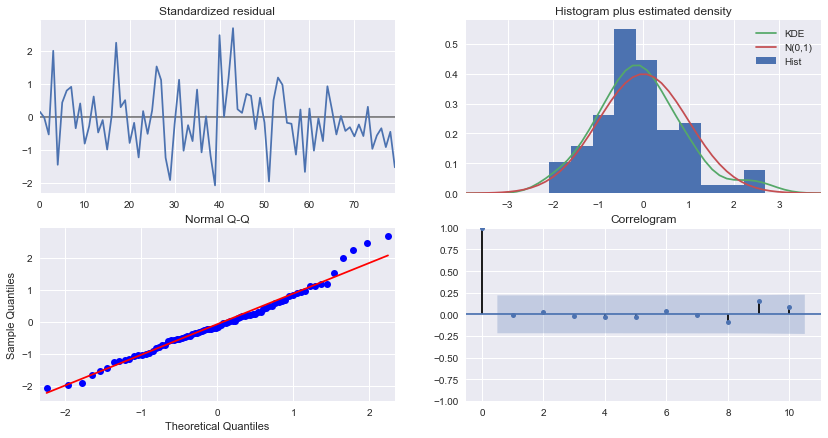

In [2849]:
results_auto_SARIMA_spark.plot_diagnostics()
plt.show()

In [2850]:
SARIMA_test.head()

Sparkling  Rose
YearMonth                  
1991-01-31       1902  54.0
1991-02-28       2049  55.0
1991-03-31       1874  66.0
1991-04-30       1279  65.0
1991-05-31       1432  60.0

In [2851]:
#pred_dynamic = results_auto_SARIMA_spark.get_prediction(start=pd.to_datetime('1991-01-01'), dynamic=True, full_results=True)
pred_dynamic = results_auto_SARIMA_spark.get_prediction(dynamic=True, full_results=True)

In [2852]:
pred_dynamic_ci = pred_dynamic.conf_int()
predicted_auto_SARIMA_spark = results_auto_SARIMA_spark.get_forecast(steps=len(SARIMA_test['Sparkling']), alpha=0.05)


In [2853]:
predicted_auto_SARIMA_spark.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1431.064349  431.173374     585.980066    2276.148633
1  1540.640563  458.316609     642.356516    2438.924610
2  1707.781979  460.094877     806.012590    2609.551369
3  1859.127693  466.658022     944.494778    2773.760609
4  1501.874687  466.960559     586.648808    2417.100566

In [2854]:
# Extract the predicted and true values of our time series
spark_forecasted = pred_dynamic.predicted_mean
SARIMA_test['spark_forecasted'] = predicted_auto_SARIMA_spark.predicted_mean
SARIMA_test.head()

Sparkling  Rose  spark_forecasted
YearMonth                                    
1991-01-31       1902  54.0       1431.064349
1991-02-28       2049  55.0       1540.640563
1991-03-31       1874  66.0       1707.781979
1991-04-30       1279  65.0       1859.127693
1991-05-31       1432  60.0       1501.874687

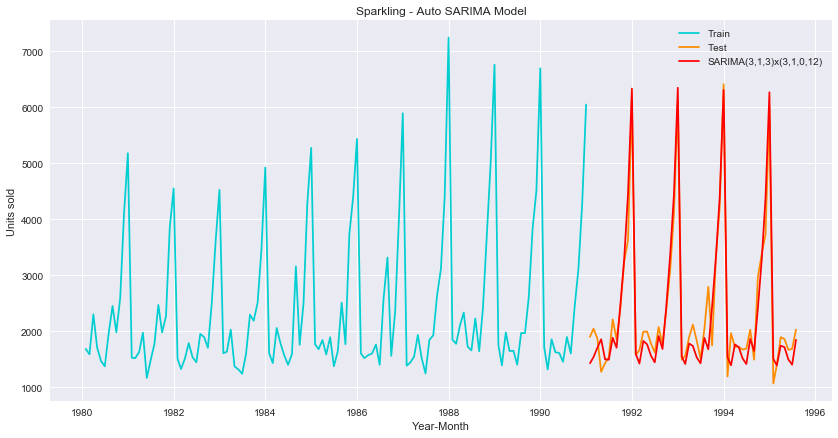

In [2855]:
plt.plot(train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(test['Sparkling'], label='Test', color = 'darkorange')

plt.plot(SARIMA_test['spark_forecasted'], color='red', label='SARIMA(3,1,3)x(3,1,0,12)')
plt.xlabel('Year-Month')
plt.ylabel('Units sold')
plt.title('Sparkling - Auto SARIMA Model')
plt.legend(loc='best')

In [2856]:
rmse_spark_model8_test = metrics.mean_squared_error(test['Sparkling'],SARIMA_test['spark_forecasted'],squared=False)
mape_spark_model8_test = MAPE(test['Sparkling'],SARIMA_test['spark_forecasted'])
print("For SARIMA forecast on the Sparkling Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model8_test, mape_spark_model8_test))

For SARIMA forecast on the Sparkling Testing Data:  RMSE is 331.615 and MAPE is 10.33


In [2857]:
resultsDf_8_spark1 = pd.DataFrame({'Test RMSE': [rmse_spark_model8_test],'Test MAPE': [mape_spark_model8_test]},index=['Auto SARIMA(3,1,3)x(3,1,0,12)'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_8_spark1])
spark_resultsDf

Test RMSE  Test MAPE
RegressionOnTime                       1389.135175      50.15
NaiveModel                             3864.279352     152.87
SimpleAverage                          1275.081804      38.90
2 point TMA                             813.400684      19.70
4 point TMA                            1156.589694      35.96
6 point TMA                            1283.927428      43.86
9 point TMA                            1346.278315      46.86
SES Alpha 0.00                         1275.081823      38.90
DES Alpha 0.1,Beta 0.1                 1779.430000      67.23
DES Alpha 0.6,Beta 0.0                 3851.171500     152.07
TES Alpha 0.4, Beta 0.1, Gamma 0.2      312.211095      10.20
TES Alpha 0.15, Beta 0.00, Gamma 0.37   384.203001      11.94
Auto SARIMA(3,1,3)x(3,1,0,12)           331.614531      10.33

### AUTO SARIMA on Log(Sparkling)

In [2858]:
spark_log_train = np.log10(SARIMA_train['Sparkling'])

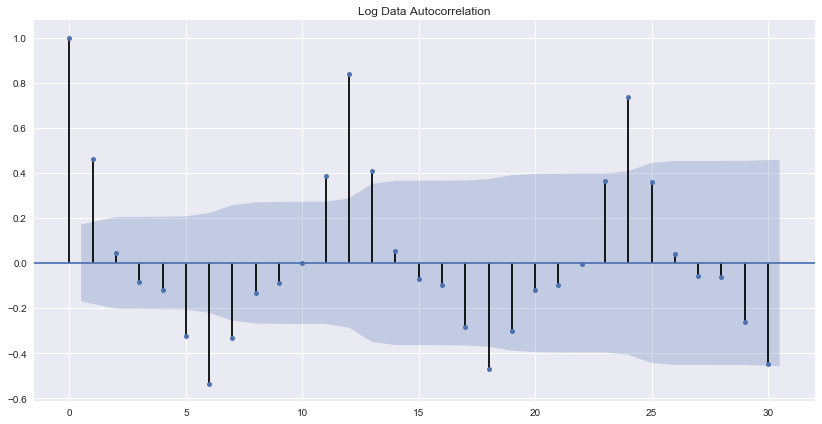

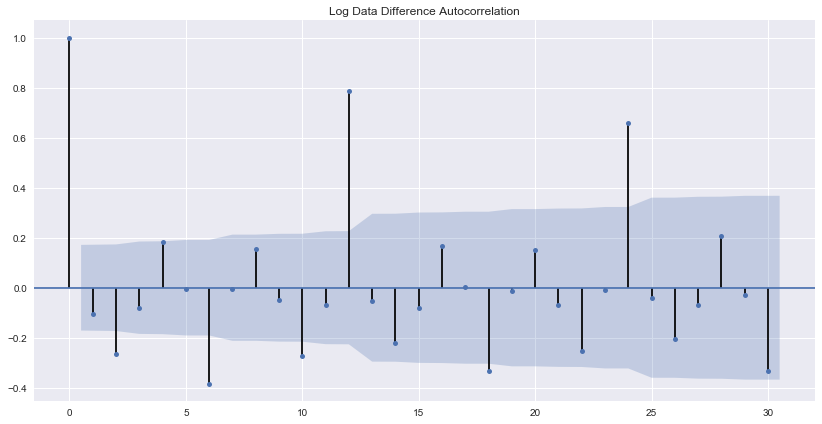

In [2859]:
plot_acf(spark_log_train,lags=30,title='Log Data Autocorrelation')
plot_acf(spark_log_train.diff().dropna(),lags=30,title='Log Data Difference Autocorrelation')
plt.show()

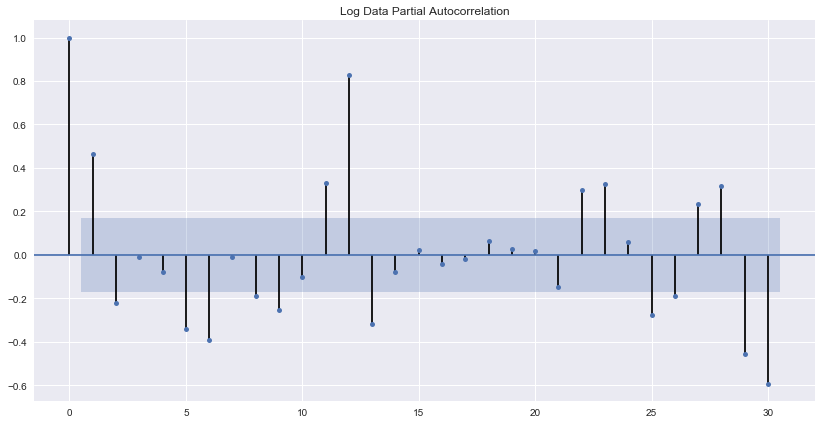

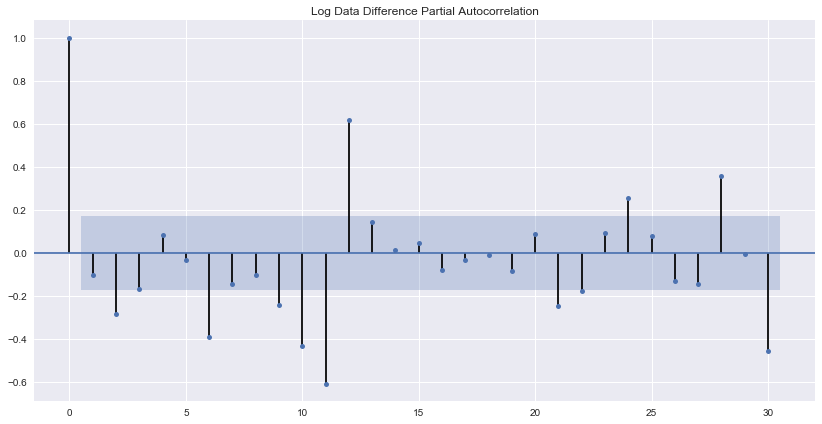

In [2860]:
plot_pacf(spark_log_train,lags=30,title='Log Data Partial Autocorrelation')
plot_pacf(spark_log_train.diff().dropna(),lags=30,title='Log Data Difference Partial Autocorrelation')
plt.show()

We see that there can be a seasonality of 12. We will run our auto SARIMA models by setting seasonality as 12.

In [2861]:
import itertools
p = q = range(0, 3) 
d= range(1,2)
D = range(0,2)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(0, 1, 0, 12)
Model: (1, 1, 1)(0, 1, 1, 12)
Model: (1, 1, 2)(0, 1, 2, 12)
Model: (2, 1, 0)(1, 0, 0, 12)
Model: (2, 1, 1)(1, 0, 1, 12)
Model: (2, 1, 2)(1, 0, 2, 12)


In [2862]:
SARIMA_AIC_spark_log = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC_spark_log

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [2863]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model_spark_log = sm.tsa.statespace.SARIMAX(spark_log_train,#train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA_spark_log = SARIMA_model_spark_log.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA_spark_log.aic))
        SARIMA_AIC_spark_log = SARIMA_AIC_spark_log.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark_log.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12)7 - AIC:-57.223163262272415
SARIMA(0, 1, 0)x(0, 0, 1, 12)7 - AIC:-122.81829469978436
SARIMA(0, 1, 0)x(0, 0, 2, 12)7 - AIC:-137.0730421959754
SARIMA(0, 1, 0)x(0, 1, 0, 12)7 - AIC:-209.9106438787882
SARIMA(0, 1, 0)x(0, 1, 1, 12)7 - AIC:-205.2104085493133
SARIMA(0, 1, 0)x(0, 1, 2, 12)7 - AIC:-175.11378258640167
SARIMA(0, 1, 0)x(1, 0, 0, 12)7 - AIC:-217.95527788239673
SARIMA(0, 1, 0)x(1, 0, 1, 12)7 - AIC:-225.19047181923167
SARIMA(0, 1, 0)x(1, 0, 2, 12)7 - AIC:-197.41328523312768
SARIMA(0, 1, 0)x(1, 1, 0, 12)7 - AIC:-200.40913573337485
SARIMA(0, 1, 0)x(1, 1, 1, 12)7 - AIC:-196.6757609851614
SARIMA(0, 1, 0)x(1, 1, 2, 12)7 - AIC:-173.28892545765547
SARIMA(0, 1, 0)x(2, 0, 0, 12)7 - AIC:-201.1549172222055
SARIMA(0, 1, 0)x(2, 0, 1, 12)7 - AIC:-199.30580305756328
SARIMA(0, 1, 0)x(2, 0, 2, 12)7 - AIC:-198.59900322284315
SARIMA(0, 1, 0)x(2, 1, 0, 12)7 - AIC:-177.22797545022073
SARIMA(0, 1, 0)x(2, 1, 1, 12)7 - AIC:-175.2356671234797
SARIMA(0, 1, 0)x(2, 1, 2, 12)7 - AIC:

SARIMA(2, 1, 2)x(0, 0, 0, 12)7 - AIC:-96.13368017244761
SARIMA(2, 1, 2)x(0, 0, 1, 12)7 - AIC:-150.71504743041442
SARIMA(2, 1, 2)x(0, 0, 2, 12)7 - AIC:-161.94168141864805
SARIMA(2, 1, 2)x(0, 1, 0, 12)7 - AIC:-258.6037388670085
SARIMA(2, 1, 2)x(0, 1, 1, 12)7 - AIC:-246.59666012547683
SARIMA(2, 1, 2)x(0, 1, 2, 12)7 - AIC:-215.89805680401327
SARIMA(2, 1, 2)x(1, 0, 0, 12)7 - AIC:-261.30874540962037
SARIMA(2, 1, 2)x(1, 0, 1, 12)7 - AIC:-277.8803228954343
SARIMA(2, 1, 2)x(1, 0, 2, 12)7 - AIC:-239.40945414379675
SARIMA(2, 1, 2)x(1, 1, 0, 12)7 - AIC:-239.33412095602762
SARIMA(2, 1, 2)x(1, 1, 1, 12)7 - AIC:-240.34985430809672
SARIMA(2, 1, 2)x(1, 1, 2, 12)7 - AIC:-214.22803687049228
SARIMA(2, 1, 2)x(2, 0, 0, 12)7 - AIC:-236.96031813914058
SARIMA(2, 1, 2)x(2, 0, 1, 12)7 - AIC:-241.57239444343628
SARIMA(2, 1, 2)x(2, 0, 2, 12)7 - AIC:-238.10203102791513
SARIMA(2, 1, 2)x(2, 1, 0, 12)7 - AIC:-211.45848981981393
SARIMA(2, 1, 2)x(2, 1, 1, 12)7 - AIC:-209.4938298541645
SARIMA(2, 1, 2)x(2, 1, 2, 12)7 - AI

In [2864]:
SARIMA_AIC_spark_log.sort_values(by=['AIC']).head()

param       seasonal         AIC
25   (0, 1, 1)  (1, 0, 1, 12) -284.472032
79   (1, 1, 1)  (1, 0, 1, 12) -282.517334
43   (0, 1, 2)  (1, 0, 1, 12) -281.567994
97   (1, 1, 2)  (1, 0, 1, 12) -279.611724
133  (2, 1, 1)  (1, 0, 1, 12) -278.288230

In [2865]:
import statsmodels.api as sm

auto_SARIMA_spark_log = sm.tsa.statespace.SARIMAX(spark_log_train,
                                order=(0, 1, 1),
                                seasonal_order=(1, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_spark_log = auto_SARIMA_spark_log.fit(maxiter=1000)
print(results_auto_SARIMA_spark_log.summary())

                                 Statespace Model Results                                 
Dep. Variable:                          Sparkling   No. Observations:                  132
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                 146.236
Date:                            Sun, 13 Sep 2020   AIC                           -284.472
Time:                                    19:57:43   BIC                           -273.423
Sample:                                01-31-1980   HQIC                          -279.986
                                     - 12-31-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8966      0.045    -19.862      0.000      -0.985      -0.808
ar.S.L12       1.0112      0.020   

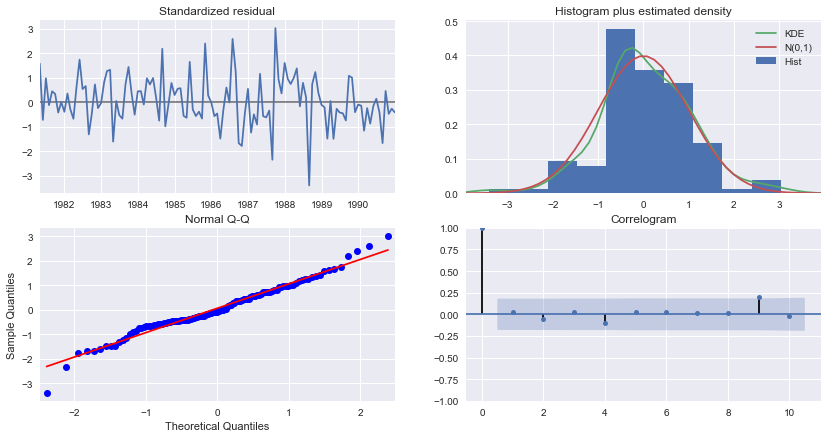

In [2866]:
results_auto_SARIMA_spark_log.plot_diagnostics()
plt.show()

### Predict on the Test Set using this model

In [2867]:
SARIMA_test.head()

Sparkling  Rose  spark_forecasted
YearMonth                                    
1991-01-31       1902  54.0       1431.064349
1991-02-28       2049  55.0       1540.640563
1991-03-31       1874  66.0       1707.781979
1991-04-30       1279  65.0       1859.127693
1991-05-31       1432  60.0       1501.874687

In [2868]:
#pred_dynamic = results_auto_SARIMA_spark_log.get_prediction(start=pd.to_datetime('1991-01-31'), dynamic=True, full_results=True)
pred_dynamic = results_auto_SARIMA_spark_log.get_prediction(dynamic=True, full_results=True)

In [2869]:
pred_dynamic_ci = pred_dynamic.conf_int()
predicted_auto_SARIMA_spark_log = results_auto_SARIMA_spark_log.get_forecast(steps=len(SARIMA_test['Sparkling']), alpha=0.1)

In [2870]:
predicted_auto_SARIMA_spark_log.summary_frame(alpha=0.05).head()

Sparkling       mean   mean_se  mean_ci_lower  mean_ci_upper
1991-01-31  3.212031  0.067108       3.080502       3.343560
1991-02-28  3.141306  0.067465       3.009078       3.273535
1991-03-31  3.256285  0.067821       3.123359       3.389211
1991-04-30  3.226731  0.068175       3.093111       3.360351
1991-05-31  3.195787  0.068527       3.061477       3.330097

In [2871]:
# Extract the predicted and true values of our time series
spark_log_forecasted = pred_dynamic.predicted_mean
#we need to change the scale of the logarithmic scale to the original scale by raising the predicted values
#to the power of 10
SARIMA_test['spark_log_forecasted'] = np.power(10, predicted_auto_SARIMA_spark_log.predicted_mean)
SARIMA_test.head()

Sparkling  Rose  spark_forecasted  spark_log_forecasted
YearMonth                                                          
1991-01-31       1902  54.0       1431.064349           1629.412301
1991-02-28       2049  55.0       1540.640563           1384.542445
1991-03-31       1874  66.0       1707.781979           1804.201346
1991-04-30       1279  65.0       1859.127693           1685.508897
1991-05-31       1432  60.0       1501.874687           1569.593533

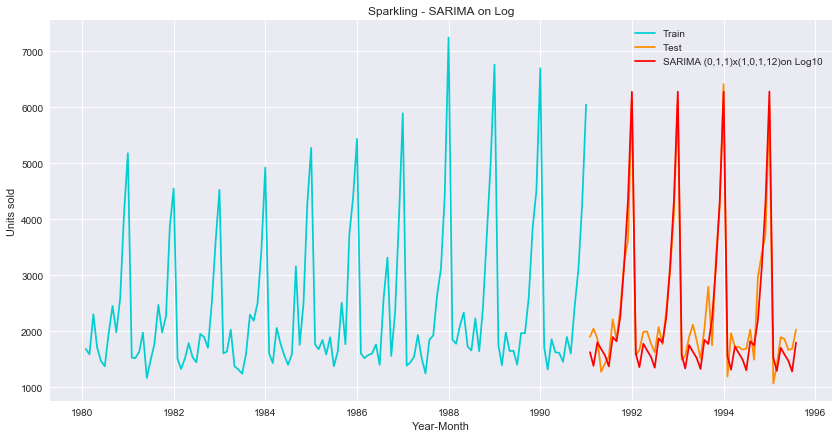

In [2872]:
plt.plot(train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(test['Sparkling'], label='Test', color = 'darkorange')

plt.plot(SARIMA_test['spark_log_forecasted'], color='red', label='SARIMA (0,1,1)x(1,0,1,12)on Log10')
plt.ylabel('Units sold')
plt.xlabel('Year-Month')
plt.title('Sparkling - SARIMA on Log')
plt.legend(loc='best')

In [2873]:
rmse_spark_model8_test = metrics.mean_squared_error(test['Sparkling'],SARIMA_test['spark_log_forecasted'],squared=False)
mape_spark_model8_test = MAPE(test['Sparkling'],SARIMA_test['spark_log_forecasted'])
print("For SARIMA forecast on the Sparkling Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model8_test, mape_spark_model8_test))

For SARIMA forecast on the Sparkling Testing Data:  RMSE is 336.801 and MAPE is 11.19


In [2874]:
resultsDf_8_spark2 = pd.DataFrame({'Test RMSE': [rmse_spark_model8_test],'Test MAPE': [mape_spark_model8_test]},index=['Auto SARIMA(0,1,1)x(1,0,1,12)-Log10'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_8_spark2])
spark_resultsDf

Test RMSE  Test MAPE
RegressionOnTime                       1389.135175      50.15
NaiveModel                             3864.279352     152.87
SimpleAverage                          1275.081804      38.90
2 point TMA                             813.400684      19.70
4 point TMA                            1156.589694      35.96
6 point TMA                            1283.927428      43.86
9 point TMA                            1346.278315      46.86
SES Alpha 0.00                         1275.081823      38.90
DES Alpha 0.1,Beta 0.1                 1779.430000      67.23
DES Alpha 0.6,Beta 0.0                 3851.171500     152.07
TES Alpha 0.4, Beta 0.1, Gamma 0.2      312.211095      10.20
TES Alpha 0.15, Beta 0.00, Gamma 0.37   384.203001      11.94
Auto SARIMA(3,1,3)x(3,1,0,12)           331.614531      10.33
Auto SARIMA(0,1,1)x(1,0,1,12)-Log10     336.800722      11.19

## Manual SARIMA

### Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.

Let us look at the ACF and the PACF plots once more.

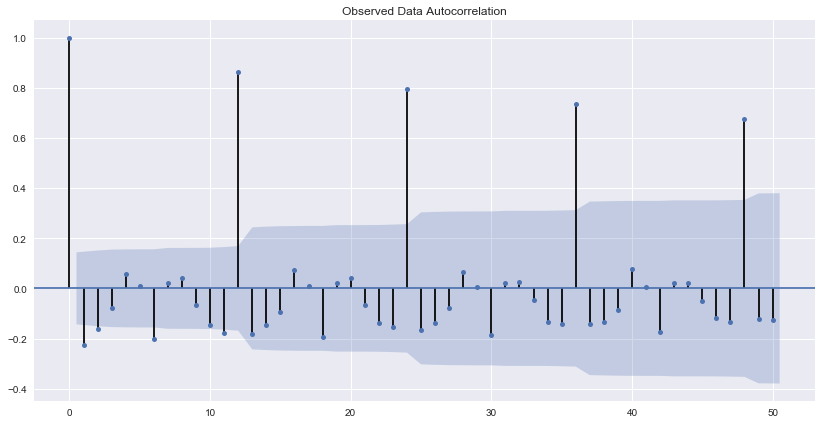

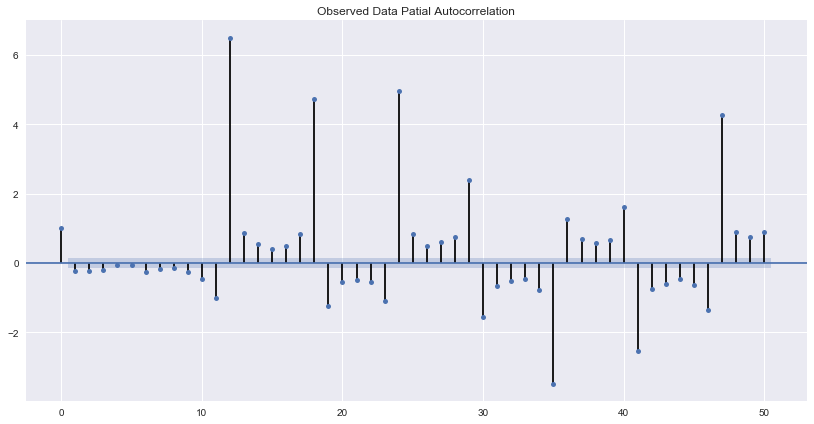

In [2875]:

plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Observed Data Autocorrelation')
plot_pacf(df['Sparkling'].diff().dropna(),lags=50,title='Observed Data Patial Autocorrelation')
plt.show()

We see that our ACF plot at the seasonal interval (12) does not taper off quickly. So, we go ahead and take a seasonal differencing of the original series. Before that let us look at the original series.

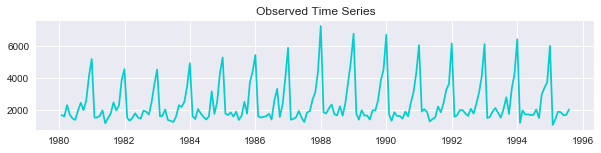

In [2876]:
plt.figure(figsize=(10,2))
plt.plot(df['Sparkling'], color = 'darkturquoise')
plt.title ('Observed Time Series');

We see that there is marginal trend and but have significant seasonality. So, now we take a seasonal differencing and check the series.

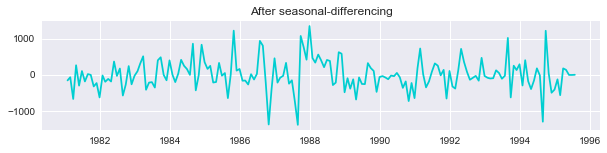

In [2877]:
plt.figure(figsize=(10,2))
plt.plot(df['Sparkling'].diff(12).dropna(), color = 'darkturquoise')
plt.title ('After seasonal-differencing');

The marginal trend in the data is still seen

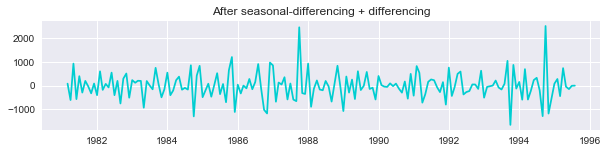

In [2878]:
plt.figure(figsize=(10,2))
plt.plot((df['Sparkling'].diff(12).dropna()).diff().dropna(),  color = 'darkturquoise')
plt.title ('After seasonal-differencing + differencing');

Now we see that there is almost no trend present in the data. Seasonality is only present in the data.

Let us go ahead and check the stationarity of the above series before fitting the SARIMA model.

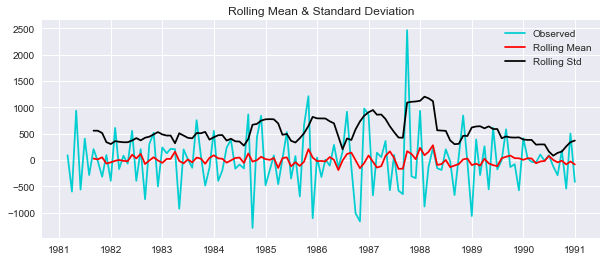

Results of Dickey-Fuller Test:
Test Statistic                  -3.342905
p-value                          0.013066
#Lags Used                      10.000000
Number of Observations Used    108.000000
Critical Value (1%)             -3.492401
Critical Value (5%)             -2.888697
Critical Value (10%)            -2.581255
dtype: float64 



In [2879]:
plt.figure(figsize=(10,4))
test_stationarity((SARIMA_train['Sparkling'].diff(12).dropna()).diff().dropna(), 'darkturquoise')

Checking the ACF and the PACF plots for the new modified Time Series.

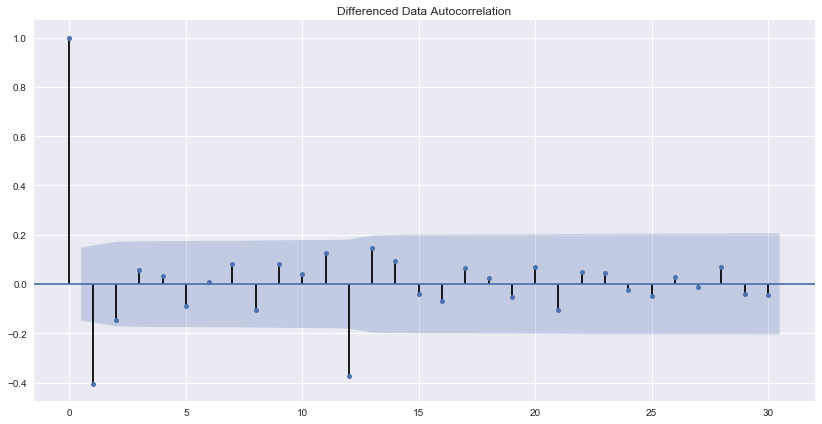

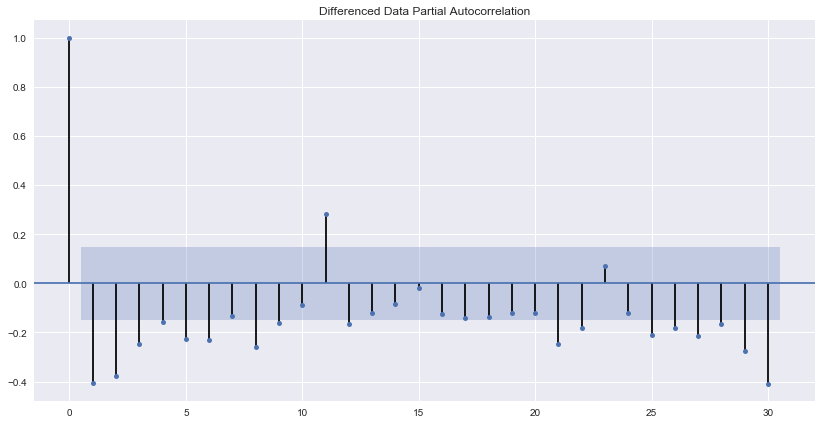

In [2880]:
plot_acf((df['Sparkling'].diff(12).dropna()).diff().dropna(),lags=30, title='Differenced Data Autocorrelation')
plot_pacf((df['Sparkling'].diff(12).dropna()).diff().dropna(),lags=30, title='Differenced Data Partial Autocorrelation');

In [2881]:
import statsmodels.api as sm

manual_SARIMA_spark = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(3, 1, 1),#(3, 1, 1),
                                seasonal_order= (1, 1, 2, 12),#(0, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_spark = manual_SARIMA_spark.fit(maxiter=1000)
print(results_manual_SARIMA_spark.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(1, 1, 2, 12)   Log Likelihood                -693.697
Date:                            Sun, 13 Sep 2020   AIC                           1403.394
Time:                                    19:57:47   BIC                           1423.654
Sample:                                         0   HQIC                          1411.574
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2229      0.130      1.713      0.087      -0.032       0.478
ar.L2         -0.0798      0.131   

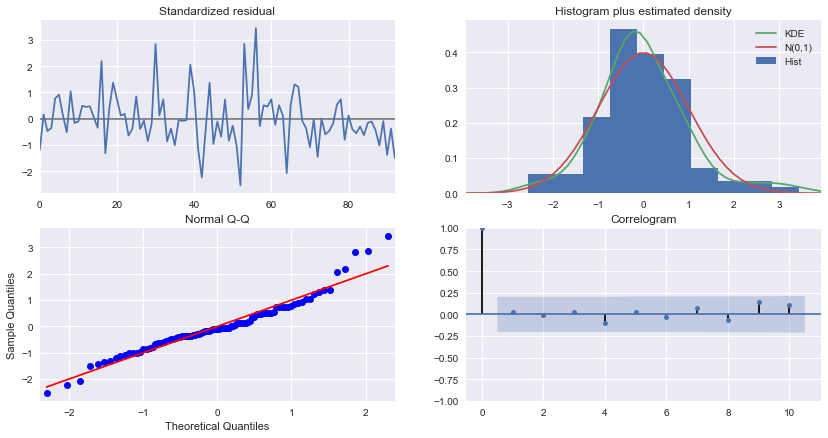

In [2882]:
results_manual_SARIMA_spark.plot_diagnostics()
plt.show()

The model diagnostics plot looks okay.

In [2883]:
pred_dynamic = results_manual_SARIMA_spark.get_prediction(dynamic=True, full_results=True)

In [2884]:
pred_dynamic_ci = pred_dynamic.conf_int()
predicted_manual_SARIMA_spark = results_manual_SARIMA_spark.get_forecast(steps=len(SARIMA_test['Sparkling']), alpha=0.5)

In [2885]:
predicted_manual_SARIMA_spark.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1579.912325  416.594690     763.401736    2396.422914
1  1419.158299  429.114166     578.109988    2260.206609
2  1868.148459  429.104806    1027.118493    2709.178424
3  1731.476035  430.973367     886.783758    2576.168313
4  1659.826647  431.906301     813.305853    2506.347441

In [2886]:
# Extract the predicted and true values of our time series
spark_manual_forecasted = pred_dynamic.predicted_mean
SARIMA_test['spark_manual_forecasted'] = predicted_manual_SARIMA_spark.predicted_mean
SARIMA_test.head()

Sparkling  Rose  spark_forecasted  spark_log_forecasted  \
YearMonth                                                             
1991-01-31       1902  54.0       1431.064349           1629.412301   
1991-02-28       2049  55.0       1540.640563           1384.542445   
1991-03-31       1874  66.0       1707.781979           1804.201346   
1991-04-30       1279  65.0       1859.127693           1685.508897   
1991-05-31       1432  60.0       1501.874687           1569.593533   

            spark_manual_forecasted  
YearMonth                            
1991-01-31              1579.912325  
1991-02-28              1419.158299  
1991-03-31              1868.148459  
1991-04-30              1731.476035  
1991-05-31              1659.826647

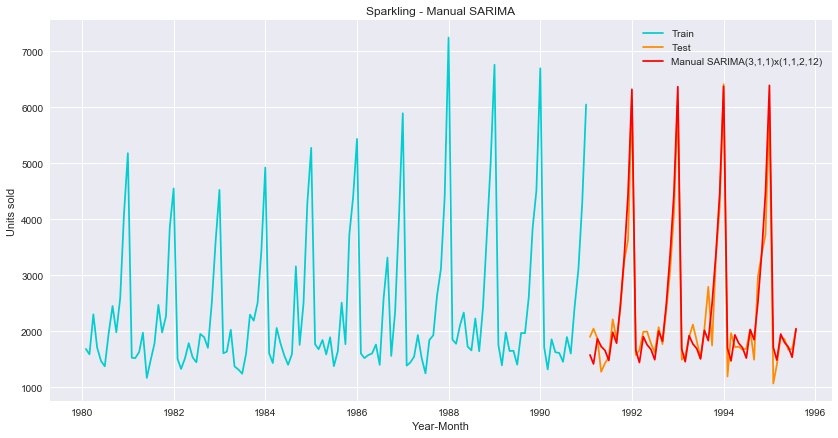

In [2887]:
plt.plot(train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(test['Sparkling'], label='Test', color = 'darkorange')

plt.plot(SARIMA_test['spark_manual_forecasted'], color='red', label='Manual SARIMA(3,1,1)x(1,1,2,12)')
plt.ylabel('Units sold')
plt.xlabel('Year-Month')
plt.title('Sparkling - Manual SARIMA')
plt.legend(loc='best')

In [2888]:
rmse_spark_model8_test = metrics.mean_squared_error(test['Sparkling'],SARIMA_test['spark_manual_forecasted'],squared=False)
mape_spark_model8_test = MAPE(test['Sparkling'],SARIMA_test['spark_manual_forecasted'])
print("For SARIMA forecast on the Sparkling Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model8_test, mape_spark_model8_test))

For SARIMA forecast on the Sparkling Testing Data:  RMSE is 324.108 and MAPE is 9.48


In [2889]:
resultsDf_8_spark3 = pd.DataFrame({'Test RMSE': [rmse_spark_model8_test],'Test MAPE': [mape_spark_model8_test]},index=['Manual SARIMA(3,1,1)x(1,1,2,12)'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_8_spark3])
spark_resultsDf

Test RMSE  Test MAPE
RegressionOnTime                       1389.135175      50.15
NaiveModel                             3864.279352     152.87
SimpleAverage                          1275.081804      38.90
2 point TMA                             813.400684      19.70
4 point TMA                            1156.589694      35.96
6 point TMA                            1283.927428      43.86
9 point TMA                            1346.278315      46.86
SES Alpha 0.00                         1275.081823      38.90
DES Alpha 0.1,Beta 0.1                 1779.430000      67.23
DES Alpha 0.6,Beta 0.0                 3851.171500     152.07
TES Alpha 0.4, Beta 0.1, Gamma 0.2      312.211095      10.20
TES Alpha 0.15, Beta 0.00, Gamma 0.37   384.203001      11.94
Auto SARIMA(3,1,3)x(3,1,0,12)           331.614531      10.33
Auto SARIMA(0,1,1)x(1,0,1,12)-Log10     336.800722      11.19
Manual SARIMA(3,1,1)x(1,1,2,12)         324.108003       9.48

## Model 8 - SARIMA on ROSE

### Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

### Original ROSE data

In [2890]:
import itertools
p = q = range(0,4)
d = range(1,2)
D = range(1,2)


pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 1, 1, 12)
Model: (0, 1, 2)(0, 1, 2, 12)
Model: (0, 1, 3)(0, 1, 3, 12)
Model: (1, 1, 0)(1, 1, 0, 12)
Model: (1, 1, 1)(1, 1, 1, 12)
Model: (1, 1, 2)(1, 1, 2, 12)
Model: (1, 1, 3)(1, 1, 3, 12)
Model: (2, 1, 0)(2, 1, 0, 12)
Model: (2, 1, 1)(2, 1, 1, 12)
Model: (2, 1, 2)(2, 1, 2, 12)
Model: (2, 1, 3)(2, 1, 3, 12)
Model: (3, 1, 0)(3, 1, 0, 12)
Model: (3, 1, 1)(3, 1, 1, 12)
Model: (3, 1, 2)(3, 1, 2, 12)
Model: (3, 1, 3)(3, 1, 3, 12)


In [2891]:
SARIMA_AIC_rose = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC_rose

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [2892]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model_rose = sm.tsa.statespace.SARIMAX(SARIMA_train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA_rose = SARIMA_model_rose.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA_rose.aic))
        SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 1, 0, 12)7 - AIC:1171.2013438278946
SARIMA(0, 1, 0)x(0, 1, 1, 12)7 - AIC:965.5057301625903
SARIMA(0, 1, 0)x(0, 1, 2, 12)7 - AIC:845.8687014776131
SARIMA(0, 1, 0)x(0, 1, 3, 12)7 - AIC:3395.280073861382
SARIMA(0, 1, 0)x(1, 1, 0, 12)7 - AIC:982.3269589658811
SARIMA(0, 1, 0)x(1, 1, 1, 12)7 - AIC:975.3375383601606
SARIMA(0, 1, 0)x(1, 1, 2, 12)7 - AIC:847.7332182654682
SARIMA(0, 1, 0)x(1, 1, 3, 12)7 - AIC:3347.0743999727474
SARIMA(0, 1, 0)x(2, 1, 0, 12)7 - AIC:858.5132698374415
SARIMA(0, 1, 0)x(2, 1, 1, 12)7 - AIC:853.3390729145532
SARIMA(0, 1, 0)x(2, 1, 2, 12)7 - AIC:842.6282244225166
SARIMA(0, 1, 0)x(2, 1, 3, 12)7 - AIC:3251.5015456539145
SARIMA(0, 1, 0)x(3, 1, 0, 12)7 - AIC:752.395812273977
SARIMA(0, 1, 0)x(3, 1, 1, 12)7 - AIC:748.3165246489875
SARIMA(0, 1, 0)x(3, 1, 2, 12)7 - AIC:748.9721713374524
SARIMA(0, 1, 0)x(3, 1, 3, 12)7 - AIC:3265.732140095761
SARIMA(0, 1, 1)x(0, 1, 0, 12)7 - AIC:1113.7663133560825
SARIMA(0, 1, 1)x(0, 1, 1, 12)7 - AIC:915.0730606717821
SARIMA(

SARIMA(2, 1, 1)x(1, 1, 2, 12)7 - AIC:796.1300001391938
SARIMA(2, 1, 1)x(1, 1, 3, 12)7 - AIC:4286.082429773086
SARIMA(2, 1, 1)x(2, 1, 0, 12)7 - AIC:792.8940753934324
SARIMA(2, 1, 1)x(2, 1, 1, 12)7 - AIC:784.8928010025697
SARIMA(2, 1, 1)x(2, 1, 2, 12)7 - AIC:785.8335674869528
SARIMA(2, 1, 1)x(2, 1, 3, 12)7 - AIC:3713.2665236292737
SARIMA(2, 1, 1)x(3, 1, 0, 12)7 - AIC:694.9386751690757
SARIMA(2, 1, 1)x(3, 1, 1, 12)7 - AIC:687.9965336168647
SARIMA(2, 1, 1)x(3, 1, 2, 12)7 - AIC:688.909868684896
SARIMA(2, 1, 1)x(3, 1, 3, 12)7 - AIC:5751.6812128919
SARIMA(2, 1, 2)x(0, 1, 0, 12)7 - AIC:1099.4823964821178
SARIMA(2, 1, 2)x(0, 1, 1, 12)7 - AIC:904.7004130356167
SARIMA(2, 1, 2)x(0, 1, 2, 12)7 - AIC:784.1409665535218
SARIMA(2, 1, 2)x(0, 1, 3, 12)7 - AIC:3317.109300160042
SARIMA(2, 1, 2)x(1, 1, 0, 12)7 - AIC:925.3705667388363
SARIMA(2, 1, 2)x(1, 1, 1, 12)7 - AIC:915.6932510710424
SARIMA(2, 1, 2)x(1, 1, 2, 12)7 - AIC:785.8290222047141
SARIMA(2, 1, 2)x(1, 1, 3, 12)7 - AIC:4389.864113654588
SARIMA(2, 1

In [2893]:
SARIMA_AIC_rose.sort_values(by=['AIC']).head()

param       seasonal         AIC
221  (3, 1, 1)  (3, 1, 1, 12)  681.362807
253  (3, 1, 3)  (3, 1, 1, 12)  681.618697
254  (3, 1, 3)  (3, 1, 2, 12)  681.973619
222  (3, 1, 1)  (3, 1, 2, 12)  682.320698
237  (3, 1, 2)  (3, 1, 1, 12)  683.211700

In [2894]:
auto_SARIMA_rose = sm.tsa.statespace.SARIMAX(SARIMA_train['Rose'].values,
                                order=(3, 1, 1),
                                seasonal_order=(3, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_rose = auto_SARIMA_rose.fit(maxiter=1000)
print(results_auto_SARIMA_rose.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(3, 1, 1, 12)   Log Likelihood                -331.681
Date:                            Sun, 13 Sep 2020   AIC                            681.363
Time:                                    20:18:47   BIC                            702.801
Sample:                                         0   HQIC                           689.958
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0173      0.151      0.114      0.909      -0.279       0.314
ar.L2         -0.0426      0.141   

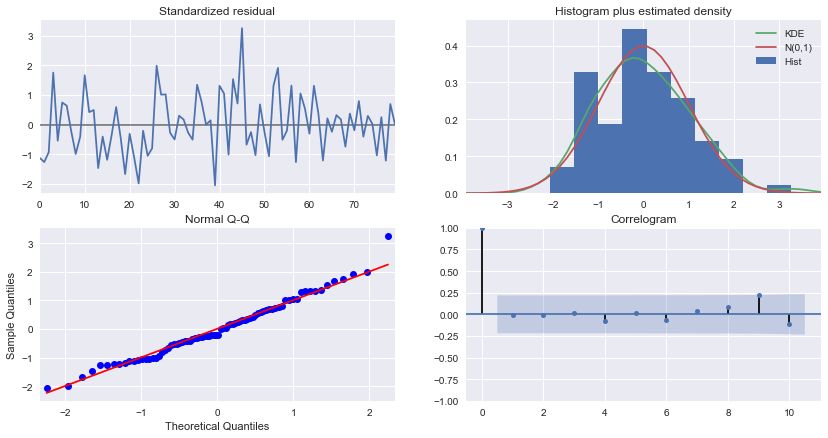

In [2895]:
results_auto_SARIMA_rose.plot_diagnostics()
plt.show()

In [2896]:
pred_dynamic = results_auto_SARIMA_rose.get_prediction(dynamic=True, full_results=True)

In [2897]:
pred_dynamic_ci = pred_dynamic.conf_int()
predicted_auto_SARIMA_rose = results_auto_SARIMA_rose.get_forecast(steps=len(SARIMA_test['Rose']), alpha=0.05)

In [2898]:
predicted_auto_SARIMA_rose.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  45.229562  14.458115      16.892178      73.566946
1  63.054287  14.503029      34.628873      91.479702
2  68.118684  14.453099      39.791131      96.446238
3  61.827048  14.449332      33.506878      90.147218
4  68.436653  14.469848      40.076272      96.797035

In [2899]:
# Extract the predicted and true values of our time series
rose_forecasted = pred_dynamic.predicted_mean
SARIMA_test['rose_auto_forecasted'] = predicted_auto_SARIMA_rose.predicted_mean
SARIMA_test.head()

Sparkling  Rose  spark_forecasted  spark_log_forecasted  \
YearMonth                                                             
1991-01-31       1902  54.0       1431.064349           1629.412301   
1991-02-28       2049  55.0       1540.640563           1384.542445   
1991-03-31       1874  66.0       1707.781979           1804.201346   
1991-04-30       1279  65.0       1859.127693           1685.508897   
1991-05-31       1432  60.0       1501.874687           1569.593533   

            spark_manual_forecasted  rose_auto_forecasted  
YearMonth                                                  
1991-01-31              1579.912325             45.229562  
1991-02-28              1419.158299             63.054287  
1991-03-31              1868.148459             68.118684  
1991-04-30              1731.476035             61.827048  
1991-05-31              1659.826647             68.436653

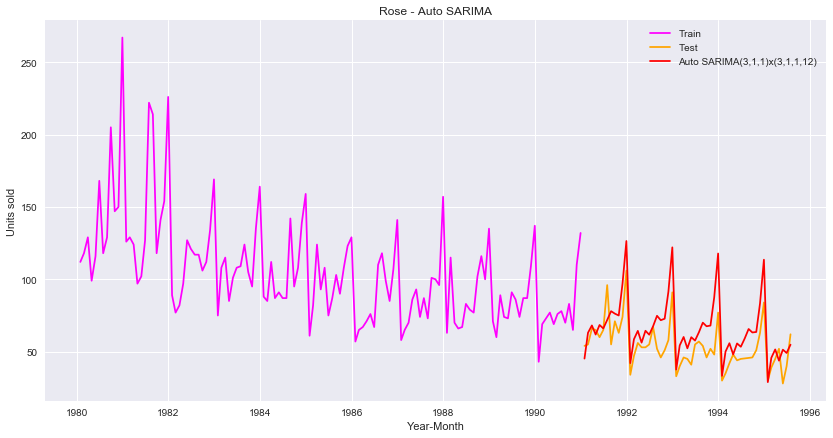

In [2900]:
plt.plot(train['Rose'], label='Train', color = 'magenta')
plt.plot(test['Rose'], label='Test', color = 'orange')

plt.plot(SARIMA_test['rose_auto_forecasted'], color='red', label='Auto SARIMA(3,1,1)x(3,1,1,12)')
plt.xlabel('Year-Month')
plt.ylabel('Units sold')
plt.title('Rose - Auto SARIMA')
plt.legend(loc='best')

In [2901]:
rmse_rose_model8_test = metrics.mean_squared_error(test['Rose'],SARIMA_test['rose_auto_forecasted'],squared=False)
mape_rose_model8_test = MAPE(test['Rose'],SARIMA_test['rose_auto_forecasted'])
print("For SARIMA forecast on the SRose Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model8_test, mape_rose_model8_test))

For SARIMA forecast on the SRose Testing Data:  RMSE is 16.824 and MAPE is 25.48


In [2902]:
resultsDf_8_rose1 = pd.DataFrame({'Test RMSE': [rmse_rose_model8_test],'Test MAPE': [mape_rose_model8_test]},index=['Auto SARIMA(3,1,1)x(3,1,1,12)'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_8_rose1])
rose_resultsDf

Test RMSE  Test MAPE
RegressionOnTime                       15.268885      22.82
NaiveModel                             79.718559     145.10
SimpleAverage                          53.460350      94.93
2 point TMA                            11.529278      13.54
4 point TMA                            14.451364      19.49
6 point TMA                            14.566269      20.82
9 point TMA                            14.727594      21.01
SES Alpha 0.01                         36.796019      63.88
DES Alpha 0.16, Beta 0.16              70.572197     120.25
DES Alpha 0.10, Beta 0.10              37.056912      64.02
TES Alpha 0.1, Beta 0.2, Gamma 0.2      9.640616      13.96
TES Alpha 0.11, Beta 0.05, Gamma 0.00  17.369210      28.88
Auto SARIMA(3,1,1)x(3,1,1,12)          16.823618      25.48

## AUTO SARIMA ON LOG(ROSE)

In [2903]:
rose_log_train = np.log10(SARIMA_train['Rose'])

In [2904]:
import itertools
p = q = range(0, 3)
d= range(0,2)
D = range(0,2)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 0, 1)(0, 0, 1, 12)
Model: (0, 0, 2)(0, 0, 2, 12)
Model: (0, 1, 0)(0, 1, 0, 12)
Model: (0, 1, 1)(0, 1, 1, 12)
Model: (0, 1, 2)(0, 1, 2, 12)
Model: (1, 0, 0)(1, 0, 0, 12)
Model: (1, 0, 1)(1, 0, 1, 12)
Model: (1, 0, 2)(1, 0, 2, 12)
Model: (1, 1, 0)(1, 1, 0, 12)
Model: (1, 1, 1)(1, 1, 1, 12)
Model: (1, 1, 2)(1, 1, 2, 12)
Model: (2, 0, 0)(2, 0, 0, 12)
Model: (2, 0, 1)(2, 0, 1, 12)
Model: (2, 0, 2)(2, 0, 2, 12)
Model: (2, 1, 0)(2, 1, 0, 12)
Model: (2, 1, 1)(2, 1, 1, 12)
Model: (2, 1, 2)(2, 1, 2, 12)


In [2905]:
SARIMA_AIC_rose_log = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC_rose_log

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [2906]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model_rose_log = sm.tsa.statespace.SARIMAX(rose_log_train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA_rose_log = SARIMA_model_rose_log.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA_rose_log.aic))
        SARIMA_AIC_rose_log = SARIMA_AIC_rose_log.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose_log.aic}, ignore_index=True)

SARIMA(0, 0, 0)x(0, 0, 0, 12)7 - AIC:555.7706618310567
SARIMA(0, 0, 0)x(0, 0, 1, 12)7 - AIC:380.7976958405474
SARIMA(0, 0, 0)x(0, 0, 2, 12)7 - AIC:253.02210408794178
SARIMA(0, 0, 0)x(0, 1, 0, 12)7 - AIC:-203.869058600344
SARIMA(0, 0, 0)x(0, 1, 1, 12)7 - AIC:-207.3075305492318
SARIMA(0, 0, 0)x(0, 1, 2, 12)7 - AIC:-200.3749100608878
SARIMA(0, 0, 0)x(1, 0, 0, 12)7 - AIC:-214.78669155250248
SARIMA(0, 0, 0)x(1, 0, 1, 12)7 - AIC:-256.17028174944
SARIMA(0, 0, 0)x(1, 0, 2, 12)7 - AIC:-233.1445321381055
SARIMA(0, 0, 0)x(1, 1, 0, 12)7 - AIC:-209.0018247944942
SARIMA(0, 0, 0)x(1, 1, 1, 12)7 - AIC:-206.62380295337698
SARIMA(0, 0, 0)x(1, 1, 2, 12)7 - AIC:-198.5058849369423
SARIMA(0, 0, 0)x(2, 0, 0, 12)7 - AIC:-233.4830458114752
SARIMA(0, 0, 0)x(2, 0, 1, 12)7 - AIC:-233.82264954437093
SARIMA(0, 0, 0)x(2, 0, 2, 12)7 - AIC:-238.6418061229471
SARIMA(0, 0, 0)x(2, 1, 0, 12)7 - AIC:-201.4914449430504
SARIMA(0, 0, 0)x(2, 1, 1, 12)7 - AIC:-203.4992558950268
SARIMA(0, 0, 0)x(2, 1, 2, 12)7 - AIC:-199.72369832

SARIMA(1, 0, 2)x(0, 0, 1, 12)7 - AIC:-201.09045386702326
SARIMA(1, 0, 2)x(0, 0, 2, 12)7 - AIC:-194.65415564563895
SARIMA(1, 0, 2)x(0, 1, 0, 12)7 - AIC:-203.80790685817973
SARIMA(1, 0, 2)x(0, 1, 1, 12)7 - AIC:-247.7341801754053
SARIMA(1, 0, 2)x(0, 1, 2, 12)7 - AIC:-217.33047494573705
SARIMA(1, 0, 2)x(1, 0, 0, 12)7 - AIC:-211.20780918954065
SARIMA(1, 0, 2)x(1, 0, 1, 12)7 - AIC:-248.70822316516518
SARIMA(1, 0, 2)x(1, 0, 2, 12)7 - AIC:-229.79123117726664
SARIMA(1, 0, 2)x(1, 1, 0, 12)7 - AIC:-233.73513879069188
SARIMA(1, 0, 2)x(1, 1, 1, 12)7 - AIC:-231.31561356274042
SARIMA(1, 0, 2)x(1, 1, 2, 12)7 - AIC:-216.31979983706475
SARIMA(1, 0, 2)x(2, 0, 0, 12)7 - AIC:-236.52567294373762
SARIMA(1, 0, 2)x(2, 0, 1, 12)7 - AIC:-238.65117211620085
SARIMA(1, 0, 2)x(2, 0, 2, 12)7 - AIC:-238.0841559396481
SARIMA(1, 0, 2)x(2, 1, 0, 12)7 - AIC:-211.61713850606466
SARIMA(1, 0, 2)x(2, 1, 1, 12)7 - AIC:-212.13949485567065
SARIMA(1, 0, 2)x(2, 1, 2, 12)7 - AIC:-212.99494501244655
SARIMA(1, 1, 0)x(0, 0, 0, 12)7 - 

SARIMA(2, 1, 1)x(0, 0, 2, 12)7 - AIC:-205.38611406730357
SARIMA(2, 1, 1)x(0, 1, 0, 12)7 - AIC:-203.99973897514266
SARIMA(2, 1, 1)x(0, 1, 1, 12)7 - AIC:-243.36373555484832
SARIMA(2, 1, 1)x(0, 1, 2, 12)7 - AIC:-212.24002745766546
SARIMA(2, 1, 1)x(1, 0, 0, 12)7 - AIC:-224.05002215235564
SARIMA(2, 1, 1)x(1, 0, 1, 12)7 - AIC:-246.47194026659201
SARIMA(2, 1, 1)x(1, 0, 2, 12)7 - AIC:-225.25689995204712
SARIMA(2, 1, 1)x(1, 1, 0, 12)7 - AIC:-222.9697393839943
SARIMA(2, 1, 1)x(1, 1, 1, 12)7 - AIC:-224.91674558361208
SARIMA(2, 1, 1)x(1, 1, 2, 12)7 - AIC:-211.0551560150848
SARIMA(2, 1, 1)x(2, 0, 0, 12)7 - AIC:-235.52221166186743
SARIMA(2, 1, 1)x(2, 0, 1, 12)7 - AIC:-233.662126461515
SARIMA(2, 1, 1)x(2, 0, 2, 12)7 - AIC:-234.33048181832544
SARIMA(2, 1, 1)x(2, 1, 0, 12)7 - AIC:-207.10470136336866
SARIMA(2, 1, 1)x(2, 1, 1, 12)7 - AIC:-209.4556485151475
SARIMA(2, 1, 1)x(2, 1, 2, 12)7 - AIC:-210.3589104248577
SARIMA(2, 1, 2)x(0, 0, 0, 12)7 - AIC:-178.2875766507574
SARIMA(2, 1, 2)x(0, 0, 1, 12)7 - AIC:-

In [2907]:
SARIMA_AIC_rose_log.sort_values(by=['AIC']).head()

param       seasonal         AIC
115  (1, 0, 0)  (1, 0, 1, 12) -257.620760
7    (0, 0, 0)  (1, 0, 1, 12) -256.170282
133  (1, 0, 1)  (1, 0, 1, 12) -255.482062
25   (0, 0, 1)  (1, 0, 1, 12) -254.978844
223  (2, 0, 0)  (1, 0, 1, 12) -253.620651

In [2908]:
auto_SARIMA_rose_log = sm.tsa.statespace.SARIMAX(rose_log_train,
                                order=(1, 0, 0),
                                seasonal_order=(1, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_rose_log = auto_SARIMA_rose_log.fit(maxiter=1000)
print(results_auto_SARIMA_rose_log.summary())

                                 Statespace Model Results                                 
Dep. Variable:                               Rose   No. Observations:                  132
Model:             SARIMAX(1, 0, 0)x(1, 0, 1, 12)   Log Likelihood                 132.810
Date:                            Sun, 13 Sep 2020   AIC                           -257.621
Time:                                    20:24:09   BIC                           -246.504
Sample:                                01-31-1980   HQIC                          -253.107
                                     - 12-31-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1689      0.078      2.179      0.029       0.017       0.321
ar.S.L12       0.9872      0.001   

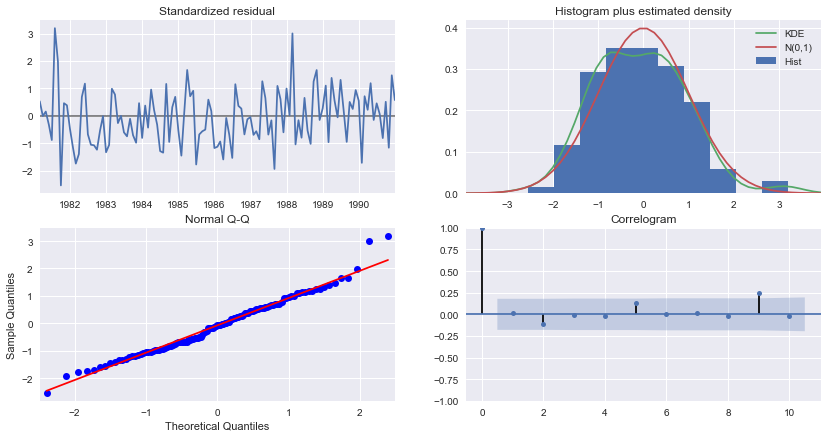

In [2909]:
results_auto_SARIMA_rose_log.plot_diagnostics()
plt.show()

In [2910]:
pred_dynamic = results_auto_SARIMA_rose_log.get_prediction(dynamic=True, full_results=True)

In [2911]:
pred_dynamic_ci = pred_dynamic.conf_int()
predicted_auto_SARIMA_rose_log = results_auto_SARIMA_rose_log.get_forecast(steps=len(SARIMA_test['Rose']), alpha=0.05)

In [2912]:
predicted_auto_SARIMA_rose_log.summary_frame(alpha=0.05).head()

Rose            mean   mean_se  mean_ci_lower  mean_ci_upper
1991-01-31  1.727981  0.073890       1.583159       1.872803
1991-02-28  1.787619  0.074676       1.641256       1.933983
1991-03-31  1.820471  0.074699       1.674064       1.966878
1991-04-30  1.780363  0.074699       1.633955       1.926771
1991-05-31  1.811744  0.074699       1.665336       1.958152

In [2913]:
# Extract the predicted and true values of our time series
rose_log_forecasted = pred_dynamic.predicted_mean
#we need to change the scale of the logarithmic scale to the original scale by raising the predicted values
#to the power of 10
SARIMA_test['rose_log_auto_forecasted'] = np.power(10, predicted_auto_SARIMA_rose_log.predicted_mean)
SARIMA_test.head()

Sparkling  Rose  spark_forecasted  spark_log_forecasted  \
YearMonth                                                             
1991-01-31       1902  54.0       1431.064349           1629.412301   
1991-02-28       2049  55.0       1540.640563           1384.542445   
1991-03-31       1874  66.0       1707.781979           1804.201346   
1991-04-30       1279  65.0       1859.127693           1685.508897   
1991-05-31       1432  60.0       1501.874687           1569.593533   

            spark_manual_forecasted  rose_auto_forecasted  \
YearMonth                                                   
1991-01-31              1579.912325             45.229562   
1991-02-28              1419.158299             63.054287   
1991-03-31              1868.148459             68.118684   
1991-04-30              1731.476035             61.827048   
1991-05-31              1659.826647             68.436653   

            rose_log_auto_forecasted  
YearMonth                             
1991-01-31                 53.454121  
1991-02-28                 61.322448  
1991-03-31                 66.140998  
1991-04-30                 60.306373  
1991-05-31                 64.825173

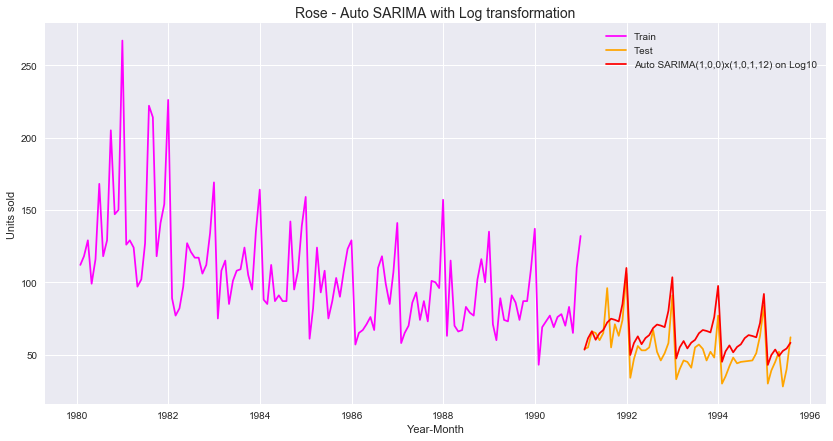

In [2914]:
plt.plot(train['Rose'], label='Train', color = 'magenta')
plt.plot(test['Rose'], label='Test', color = 'orange')

plt.plot(SARIMA_test['rose_log_auto_forecasted'], color='red', label='Auto SARIMA(1,0,0)x(1,0,1,12) on Log10')

plt.xlabel('Year-Month')
plt.ylabel('Units sold')
plt.title('Rose - Auto SARIMA with Log transformation', fontsize=14)

plt.legend(loc='best')

In [2915]:
rmse_rose_model8_test = metrics.mean_squared_error(test['Rose'],SARIMA_test['rose_log_auto_forecasted'],squared=False)
mape_rose_model8_test = MAPE(test['Rose'],SARIMA_test['rose_log_auto_forecasted'])
print("For SARIMA forecast on the Rose Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model8_test, mape_rose_model8_test))

For SARIMA forecast on the Rose Testing Data:  RMSE is 13.596 and MAPE is 21.93


In [2916]:
resultsDf_8_rose2 = pd.DataFrame({'Test RMSE': [rmse_rose_model8_test],'Test MAPE': [mape_rose_model8_test]},index=['Auto SARIMA(1,0,0)x(1,0,1,12)-Log10'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_8_rose2])
rose_resultsDf

Test RMSE  Test MAPE
RegressionOnTime                       15.268885      22.82
NaiveModel                             79.718559     145.10
SimpleAverage                          53.460350      94.93
2 point TMA                            11.529278      13.54
4 point TMA                            14.451364      19.49
6 point TMA                            14.566269      20.82
9 point TMA                            14.727594      21.01
SES Alpha 0.01                         36.796019      63.88
DES Alpha 0.16, Beta 0.16              70.572197     120.25
DES Alpha 0.10, Beta 0.10              37.056912      64.02
TES Alpha 0.1, Beta 0.2, Gamma 0.2      9.640616      13.96
TES Alpha 0.11, Beta 0.05, Gamma 0.00  17.369210      28.88
Auto SARIMA(3,1,1)x(3,1,1,12)          16.823618      25.48
Auto SARIMA(1,0,0)x(1,0,1,12)-Log10    13.595882      21.93

## Manual SARIMA on Rose

### Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.

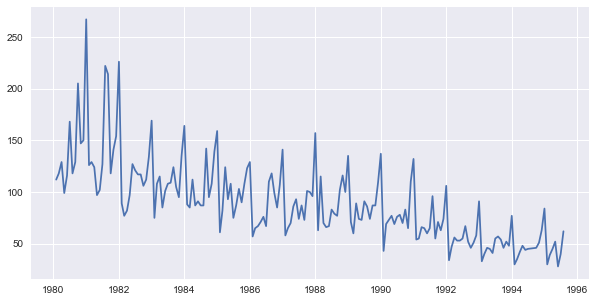

In [2917]:
plt.figure(figsize=(10,5))
plt.plot(df['Rose'])

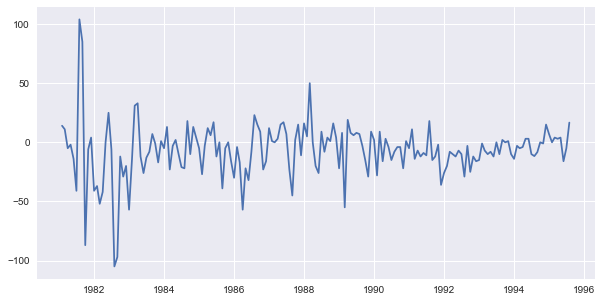

In [2918]:
plt.figure(figsize=(10,5))
plt.plot(df['Rose'].diff(12).dropna())

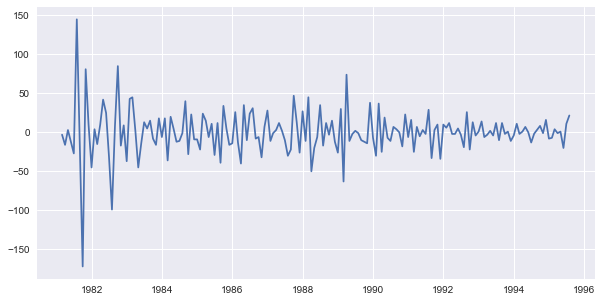

In [2919]:
plt.figure(figsize=(10,5))
plt.plot((df['Rose'].diff(12).dropna()).diff().dropna())

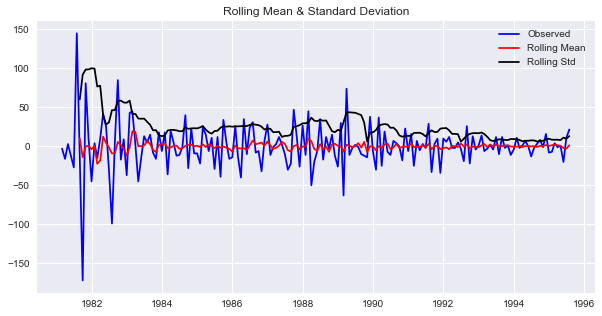

Results of Dickey-Fuller Test:
Test Statistic                  -4.605732
p-value                          0.000126
#Lags Used                      11.000000
Number of Observations Used    162.000000
Critical Value (1%)             -3.471374
Critical Value (5%)             -2.879552
Critical Value (10%)            -2.576373
dtype: float64 



In [2920]:
plt.figure(figsize=(10,5))
test_stationarity((df['Rose'].diff(12).dropna()).diff().dropna(),'blue')

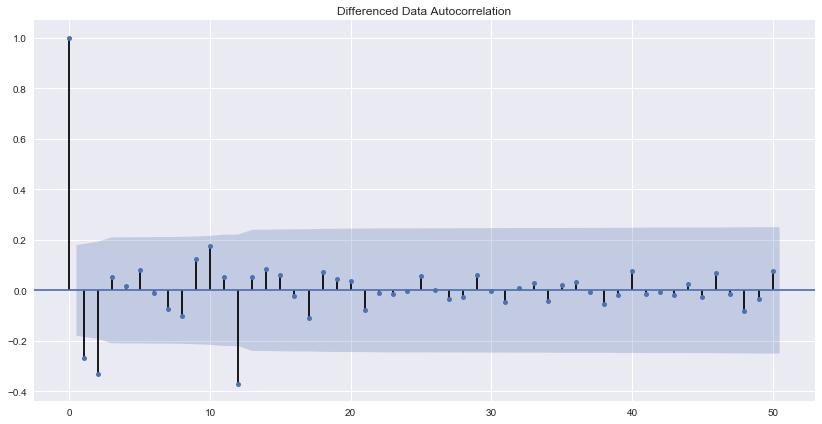

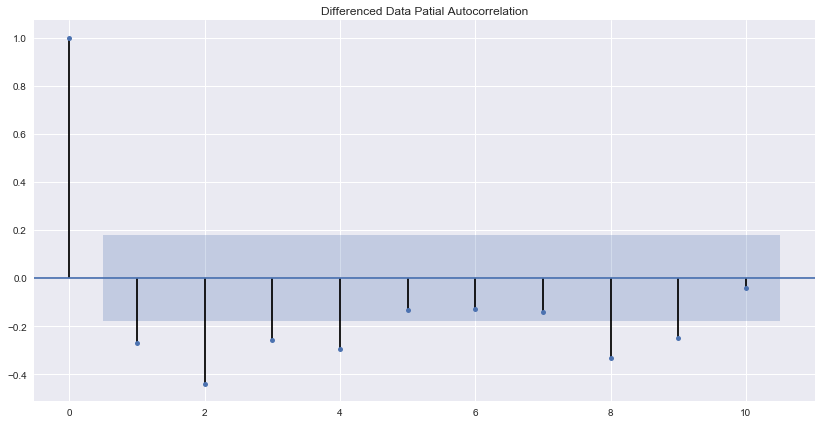

In [2921]:
plot_acf((SARIMA_train['Rose'].diff(12).dropna()).diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf((SARIMA_train['Rose'].diff(12).dropna()).diff().dropna(),lags=10,title='Differenced Data Patial Autocorrelation')
plt.show()

In [2922]:
manual_SARIMA_rose = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(4, 1, 2),
                                #seasonal_order=(0, 1, 1, 12),
                                seasonal_order=(0, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_rose = manual_SARIMA_rose.fit(maxiter=1000)
print(results_manual_SARIMA_rose.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(4, 1, 2)x(0, 1, 2, 12)   Log Likelihood                -384.369
Date:                            Sun, 13 Sep 2020   AIC                            786.737
Time:                                    20:24:12   BIC                            809.433
Sample:                                         0   HQIC                           795.898
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8967      0.132     -6.814      0.000      -1.155      -0.639
ar.L2          0.0165      0.171   

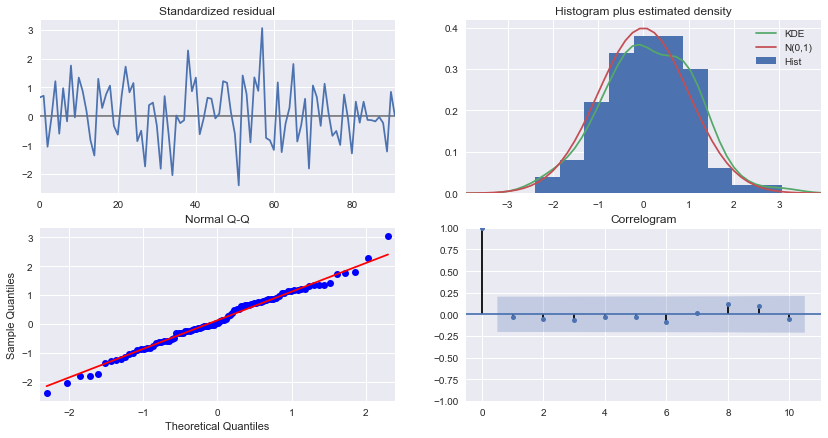

In [2923]:
results_manual_SARIMA_rose.plot_diagnostics()
plt.show()

In [2924]:
pred_dynamic = results_manual_SARIMA_rose.get_prediction(dynamic=True, full_results=True)

In [2925]:
pred_dynamic_ci = pred_dynamic.conf_int()
predicted_manual_SARIMA_rose = results_manual_SARIMA_rose.get_forecast(steps=len(test['Rose']), alpha=0.05)

In [2926]:
predicted_manual_SARIMA_rose.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  44.733041  15.552666      14.250376      75.215706
1  64.208694  16.000767      32.847767      95.569620
2  65.110689  16.074606      33.605041      96.616338
3  68.453063  16.150995      36.797694     100.108432
4  61.423433  16.154555      29.761087      93.085780

In [2927]:
rose_log_forecasted = pred_dynamic.predicted_mean
SARIMA_test['rose_manual_forecasted'] = predicted_manual_SARIMA_rose.predicted_mean
SARIMA_test.head()

Sparkling  Rose  spark_forecasted  spark_log_forecasted  \
YearMonth                                                             
1991-01-31       1902  54.0       1431.064349           1629.412301   
1991-02-28       2049  55.0       1540.640563           1384.542445   
1991-03-31       1874  66.0       1707.781979           1804.201346   
1991-04-30       1279  65.0       1859.127693           1685.508897   
1991-05-31       1432  60.0       1501.874687           1569.593533   

            spark_manual_forecasted  rose_auto_forecasted  \
YearMonth                                                   
1991-01-31              1579.912325             45.229562   
1991-02-28              1419.158299             63.054287   
1991-03-31              1868.148459             68.118684   
1991-04-30              1731.476035             61.827048   
1991-05-31              1659.826647             68.436653   

            rose_log_auto_forecasted  rose_manual_forecasted  
YearMonth                                                     
1991-01-31                 53.454121               44.733041  
1991-02-28                 61.322448               64.208694  
1991-03-31                 66.140998               65.110689  
1991-04-30                 60.306373               68.453063  
1991-05-31                 64.825173               61.423433

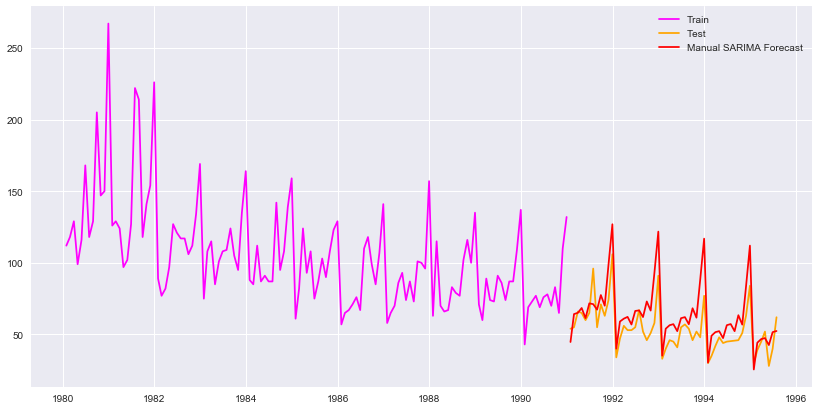

In [2928]:
plt.plot(train['Rose'], label='Train', color = 'magenta')
plt.plot(test['Rose'], label='Test', color = 'orange')

plt.plot(SARIMA_test['rose_manual_forecasted'], color='red', label='Manual SARIMA Forecast')

plt.legend(loc='best')

In [2929]:
rmse_rose_model8_test = metrics.mean_squared_error(test['Rose'],SARIMA_test['rose_manual_forecasted'],squared=False)
mape_rose_model8_test = MAPE(test['Rose'],SARIMA_test['rose_manual_forecasted'])
print("For SARIMA forecast on the Rose Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model8_test, mape_rose_model8_test))

For SARIMA forecast on the Rose Testing Data:  RMSE is 15.377 and MAPE is 22.16


In [2930]:
resultsDf_8_rose3 = pd.DataFrame({'Test RMSE': [rmse_rose_model8_test],'Test MAPE': [mape_rose_model8_test]},index=['Manual SARIMA(4,1,2)x(0,1,1,12)'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_8_rose3])
rose_resultsDf

Test RMSE  Test MAPE
RegressionOnTime                       15.268885      22.82
NaiveModel                             79.718559     145.10
SimpleAverage                          53.460350      94.93
2 point TMA                            11.529278      13.54
4 point TMA                            14.451364      19.49
6 point TMA                            14.566269      20.82
9 point TMA                            14.727594      21.01
SES Alpha 0.01                         36.796019      63.88
DES Alpha 0.16, Beta 0.16              70.572197     120.25
DES Alpha 0.10, Beta 0.10              37.056912      64.02
TES Alpha 0.1, Beta 0.2, Gamma 0.2      9.640616      13.96
TES Alpha 0.11, Beta 0.05, Gamma 0.00  17.369210      28.88
Auto SARIMA(3,1,1)x(3,1,1,12)          16.823618      25.48
Auto SARIMA(1,0,0)x(1,0,1,12)-Log10    13.595882      21.93
Manual SARIMA(4,1,2)x(0,1,1,12)        15.377144      22.16

## Manual SARIMA on Log(Rose)

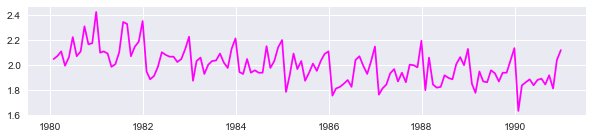

In [2931]:
plt.figure(figsize=(10,2))
plt.plot(rose_log_train, color='magenta')

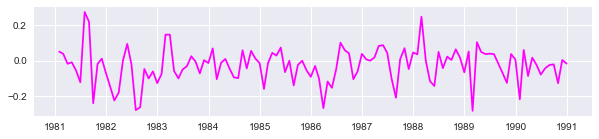

In [2932]:
plt.figure(figsize=(10,2))
plt.plot(rose_log_train.diff(12).dropna(), color='magenta')#.diff().dropna())

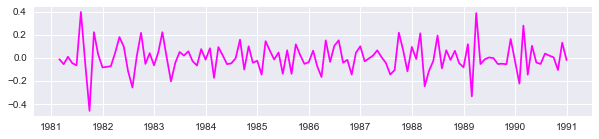

In [2933]:
plt.figure(figsize=(10,2))
plt.plot((rose_log_train.diff(12).dropna()).diff().dropna(), color='magenta')#.diff().dropna())

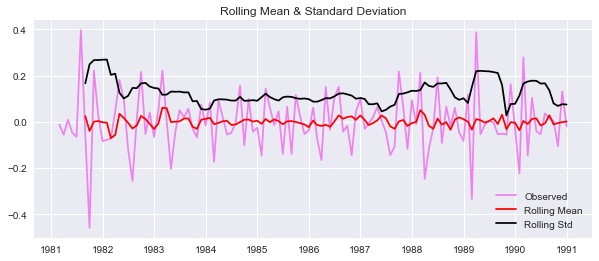

Results of Dickey-Fuller Test:
Test Statistic                  -3.910109
p-value                          0.001962
#Lags Used                      11.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64 



In [2934]:
plt.figure(figsize=(10,4))
test_stationarity((rose_log_train.diff(12).dropna()).diff().dropna(), 'violet')

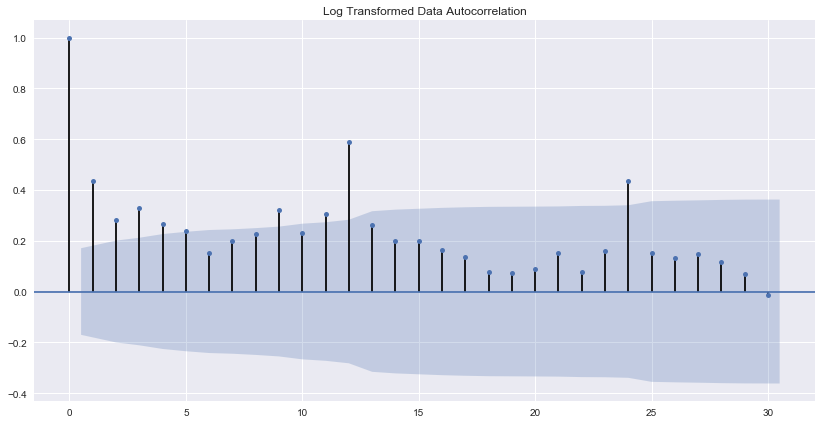

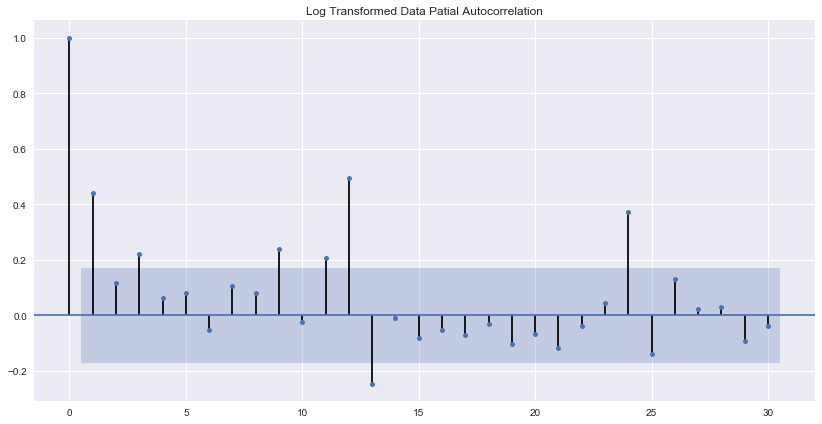

In [2935]:
plot_acf(rose_log_train,lags=30,title='Log Transformed Data Autocorrelation')
plot_pacf(rose_log_train,lags=30,title='Log Transformed Data Patial Autocorrelation')
plt.show()

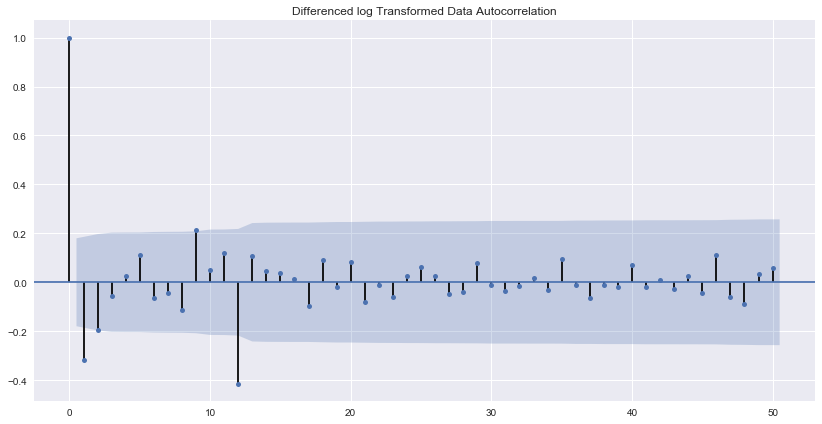

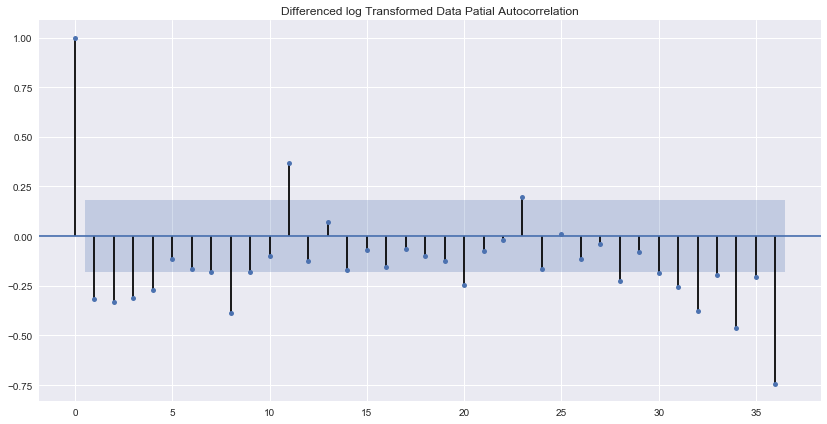

In [2936]:
plot_acf((rose_log_train.diff(12).dropna()).diff().dropna(),lags=50,title='Differenced log Transformed Data Autocorrelation')
plot_pacf((rose_log_train.diff(12).dropna()).diff().dropna(),lags=36,title='Differenced log Transformed Data Patial Autocorrelation')
plt.show()

In [2937]:
manual_SARIMA_rose_log = sm.tsa.statespace.SARIMAX(rose_log_train,
                                order= (4, 1, 1),
                                seasonal_order= (0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_rose_log = manual_SARIMA_rose_log.fit(maxiter=1000)
print(results_manual_SARIMA_rose_log.summary())

                                 Statespace Model Results                                 
Dep. Variable:                               Rose   No. Observations:                  132
Model:             SARIMAX(4, 1, 1)x(0, 1, 1, 12)   Log Likelihood                 128.764
Date:                            Sun, 13 Sep 2020   AIC                           -243.528
Time:                                    20:24:16   BIC                           -224.950
Sample:                                01-31-1980   HQIC                          -236.000
                                     - 12-31-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0013      0.118     -0.011      0.991      -0.232       0.229
ar.L2         -0.1553      0.126   

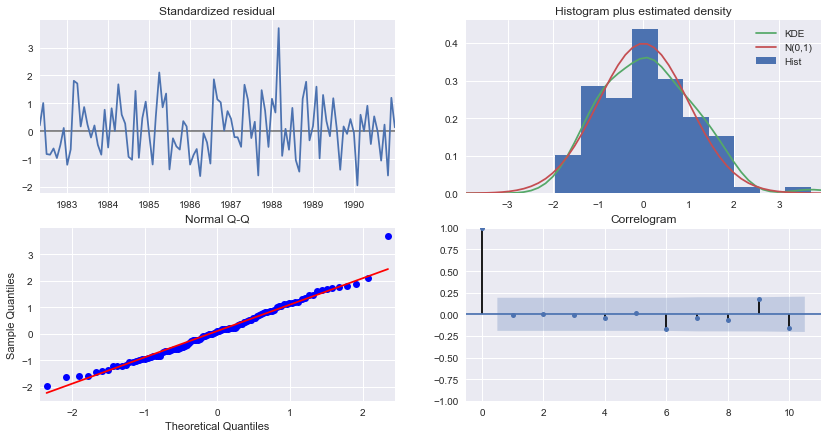

In [2938]:
results_manual_SARIMA_rose_log.plot_diagnostics()
plt.show()

In [2939]:
pred_dynamic = results_manual_SARIMA_rose_log.get_prediction(dynamic=True, full_results=True)

In [2940]:
pred_dynamic_ci = pred_dynamic.conf_int()
predicted_manual_SARIMA_rose_log = results_manual_SARIMA_rose_log.get_forecast(steps=len(test['Rose']), alpha=0.1)

In [2941]:
predicted_manual_SARIMA_rose_log.summary_frame(alpha=0.05).head()

Rose            mean   mean_se  mean_ci_lower  mean_ci_upper
1991-01-31  1.721119  0.067175       1.589459       1.852779
1991-02-28  1.788988  0.067980       1.655749       1.922228
1991-03-31  1.811244  0.067978       1.678009       1.944478
1991-04-30  1.786830  0.068001       1.653550       1.920109
1991-05-31  1.820846  0.067845       1.687872       1.953821

In [2942]:
SARIMA_test['rose_log_manual_forecasted'] = np.power(10,predicted_manual_SARIMA_rose_log.predicted_mean)
SARIMA_test.head()

Sparkling  Rose  spark_forecasted  spark_log_forecasted  \
YearMonth                                                             
1991-01-31       1902  54.0       1431.064349           1629.412301   
1991-02-28       2049  55.0       1540.640563           1384.542445   
1991-03-31       1874  66.0       1707.781979           1804.201346   
1991-04-30       1279  65.0       1859.127693           1685.508897   
1991-05-31       1432  60.0       1501.874687           1569.593533   

            spark_manual_forecasted  rose_auto_forecasted  \
YearMonth                                                   
1991-01-31              1579.912325             45.229562   
1991-02-28              1419.158299             63.054287   
1991-03-31              1868.148459             68.118684   
1991-04-30              1731.476035             61.827048   
1991-05-31              1659.826647             68.436653   

            rose_log_auto_forecasted  rose_manual_forecasted  \
YearMonth                                                      
1991-01-31                 53.454121               44.733041   
1991-02-28                 61.322448               64.208694   
1991-03-31                 66.140998               65.110689   
1991-04-30                 60.306373               68.453063   
1991-05-31                 64.825173               61.423433   

            rose_log_manual_forecasted  
YearMonth                               
1991-01-31                   52.616114  
1991-02-28                   61.516056  
1991-03-31                   64.750588  
1991-04-30                   61.211055  
1991-05-31                   66.198218

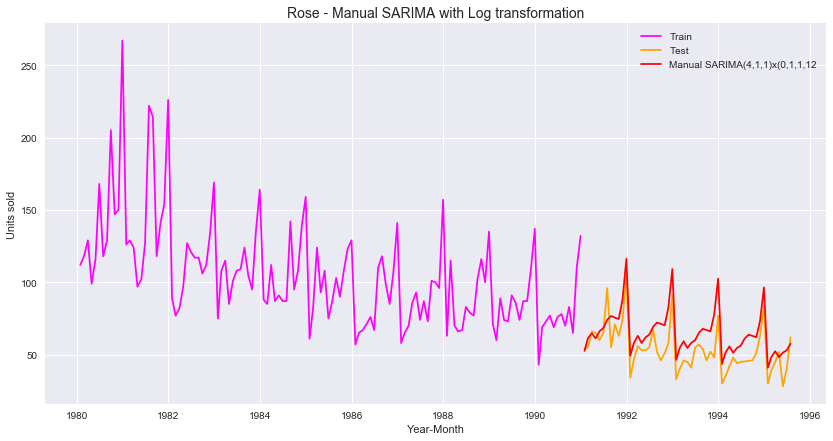

In [2943]:
plt.plot(train['Rose'], label='Train', color = 'magenta')
plt.plot(test['Rose'], label='Test', color = 'orange')

plt.plot(SARIMA_test['rose_log_manual_forecasted'], color='red', label='Manual SARIMA(4,1,1)x(0,1,1,12')
plt.xlabel('Year-Month')
plt.ylabel('Units sold')
plt.title('Rose - Manual SARIMA with Log transformation', fontsize=14)

plt.legend(loc='best')

In [2944]:
rmse_rose_model8_test = metrics.mean_squared_error(test['Rose'],SARIMA_test['rose_log_manual_forecasted'],squared=False)
mape_rose_model8_test = MAPE(test['Rose'],SARIMA_test['rose_log_manual_forecasted'])
print("For SARIMA forecast on the Rose Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model8_test, mape_rose_model8_test))

For SARIMA forecast on the Rose Testing Data:  RMSE is 14.176 and MAPE is 23.10


In [2945]:
resultsDf_8_rose4 = pd.DataFrame({'Test RMSE': [rmse_rose_model8_test],'Test MAPE': [mape_rose_model8_test]},index=['Manual SARIMA(4,1,1)x(0,1,1,12)-Log10'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_8_rose4])
rose_resultsDf

Test RMSE  Test MAPE
RegressionOnTime                       15.268885      22.82
NaiveModel                             79.718559     145.10
SimpleAverage                          53.460350      94.93
2 point TMA                            11.529278      13.54
4 point TMA                            14.451364      19.49
6 point TMA                            14.566269      20.82
9 point TMA                            14.727594      21.01
SES Alpha 0.01                         36.796019      63.88
DES Alpha 0.16, Beta 0.16              70.572197     120.25
DES Alpha 0.10, Beta 0.10              37.056912      64.02
TES Alpha 0.1, Beta 0.2, Gamma 0.2      9.640616      13.96
TES Alpha 0.11, Beta 0.05, Gamma 0.00  17.369210      28.88
Auto SARIMA(3,1,1)x(3,1,1,12)          16.823618      25.48
Auto SARIMA(1,0,0)x(1,0,1,12)-Log10    13.595882      21.93
Manual SARIMA(4,1,2)x(0,1,1,12)        15.377144      22.16
Manual SARIMA(4,1,1)x(0,1,1,12)-Log10  14.176381      23.10

# Building the most optimum model on the Full Data.

### Sparkling

Sort the results from all the models

In [2946]:
spark_resultsDf.sort_values(by=['Test RMSE'])

Test RMSE  Test MAPE
TES Alpha 0.4, Beta 0.1, Gamma 0.2      312.211095      10.20
Manual SARIMA(3,1,1)x(1,1,2,12)         324.108003       9.48
Auto SARIMA(3,1,3)x(3,1,0,12)           331.614531      10.33
Auto SARIMA(0,1,1)x(1,0,1,12)-Log10     336.800722      11.19
TES Alpha 0.15, Beta 0.00, Gamma 0.37   384.203001      11.94
2 point TMA                             813.400684      19.70
4 point TMA                            1156.589694      35.96
SimpleAverage                          1275.081804      38.90
SES Alpha 0.00                         1275.081823      38.90
6 point TMA                            1283.927428      43.86
9 point TMA                            1346.278315      46.86
RegressionOnTime                       1389.135175      50.15
DES Alpha 0.1,Beta 0.1                 1779.430000      67.23
DES Alpha 0.6,Beta 0.0                 3851.171500     152.07
NaiveModel                             3864.279352     152.87

In [2947]:
spark_resultsDf.sort_values(by=['Test MAPE'])

Test RMSE  Test MAPE
Manual SARIMA(3,1,1)x(1,1,2,12)         324.108003       9.48
TES Alpha 0.4, Beta 0.1, Gamma 0.2      312.211095      10.20
Auto SARIMA(3,1,3)x(3,1,0,12)           331.614531      10.33
Auto SARIMA(0,1,1)x(1,0,1,12)-Log10     336.800722      11.19
TES Alpha 0.15, Beta 0.00, Gamma 0.37   384.203001      11.94
2 point TMA                             813.400684      19.70
4 point TMA                            1156.589694      35.96
SimpleAverage                          1275.081804      38.90
SES Alpha 0.00                         1275.081823      38.90
6 point TMA                            1283.927428      43.86
9 point TMA                            1346.278315      46.86
RegressionOnTime                       1389.135175      50.15
DES Alpha 0.1,Beta 0.1                 1779.430000      67.23
DES Alpha 0.6,Beta 0.0                 3851.171500     152.07
NaiveModel                             3864.279352     152.87

 Plot all the forecast

Text(0.5, 1.0, 'SPARKLING : Forecasts Vs Test Data')

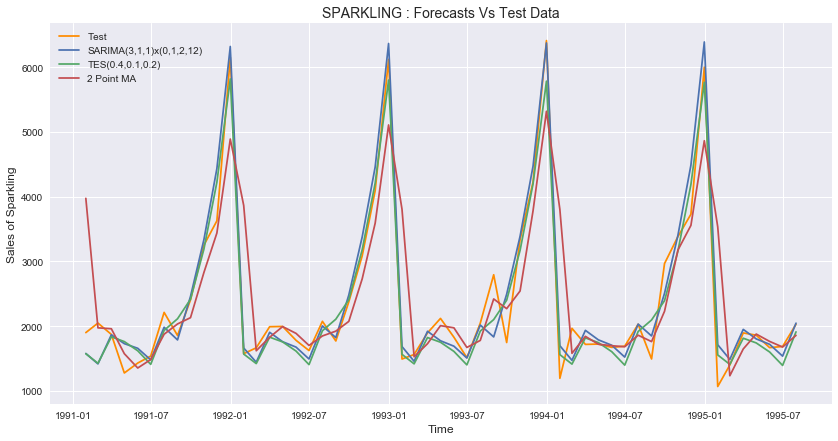

In [2948]:
#plt.figure(figsize=(20,12))

#plt.plot(TES_train['Sparkling'], label='Train', color = 'purple')
plt.plot(TES_test['Sparkling'], label='Test', color = 'darkorange')

#SARIMA
plt.plot(SARIMA_test['spark_manual_forecasted'],  label='SARIMA(3,1,1)x(0,1,2,12)')
#TES
plt.plot(TES_test['predict_spark',0.4,0.1,0.2],  label='TES(0.4,0.1,0.2)')
#DES
#plt.plot(DES_test['predict_spark',0.1,0.1],  label='DES')
#SES
#plt.plot(SES_test['predict_spark'],  label='SES')
#MA
plt.plot(trailing_MovingAverage_test['Spark_Trailing_2'],  label='2 Point MA')
#SA
#plt.plot(SimpleAverage_test['spark_mean_forecast'], label='SA')
#Naive
#plt.plot(NaiveModel_test['spark_naive'], label='Naive')
#Regression
#plt.plot(LinearRegression_test['RegOnTime_spark'], label='Regression')

plt.legend(loc='upper left')
plt.xlabel('Time',fontsize=12)
plt.ylabel('Sales of Sparkling',fontsize=12)
plt.title('SPARKLING : Forecasts Vs Test Data', fontsize=14)


Build model on all of the dataset using best model, which is TES

In [2949]:
model_TES_spark = ExponentialSmoothing(df['Sparkling'],trend='additive',seasonal='multiplicative',freq='M')
model_TES_spark_fit = model_TES_spark.fit(smoothing_level=0.4,smoothing_slope=0.1,smoothing_seasonal=0.2,optimized=True,use_brute=True)
TES_spark_forecast = model_TES_spark_fit.forecast(steps=12)

In [2950]:
rmse_spark_tes_full = metrics.mean_squared_error(df['Sparkling'],model_TES_spark_fit.fittedvalues,squared=False)
mape_spark_tes_full = MAPE(df['Sparkling'],model_TES_spark_fit.fittedvalues)
print("TES forecast on the Sparkling Full Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_tes_full, mape_spark_tes_full))

TES forecast on the Sparkling Full Data:  RMSE is 376.821 and MAPE is 11.30


Text(0.5, 1.0, 'SPARKLING : 12 Months Forecast using TES Model')

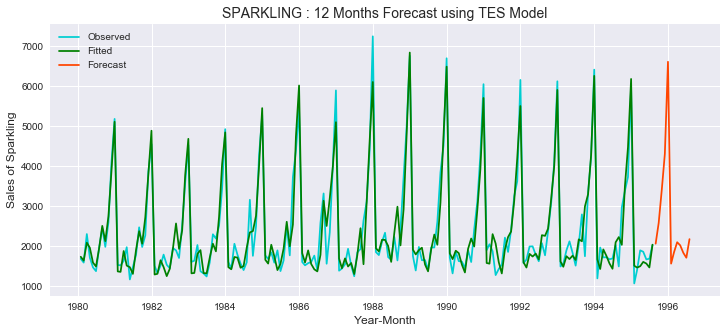

In [2951]:
plt.figure(figsize=(12,5))

plt.plot(df['Sparkling'], label='Observed', color = 'darkturquoise')
plt.plot(model_TES_spark_fit.fittedvalues, label='Fitted', color = 'green')
plt.plot(TES_spark_forecast, label='Forecast', color = 'orangered')
plt.legend(loc='upper left')
plt.xlabel('Year-Month',fontsize=12)
plt.ylabel('Sales of Sparkling',fontsize=12)
plt.title('SPARKLING : 12 Months Forecast using TES Model', fontsize=14)


Text(0.5, 1.0, 'SPARKLING : 12 Months Forecast')

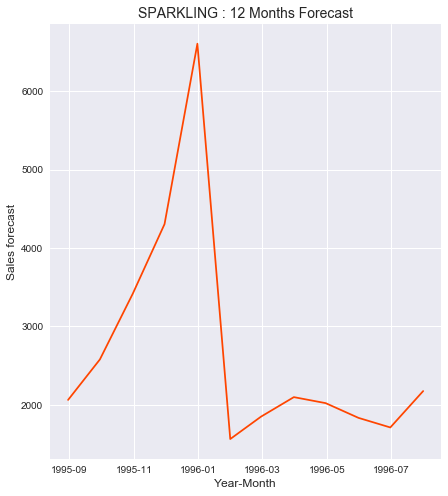

In [2952]:
plt.figure(figsize=(7,8))
plt.plot(TES_spark_forecast, label='Forecast', color = 'orangered')
plt.xlabel('Year-Month',fontsize=12)
plt.ylabel('Sales forecast',fontsize=12)
plt.title('SPARKLING : 12 Months Forecast', fontsize=14)

### Attempt SARIMA(3,1,1)x(1,1,2,12) for forecast

In [2953]:
spark_full_data_model = sm.tsa.statespace.SARIMAX(df['Sparkling'],
                                order=(3,1,3),
                                seasonal_order=(1, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model_spark = spark_full_data_model.fit(maxiter=1000)
print(results_full_data_model_spark.summary())

                                 Statespace Model Results                                 
Dep. Variable:                          Sparkling   No. Observations:                  187
Model:             SARIMAX(3, 1, 3)x(1, 1, 2, 12)   Log Likelihood               -1078.437
Date:                            Sun, 13 Sep 2020   AIC                           2176.875
Time:                                    20:24:33   BIC                           2206.711
Sample:                                01-31-1980   HQIC                          2188.998
                                     - 07-31-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4227      0.086     -4.913      0.000      -0.591      -0.254
ar.L2         -0.9092      0.053   

In [2988]:
rcParams['figure.figsize'] = 14,7

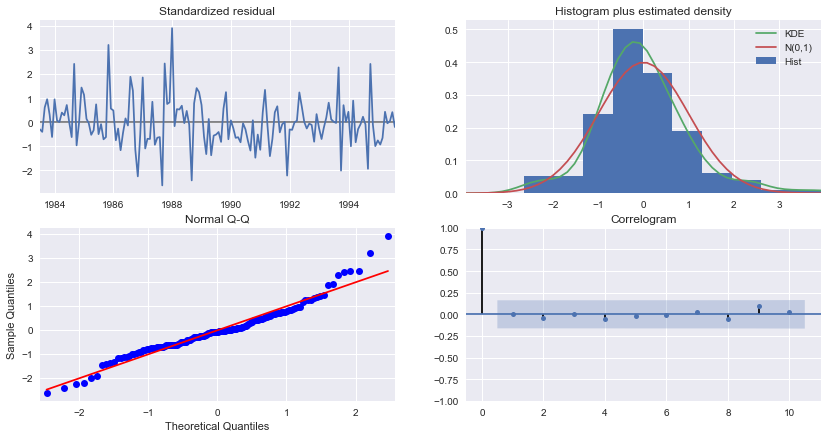

In [2993]:
results_full_data_model_spark.plot_diagnostics();

In [2994]:
predicted_spark_SARIMA_full_data = results_full_data_model_spark.get_forecast(steps=12)

In [2995]:
predicted_spark_SARIMA_full_data.summary_frame(alpha=0.05).head()

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1995-08-31  1873.198944  384.483940    1119.624270    2626.773619
1995-09-30  2445.154336  389.508274    1681.732147    3208.576525
1995-10-31  3312.816535  390.205266    2548.028267    4077.604803
1995-11-30  3994.606630  390.714751    3228.819790    4760.393470
1995-12-31  6084.204875  390.844293    5318.164137    6850.245613

In [2996]:
rmse_spark_sarima_full = metrics.mean_squared_error(df['Sparkling'],results_full_data_model_spark.fittedvalues,squared=False)
mape_spark_sarima_full = MAPE(df['Sparkling'],results_full_data_model_spark.fittedvalues)
print("For SARIMA forecast on the Sparkling Full Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_sarima_full, mape_spark_sarima_full))

For SARIMA forecast on the Sparkling Full Data:  RMSE is 591.238 and MAPE is 14.86


In [2997]:
df.tail()

Sparkling  Rose
YearMonth                  
1995-03-31       1897  45.0
1995-04-30       1862  52.0
1995-05-31       1670  28.0
1995-06-30       1688  40.0
1995-07-31       2031  62.0

In [2998]:
pred_full_manual_SARIMA_date = predicted_spark_SARIMA_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-31',end='1996-7-31', freq='M'))

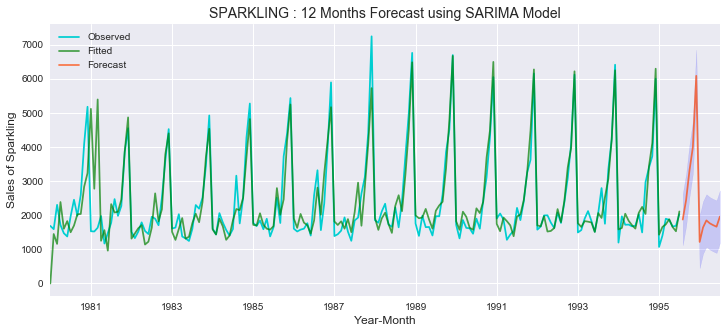

In [2999]:
# plot the forecast along with the confidence band
plt.figure(figsize=(12,5))

axis = df['Sparkling'].plot(label='Observed', color = 'darkturquoise')
results_full_data_model_spark.fittedvalues.plot(ax=axis, label='Fitted', alpha=0.7, color = 'green')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7, color = 'orangered')
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='blue', alpha=.15)
plt.xlabel('Year-Month',fontsize=12)
plt.ylabel('Sales of Sparkling',fontsize=12)
plt.title('SPARKLING : 12 Months Forecast using SARIMA Model', fontsize=14)

plt.legend(loc='best')
plt.show()


Text(0.5, 1.0, 'SPARKLING : 12 Months Forecast')

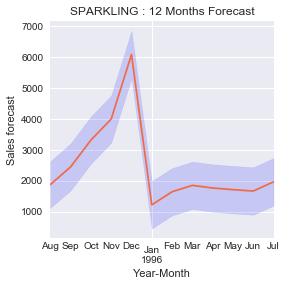

In [3000]:
plt.figure(figsize=(4,4))
axis = pred_full_manual_SARIMA_date['mean'].plot( alpha=0.7, color = 'orangered')
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='blue', alpha=.15)
plt.xlabel('Year-Month')
plt.ylabel('Sales forecast')
plt.title('SPARKLING : 12 Months Forecast', fontsize=12)


In [2963]:
forecast = pd.DataFrame({'Sparkling':np.round(pred_full_manual_SARIMA_date['mean'],2)})
forecast

Sparkling
1995-08-31    1873.20
1995-09-30    2445.15
1995-10-31    3312.82
1995-11-30    3994.61
1995-12-31    6084.20
1996-01-31    1216.50
1996-02-29    1640.54
1996-03-31    1847.26
1996-04-30    1762.31
1996-05-31    1708.44
1996-06-30    1663.80
1996-07-31    1961.50

In [2964]:
forecast.describe()

Sparkling
count    12.000000
mean   2459.194167
std    1384.623681
min    1216.500000
25%    1697.280000
50%    1860.230000
75%    2662.067500
max    6084.200000

## Rose

In [2965]:
rose_resultsDf.sort_values(by=['Test RMSE'])

Test RMSE  Test MAPE
TES Alpha 0.1, Beta 0.2, Gamma 0.2      9.640616      13.96
2 point TMA                            11.529278      13.54
Auto SARIMA(1,0,0)x(1,0,1,12)-Log10    13.595882      21.93
Manual SARIMA(4,1,1)x(0,1,1,12)-Log10  14.176381      23.10
4 point TMA                            14.451364      19.49
6 point TMA                            14.566269      20.82
9 point TMA                            14.727594      21.01
RegressionOnTime                       15.268885      22.82
Manual SARIMA(4,1,2)x(0,1,1,12)        15.377144      22.16
Auto SARIMA(3,1,1)x(3,1,1,12)          16.823618      25.48
TES Alpha 0.11, Beta 0.05, Gamma 0.00  17.369210      28.88
SES Alpha 0.01                         36.796019      63.88
DES Alpha 0.10, Beta 0.10              37.056912      64.02
SimpleAverage                          53.460350      94.93
DES Alpha 0.16, Beta 0.16              70.572197     120.25
NaiveModel                             79.718559     145.10

In [2966]:
rose_resultsDf.sort_values(by=['Test MAPE'])

Test RMSE  Test MAPE
2 point TMA                            11.529278      13.54
TES Alpha 0.1, Beta 0.2, Gamma 0.2      9.640616      13.96
4 point TMA                            14.451364      19.49
6 point TMA                            14.566269      20.82
9 point TMA                            14.727594      21.01
Auto SARIMA(1,0,0)x(1,0,1,12)-Log10    13.595882      21.93
Manual SARIMA(4,1,2)x(0,1,1,12)        15.377144      22.16
RegressionOnTime                       15.268885      22.82
Manual SARIMA(4,1,1)x(0,1,1,12)-Log10  14.176381      23.10
Auto SARIMA(3,1,1)x(3,1,1,12)          16.823618      25.48
TES Alpha 0.11, Beta 0.05, Gamma 0.00  17.369210      28.88
SES Alpha 0.01                         36.796019      63.88
DES Alpha 0.10, Beta 0.10              37.056912      64.02
SimpleAverage                          53.460350      94.93
DES Alpha 0.16, Beta 0.16              70.572197     120.25
NaiveModel                             79.718559     145.10

Text(0.5, 1.0, 'ROSE : Forecast Vs Test Data')

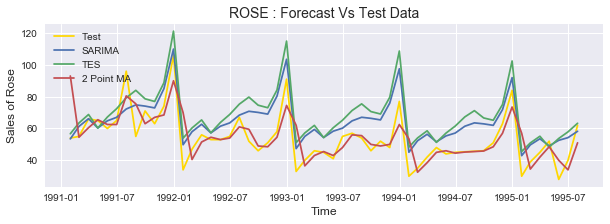

In [2967]:
#plt.figure(figsize=(20,12))

#plt.plot(TES_train['Rose'], label='Train', color = 'magenta')
plt.plot(TES_test['Rose'], label='Test', color = 'gold')

#SARIMA
plt.plot(SARIMA_test['rose_log_auto_forecasted'],  label='SARIMA')
#TES
plt.plot(TES_test['predict_rose',alpha_7_2,beta_7_2,gamma_7_2],  label='TES')
#DES
#plt.plot(DES_test['predict_rose',0.1,0.1],  label='DES')
#SES
#plt.plot(SES_test['predict_rose'],  label='SES')
#MA
plt.plot(trailing_MovingAverage_test['Rose_Trailing_2'],  label='2 Point MA')
#SA
#plt.plot(SimpleAverage_test['rose_mean_forecast'], label='SA')
#Naive
#plt.plot(NaiveModel_test['rose_naive'], label='Naive')
#Regression
#plt.plot(LinearRegression_test['RegOnTime_rose'], label='Regression')

plt.legend(loc='upper left')
plt.xlabel('Time',fontsize=12)
plt.ylabel('Sales of Rose',fontsize=12)
plt.title('ROSE : Forecast Vs Test Data', fontsize=14)


### Build TES Model on Rose full data

In [2968]:
model_TES_rose = ExponentialSmoothing(df['Rose'],trend='additive',seasonal='multiplicative',freq='M')
model_TES_rose_fit = model_TES_rose.fit(smoothing_level=0.1,smoothing_slope=0.2,smoothing_seasonal=0.2,optimized=True,use_brute=True)
TES_rose_forecast = model_TES_rose_fit.forecast(steps=12)

In [2969]:
rmse_rose_tes_full = metrics.mean_squared_error(df['Rose'],model_TES_rose_fit.fittedvalues,squared=False)
mape_rose_tes_full = MAPE(df['Rose'],model_TES_rose_fit.fittedvalues)
print("TES forecast on the Rose Full Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_tes_full, mape_rose_tes_full))

TES forecast on the Rose Full Data:  RMSE is 20.881 and MAPE is 14.48


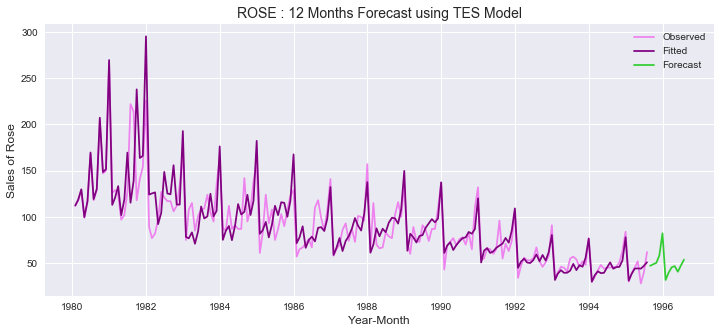

In [2970]:
plt.figure(figsize=(12,5))

plt.plot(df['Rose'], label='Observed', color = 'violet')
plt.plot(model_TES_rose_fit.fittedvalues, label='Fitted', color = 'purple')
plt.plot(TES_rose_forecast, label='Forecast', color = 'limegreen')

plt.xlabel('Year-Month',fontsize=12)
plt.ylabel('Sales of Rose',fontsize=12)
plt.title('ROSE : 12 Months Forecast using TES Model', fontsize=14)

plt.legend(loc='best')
plt.show()

Text(0.5, 1.0, 'ROSE : 12 Months Forecast')

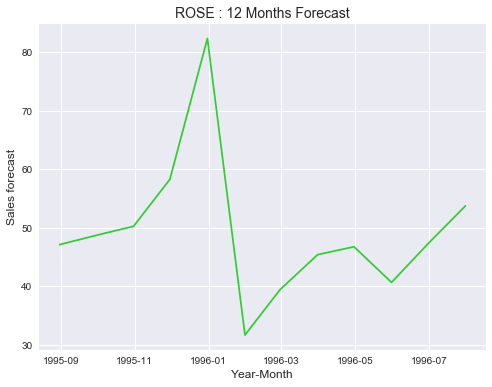

In [2971]:
plt.figure(figsize=(8,6))
plt.plot(TES_rose_forecast, label='Forecast', color = 'limegreen')
plt.xlabel('Year-Month',fontsize=12)
plt.ylabel('Sales forecast',fontsize=12)
plt.title('ROSE : 12 Months Forecast', fontsize=14)

### Try SARIMAX

In [2972]:
rose_log_trans = np.log10(df['Rose'])

In [2973]:
rose_full_data_model = sm.tsa.statespace.SARIMAX(df['Rose'],#rose_log_trans.values,
                                order= (4,1,1), #(1,0,0), #(4,1,1)x(0,1,1,12)
                                seasonal_order= (0,1,1,12), #(1, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model_rose = rose_full_data_model.fit(maxiter=1000)
print(results_full_data_model_rose.summary())

                                 Statespace Model Results                                 
Dep. Variable:                               Rose   No. Observations:                  187
Model:             SARIMAX(4, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -664.135
Date:                            Sun, 13 Sep 2020   AIC                           1342.270
Time:                                    20:24:35   BIC                           1363.796
Sample:                                01-31-1980   HQIC                          1351.011
                                     - 07-31-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0914      0.084      1.093      0.274      -0.072       0.255
ar.L2         -0.1077      0.077   

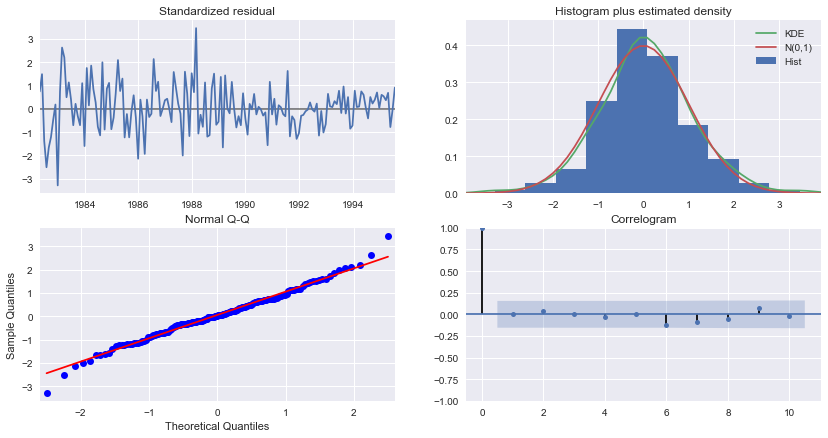

In [2990]:
results_full_data_model_rose.plot_diagnostics();

In [2975]:
predicted_rose_SARIMA_full_data = results_full_data_model_rose.get_forecast(steps=12)
predicted_rose_SARIMA_full_data.summary_frame(alpha=0.05).head()

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1995-08-31  46.540809  15.245486      16.660205      76.421412
1995-09-30  45.514602  15.769108      14.607719      76.421485
1995-10-31  46.226234  15.827872      15.204176      77.248292
1995-11-30  54.319830  15.831176      23.291295      85.348364
1995-12-31  82.214864  15.835194      51.178455     113.251273

In [2976]:
#rmse_rose_sarima_full = metrics.mean_squared_error(df['Rose'],np.power(10,results_full_data_model_rose.fittedvalues),squared=False)
#mape_rose_sarima_full = MAPE(df['Rose'],np.power(10,results_full_data_model_rose.fittedvalues))
rmse_rose_sarima_full = metrics.mean_squared_error(df['Rose'],results_full_data_model_rose.fittedvalues,squared=False)
mape_rose_sarima_full = MAPE(df['Rose'],results_full_data_model_rose.fittedvalues)

print("For SARIMA forecast on the Rose Full Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_sarima_full, mape_rose_sarima_full))

For SARIMA forecast on the Rose Full Data:  RMSE is 30.676 and MAPE is 19.40


In [2977]:
pred_full_manual_SARIMA_date = predicted_rose_SARIMA_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-31',end='1996-7-31', freq='M'))

In [2978]:
results_full_data_model_rose.fittedvalues.head()

YearMonth
1980-01-31      0.000000
1980-02-29    115.410429
1980-03-31    114.398801
1980-04-30    123.947735
1980-05-31     92.219740
dtype: float64

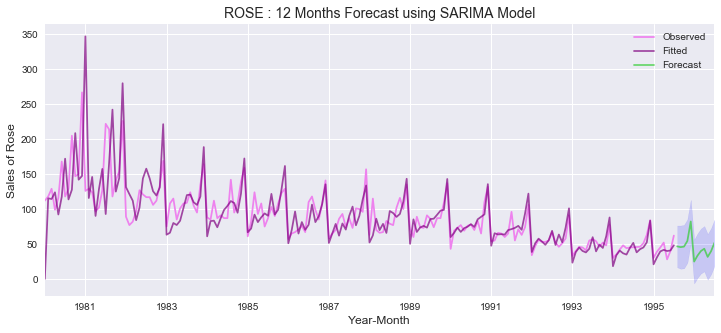

In [2979]:
plt.figure(figsize=(12,5))

axis = df['Rose'].plot(label='Observed', color = 'violet')

#np.power(10,results_full_data_model_rose.fittedvalues).plot(label='Fitted', alpha=0.7, color = 'crimson')
#np.power(10,pred_full_manual_SARIMA_date['mean']).plot(ax=axis, label='Forecast', alpha=0.7, color = 'orangered')

results_full_data_model_rose.fittedvalues.plot(label='Fitted', alpha=0.7, color = 'purple')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7, color = 'limegreen')

axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='blue', alpha=.15)
plt.xlabel('Year-Month',fontsize=12)
plt.ylabel('Sales of Rose',fontsize=12)
plt.title('ROSE : 12 Months Forecast using SARIMA Model', fontsize=14)

plt.legend(loc='best')
plt.show()

Text(0.5, 1.0, 'ROSE : 12 Months Forecast')

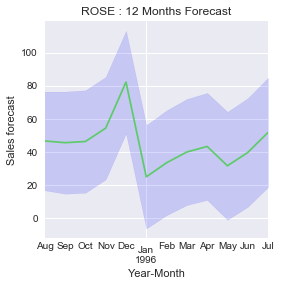

In [2991]:
plt.figure(figsize=(4,4))
axis = pred_full_manual_SARIMA_date['mean'].plot( alpha=0.7, color = 'limegreen')
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='blue', alpha=.15)
plt.xlabel('Year-Month')
plt.ylabel('Sales forecast')
plt.title('ROSE : 12 Months Forecast', fontsize=12)


In [2981]:
forecast2 = pd.DataFrame({'ROSE':np.round(pred_full_manual_SARIMA_date['mean'],2)})
forecast2

ROSE
1995-08-31  46.54
1995-09-30  45.51
1995-10-31  46.23
1995-11-30  54.32
1995-12-31  82.21
1996-01-31  24.81
1996-02-29  33.35
1996-03-31  39.87
1996-04-30  43.23
1996-05-31  31.53
1996-06-30  39.56
1996-07-31  51.70

In [2982]:
forecast2.describe()

ROSE
count  12.000000
mean   44.905000
std    14.473222
min    24.810000
25%    38.007500
50%    44.370000
75%    47.830000
max    82.210000

In [2983]:
forecast2.sum()

ROSE    538.86
dtype: float64

# END